# NOTE: THE CODE NEEDS TO BE RUN IN ORDER

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
housing = pd.read_csv('./data/Ames_HousePrice.csv', index_col=0)
housing['LogSalePrice'] = np.log(housing['SalePrice'])
housing['PricePerGLA'] = housing['SalePrice'] / housing['GrLivArea']
pd.set_option('display.max_columns', housing.shape[1])
housing.sample(10)

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
324  527356050       1620     152000          60       RL         80.0   
562  916403230       1509     175000          80       RL         85.0   
355  528180110       1866     336860         120       RL         58.0   
952  528429100       1670     336820          20       RL         49.0   
258  535477150        894     109500          20       RL         60.0   
292  528344060       1924     280000          60       RL         78.0   
327  903234220       1582     150000          50       RM         51.0   
288  527254020       2046     372500          20       RL         80.0   
490  528170040       2728     437154          60       RL         56.0   
392  528116010       1782     296000          20       RL        129.0   

     LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
324    10793   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
562    10200   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
355    10110   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
952    15218   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
258     6600   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
292    12011   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
327     6120   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
288    11844   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
490    20431   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
392    16870   Pave   NaN      IR1         Lvl    AllPub       FR3       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
324       NWAmes       RRAn       Norm     1Fam     2Story            5   
562       Timber       Norm       Norm     1Fam       SLvl            6   
355      NridgHt       Norm       Norm   TwnhsE     1Story            9   
952      Somerst       RRAn       Norm     1Fam     1Story            8   
258        NAmes       PosN       Norm     1Fam     1Story            5   
292      NoRidge       Norm       Norm     1Fam     2Story            8   
327      BrkSide       Norm       Norm     1Fam     1.5Fin            5   
288      StoneBr       Norm       Norm     1Fam     1Story            8   
490      NridgHt       Norm       Norm     1Fam     2Story            9   
392      NridgHt       Norm       Norm     1Fam     1Story            8   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
324            5       1969          1969   Mansard  CompShg     WdShing   
562            5       1988          1989     Gable  CompShg     HdBoard   
355            5       2008          2008       Hip  CompShg     MetalSd   
952            5       2006          2006     Gable  CompShg     VinylSd   
258            5       1962          1962       Hip  CompShg     MetalSd   
292            5       1998          1998     Gable  CompShg     VinylSd   
327            6       1938          1950     Gable  CompShg     Wd Sdng   
288            5       2008          2008       Hip  CompShg     VinylSd   
490            5       2005          2006       Hip  CompShg     CemntBd   
392            5       2004          2005       Hip  CompShg     VinylSd   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
324     HdBoard    BrkFace       263.0        TA        TA     CBlock   
562     HdBoard    BrkFace       219.0        Gd        TA     CBlock   
355     MetalSd    BrkFace       492.0        Ex        TA      PConc   
952     VinylSd        NaN         NaN        Gd        TA      PConc   
258     MetalSd       None         0.0        TA        TA     CBlock   
292     VinylSd    BrkFace       530.0        Gd        TA      PConc   
327     Wd Sdng       None         0.0        TA        TA     BrkTil   
288     VinylSd      Stone       464.0        Gd        TA      PCon

# 1. MSSubClass

In [3]:
sum(housing['MSSubClass'].isnull())

0

In [4]:
housing['MSSubClass'].value_counts()

20     939
60     502
50     259
120    169
30     123
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: MSSubClass, dtype: int64

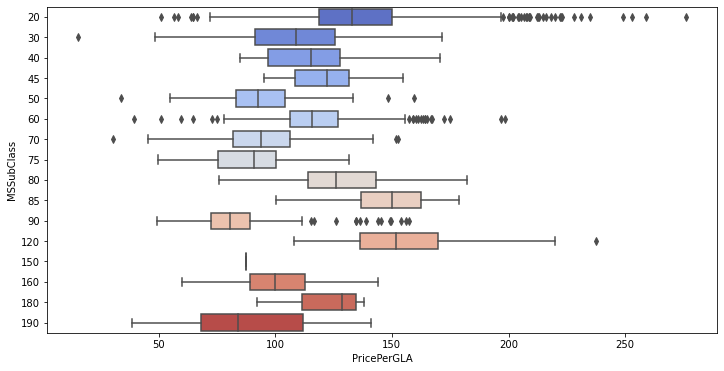

In [5]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MSSubClass', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

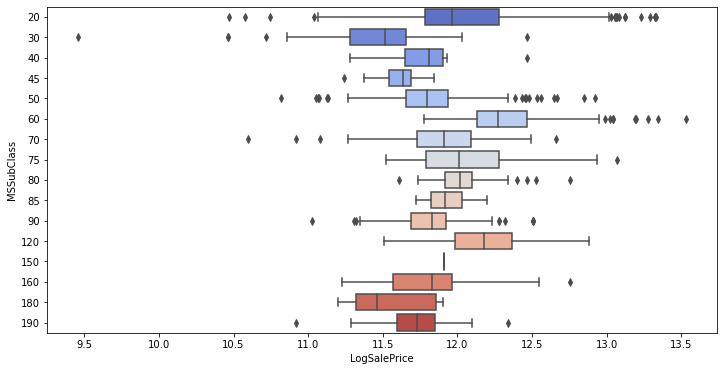

In [6]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MSSubClass', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [7]:
housing.groupby('MSSubClass').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
MSSubClass             
120          151.883354
85           150.184843
20           133.101852
180          128.571429
80           125.874126
45           122.306717
60           115.685344
40           115.161558
30           109.100877
160           99.705748
70            93.853190
50            92.800000
75            90.909091
150           87.294118
190           84.253341
90            80.554130

In [8]:
housing.groupby('MSSubClass').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
MSSubClass              
60             12.269047
120            12.175613
80             12.016726
75             12.007622
20             11.960811
85             11.917724
150            11.907667
70             11.906654
90             11.827736
160            11.827736
40             11.811092
50             11.794338
190            11.728037
45             11.635143
30             11.511925
180            11.460579

# 2. MSZoning

In [9]:
sum(housing['MSZoning'].isnull())

0

In [10]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

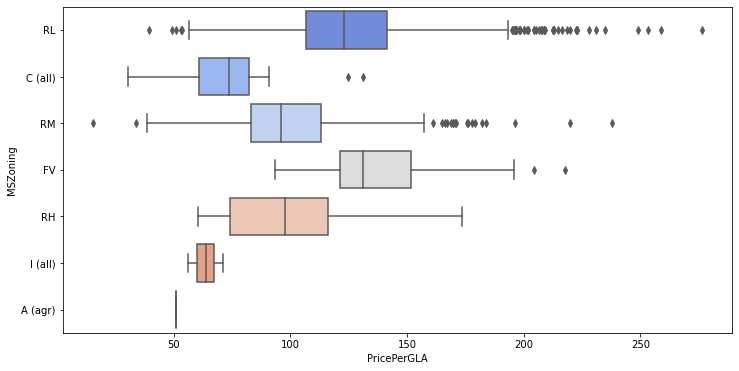

In [11]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MSZoning', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

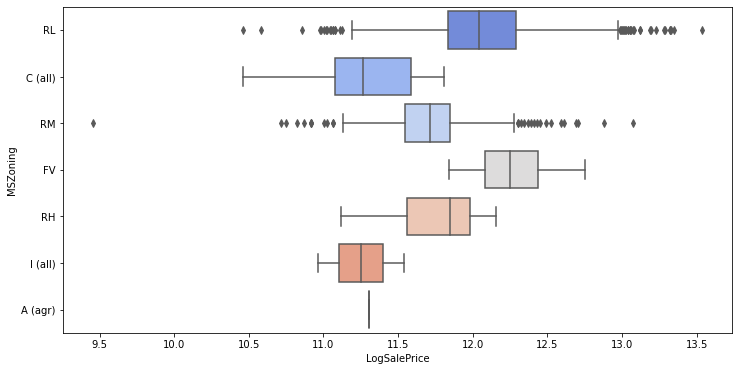

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MSZoning', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [13]:
housing.groupby('MSZoning').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
MSZoning             
FV         130.919363
RL         122.921193
RH          97.502973
RM          95.746490
C (all)     73.564583
I (all)     63.621097
A (agr)     50.937500

In [14]:
housing.groupby('MSZoning').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
MSZoning              
FV           12.246735
RL           12.043554
RH           11.849398
RM           11.716274
A (agr)      11.308358
C (all)      11.264464
I (all)      11.252098

# 3. LotFrontage

In [15]:
sum(housing['LotFrontage'].isnull())

462

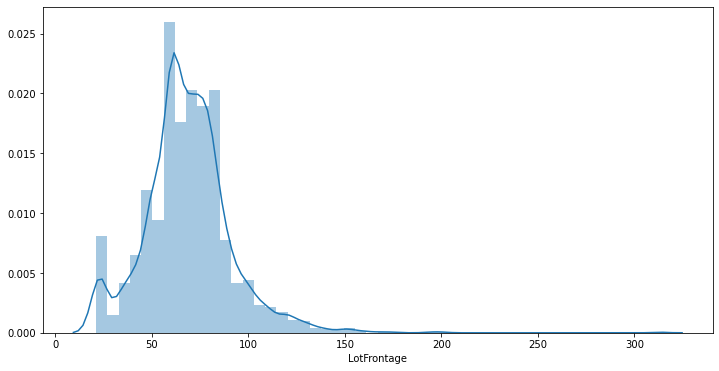

In [16]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[~housing['LotFrontage'].isnull()]['LotFrontage']);

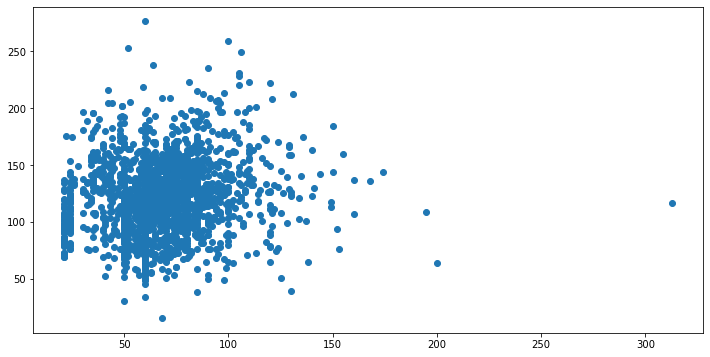

In [17]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[~housing['LotFrontage'].isnull()]['LotFrontage'], 
            housing[~housing['LotFrontage'].isnull()]['PricePerGLA']);

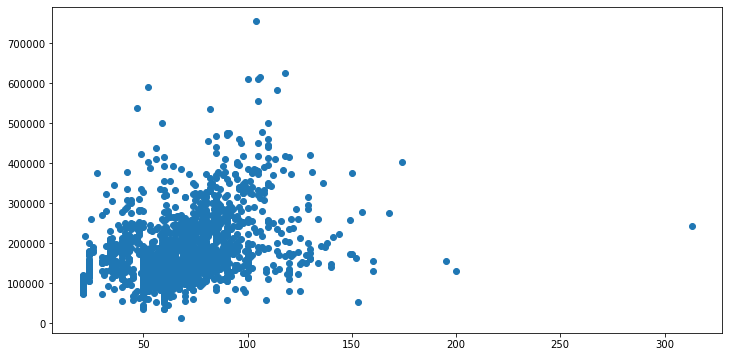

In [18]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[~housing['LotFrontage'].isnull()]['LotFrontage'], 
            housing[~housing['LotFrontage'].isnull()]['SalePrice']);

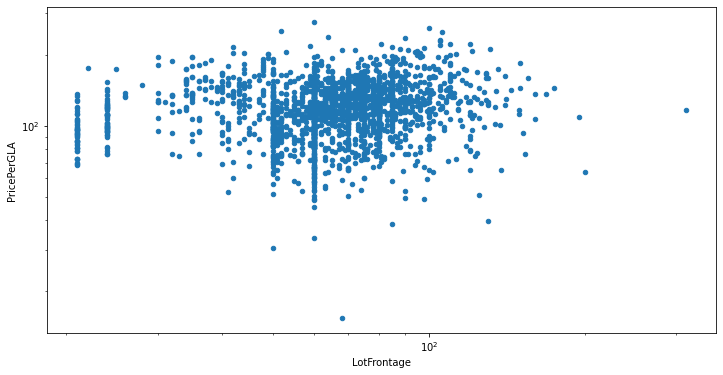

In [19]:
housing[~housing['LotFrontage'].isnull()].plot(kind = 'scatter', x = 'LotFrontage', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

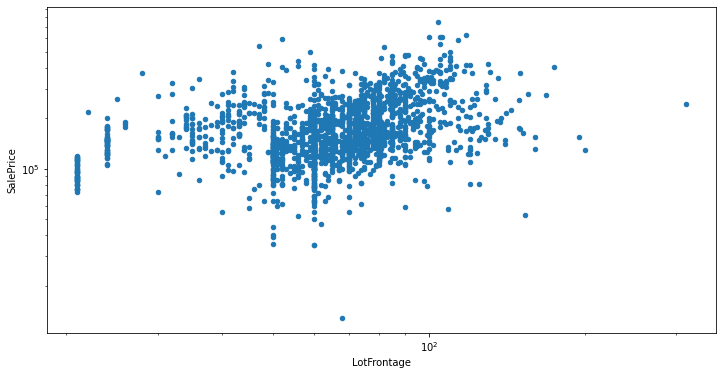

In [20]:
housing[~housing['LotFrontage'].isnull()].plot(kind = 'scatter', x = 'LotFrontage', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 4. LotArea

In [21]:
sum(housing['LotArea'].isnull())

0

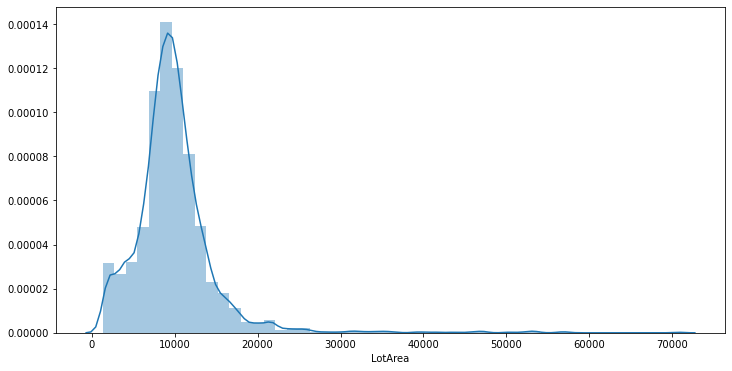

In [22]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['LotArea'] < 100000]['LotArea']);

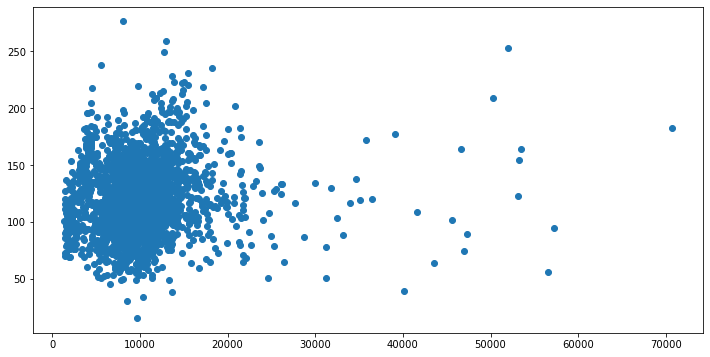

In [23]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['LotArea'] < 100000]['LotArea'], housing[housing['LotArea'] < 100000]['PricePerGLA']);

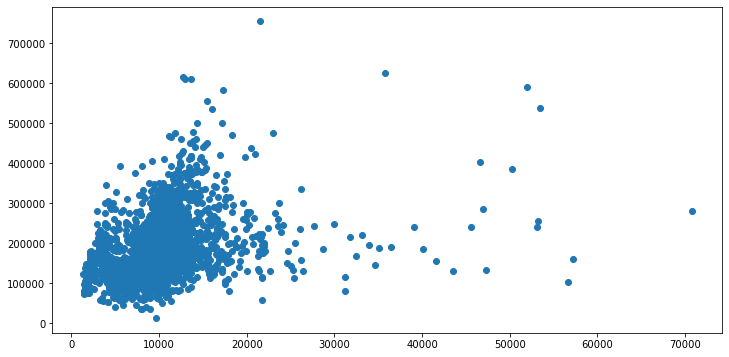

In [24]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['LotArea'] < 100000]['LotArea'], housing[housing['LotArea'] < 100000]['SalePrice']);

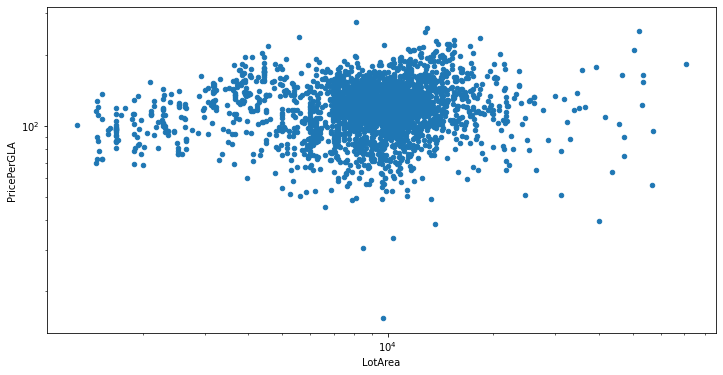

In [25]:
housing[housing['LotArea'] < 100000].plot(kind = 'scatter', x = 'LotArea', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

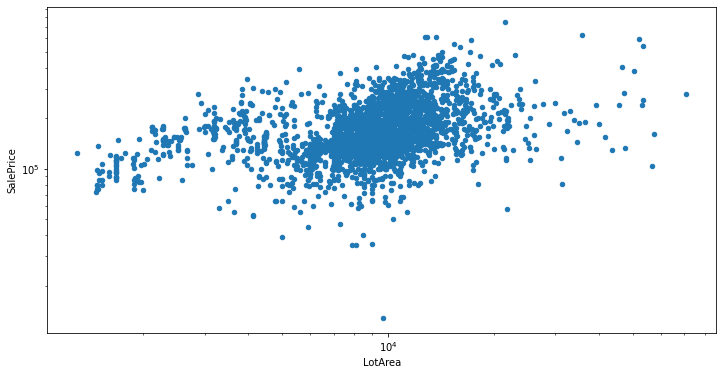

In [26]:
housing[housing['LotArea'] < 100000].plot(kind = 'scatter', x = 'LotArea', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 5. Street

In [27]:
sum(housing['Street'].isnull())

0

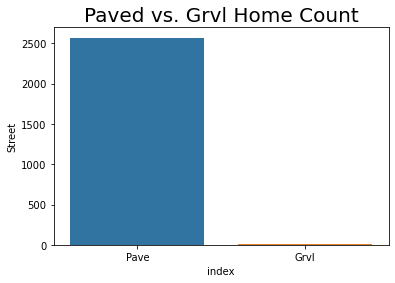

In [26]:
sns.barplot(x = 'index', y = 'Street', data = pd.DataFrame(housing['Street'].value_counts()).reset_index())
plt.title('Paved vs. Grvl Home Count', size = 20);

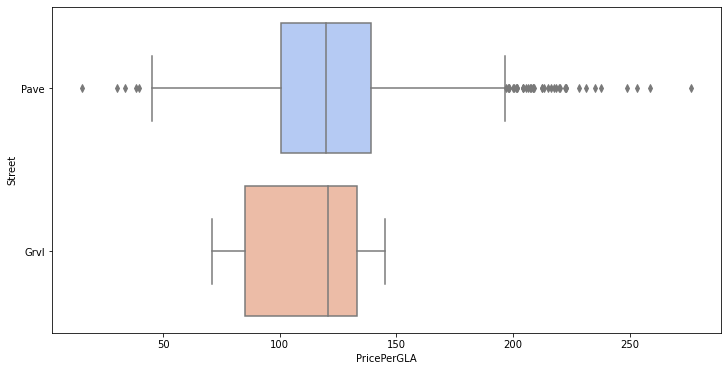

In [29]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Street', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

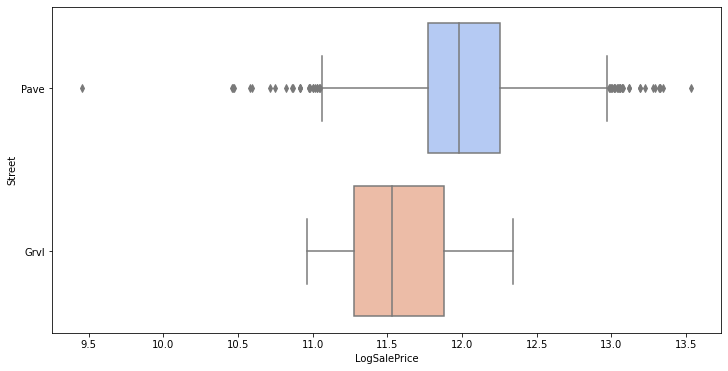

In [30]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Street', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [31]:
housing.groupby('Street').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Street             
Grvl     120.483212
Pave     119.641820

In [32]:
housing.groupby('Street').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Street              
Pave       11.982773
Grvl       11.528844

# 6. Alley

In [33]:
sum(housing['Alley'].isnull())

2412

In [34]:
housing['Alley'].fillna('NA', inplace = True)

In [35]:
housing['Alley'].value_counts()

NA      2412
Grvl     105
Pave      63
Name: Alley, dtype: int64

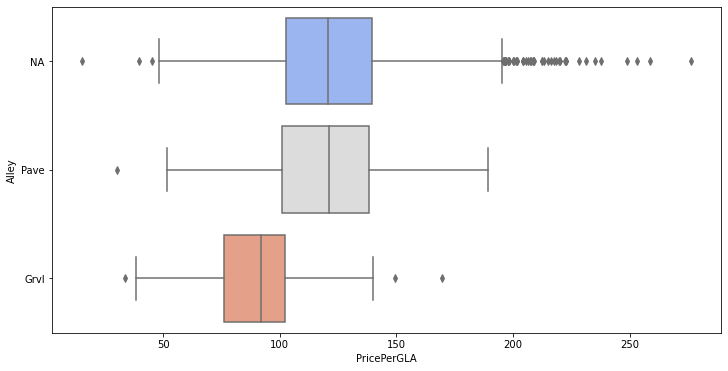

In [36]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Alley', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

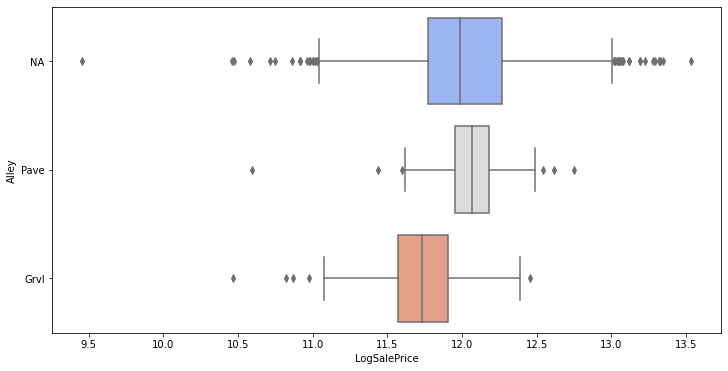

In [37]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Alley', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [38]:
housing.groupby('Alley').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Alley             
Pave    121.082621
NA      120.728671
Grvl     91.973244

In [39]:
housing.groupby('Alley').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Alley              
Pave      12.066811
NA        11.987604
Grvl      11.732061

# 7. LotShape

In [40]:
sum(housing['LotShape'].isnull())

0

In [41]:
housing['LotShape'].value_counts()

Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64

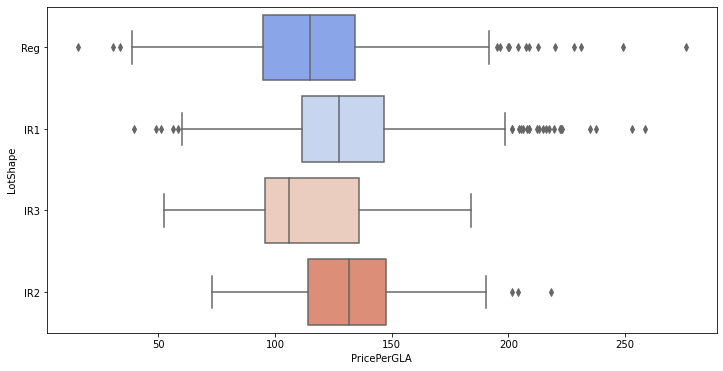

In [42]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LotShape', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

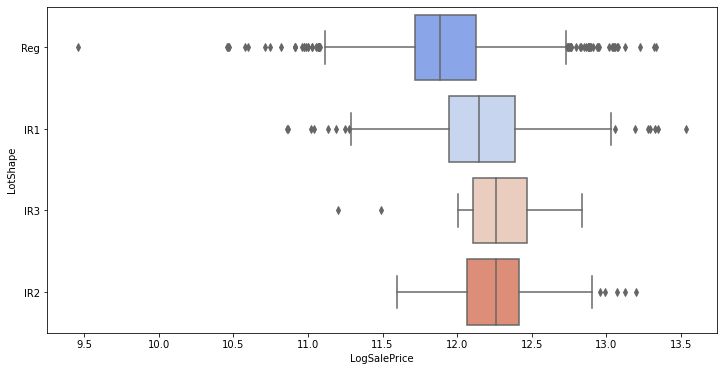

In [43]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LotShape', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [44]:
housing.groupby('LotShape').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
LotShape             
IR2        131.651885
IR1        127.409497
Reg        114.806867
IR3        105.923695

In [45]:
housing.groupby('LotShape').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
LotShape              
IR3          12.259613
IR2          12.259139
IR1          12.146853
Reg          11.884489

# 8. LandContour

In [46]:
sum(housing['LandContour'].isnull())

0

In [47]:
housing['LandContour'].value_counts()

Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64

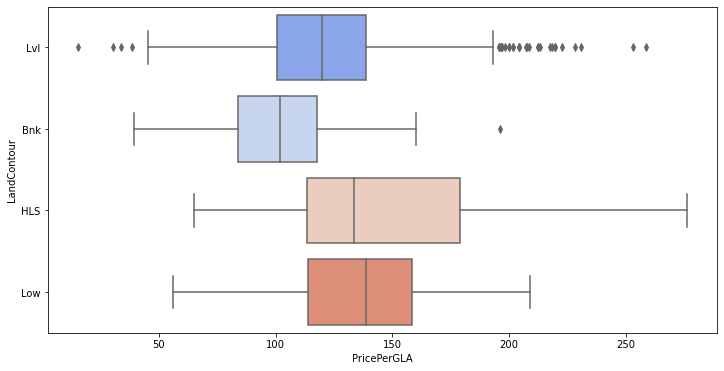

In [48]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LandContour', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

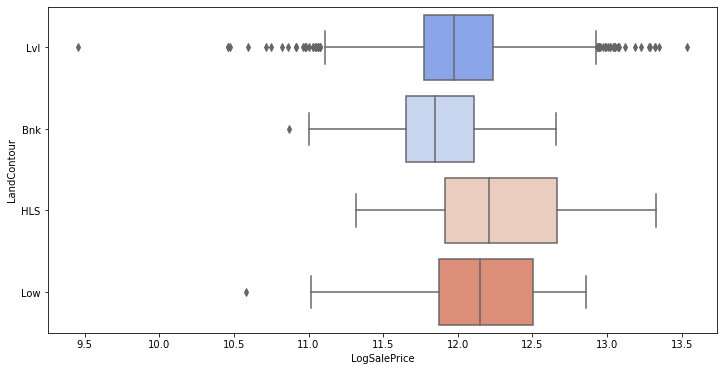

In [49]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LandContour', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [50]:
housing.groupby('LandContour').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
LandContour             
Low           138.708108
HLS           133.604212
Lvl           119.676946
Bnk           101.781170

In [51]:
housing.groupby('LandContour').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
LandContour              
HLS             12.208566
Low             12.149488
Lvl             11.976659
Bnk             11.849398

# 9. Utilities

In [52]:
sum(housing['Utilities'].isnull())

0

In [53]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

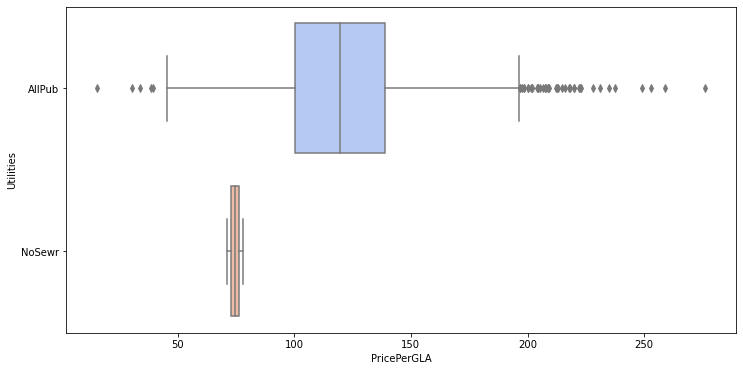

In [54]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Utilities', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

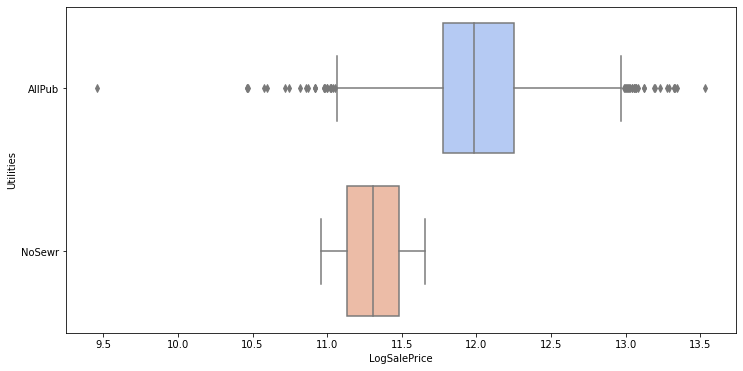

In [55]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Utilities', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [56]:
housing.groupby('Utilities').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Utilities             
AllPub      119.667533
NoSewr       74.580486

In [57]:
housing.groupby('Utilities').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Utilities              
AllPub        11.982304
NoSewr        11.307200

# 10. LotConfig

In [58]:
sum(housing['LotConfig'].isnull())

0

In [59]:
housing['LotConfig'].value_counts()

Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64

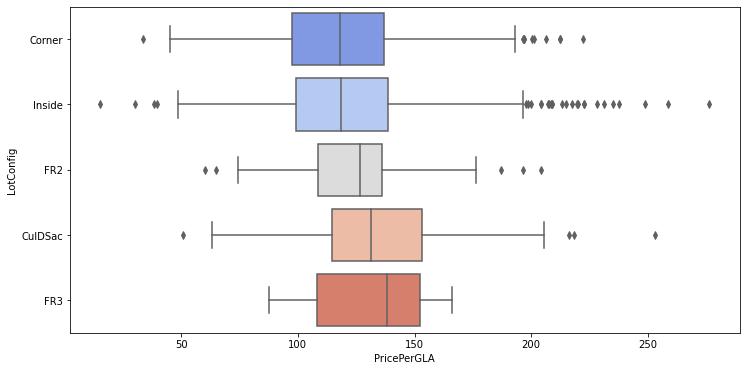

In [60]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LotConfig', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

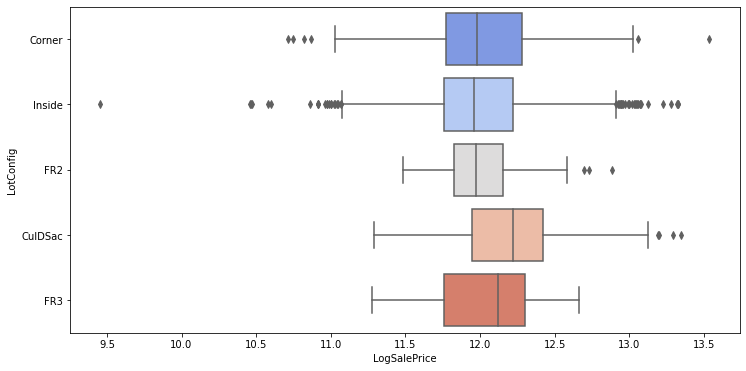

In [61]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LotConfig', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [62]:
housing.groupby('LotConfig').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
LotConfig             
FR3         138.133641
CulDSac     131.474676
FR2         126.483826
Inside      118.665248
Corner      117.848259

In [63]:
housing.groupby('LotConfig').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
LotConfig              
CulDSac       12.218468
FR3           12.122147
Corner        11.979799
FR2           11.970270
Inside        11.962190

# 11. LandSlope

In [64]:
sum(housing['LandSlope'].isnull())

0

In [65]:
housing['LandSlope'].value_counts()

Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64

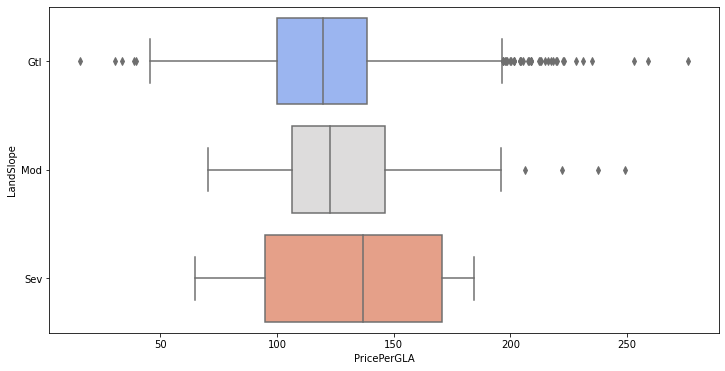

In [66]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LandSlope', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

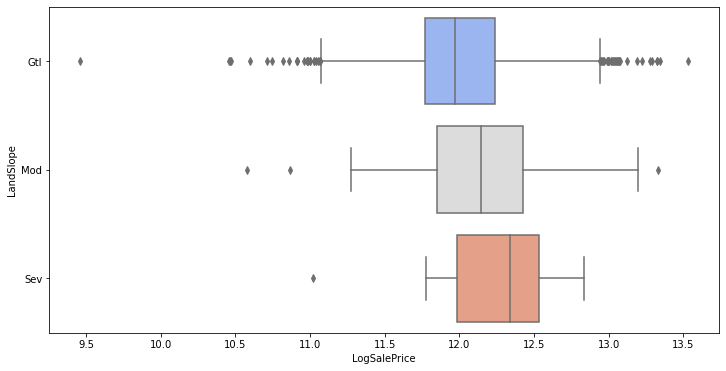

In [67]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'LandSlope', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [68]:
housing.groupby('LandSlope').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
LandSlope             
Sev         136.842105
Mod         122.549020
Gtl         119.543401

In [69]:
housing.groupby('LandSlope').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
LandSlope              
Sev           12.341259
Mod           12.144197
Gtl           11.973510

# 12. Neighborhood

In [70]:
sum(housing['Neighborhood'].isnull())

0

In [71]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Veenker     23
Blmngtn     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

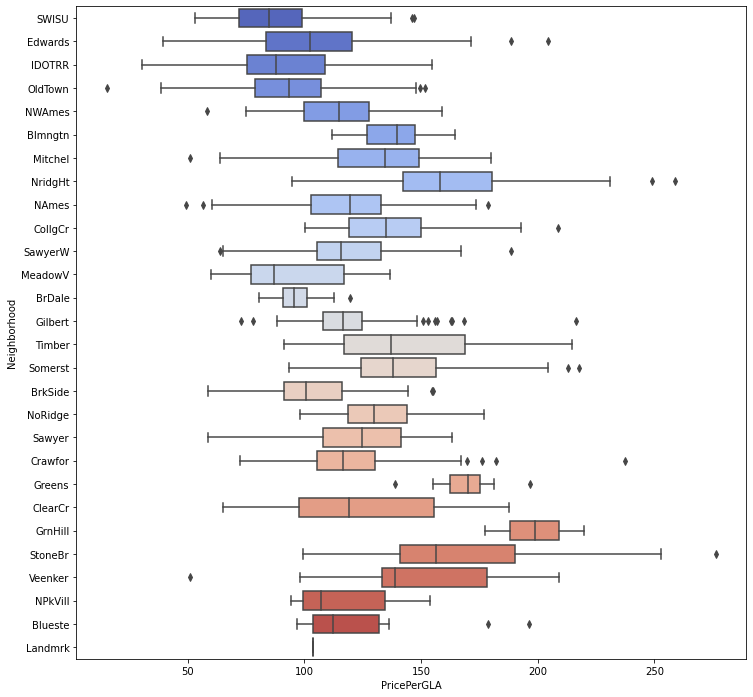

In [72]:
plt.figure(figsize = (12, 12))
sns.boxplot(y = 'Neighborhood', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

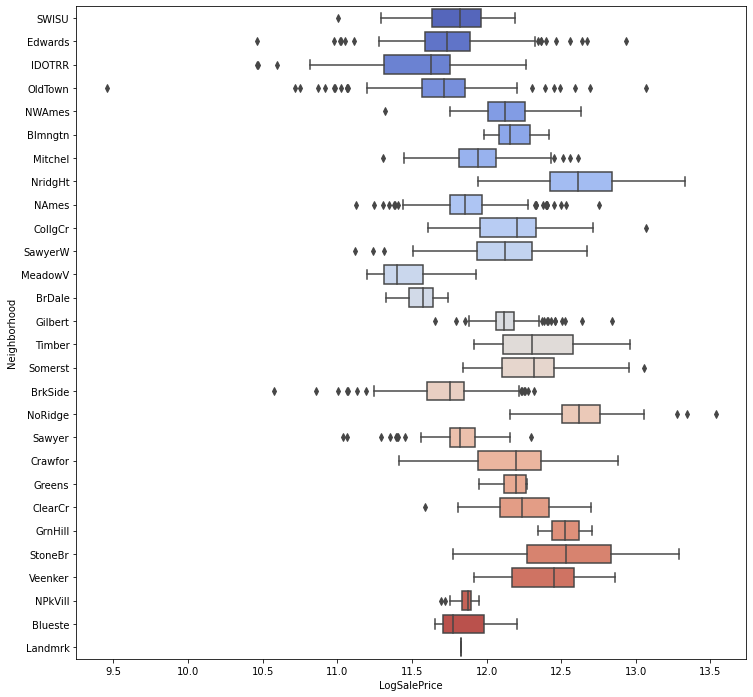

In [73]:
plt.figure(figsize = (12, 12))
sns.boxplot(y = 'Neighborhood', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [74]:
housing.groupby('Neighborhood').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Neighborhood             
GrnHill        198.656617
Greens         170.269168
NridgHt        157.957245
StoneBr        156.250000
Blmngtn        139.912664
Veenker        138.850575
Somerst        138.097797
Timber         137.341998
CollgCr        134.897823
Mitchel        134.506823
NoRidge        130.023641
Sawyer         124.881741
NAmes          119.667533
ClearCr        119.132416
Crawfor        116.693038
Gilbert        116.690751
SawyerW        115.714286
NWAmes         114.906832
Blueste        112.180169
NPkVill        107.124297
Landmrk        103.787879
Edwards        102.251023
BrkSide        100.694444
BrDale          95.744681
OldTown         93.395597
IDOTRR          87.753036
MeadowV         86.949153
SWISU           85.056121

In [75]:
housing.groupby('Neighborhood').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Neighborhood              
NoRidge          12.618182
NridgHt          12.611538
StoneBr          12.535376
GrnHill          12.526341
Veenker          12.449019
Somerst          12.314927
Timber           12.301383
ClearCr          12.234091
CollgCr          12.203315
Crawfor          12.196022
Greens           12.195205
Blmngtn          12.160029
NWAmes           12.122691
SawyerW          12.122691
Gilbert          12.119970
Mitchel          11.941456
NPkVill          11.876700
NAmes            11.856515
Landmrk          11.827736
SWISU            11.821877
Sawyer           11.820410
Blueste          11.777887
BrkSide          11.755872
Edwards          11.737668
OldTown          11.711776
IDOTRR           11.630462
BrDale           11.571194
MeadowV          11.400517

# 13. Condition1

In [76]:
sum(housing['Condition1'].isnull())

0

In [77]:
housing['Condition1'].value_counts()

Norm      2228
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: Condition1, dtype: int64

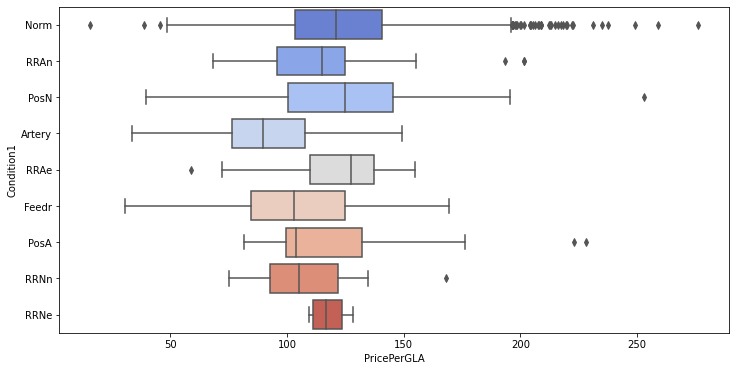

In [78]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Condition1', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

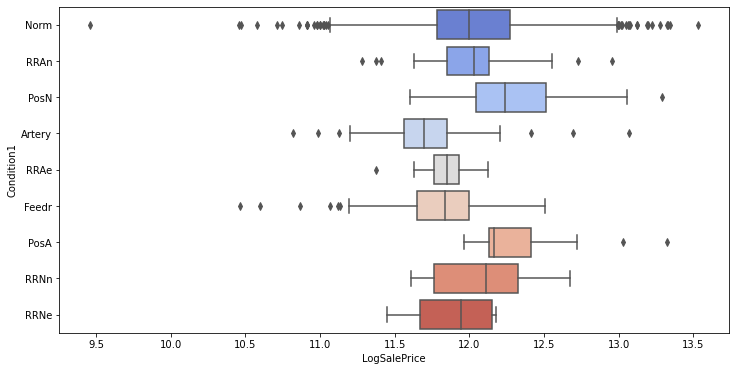

In [79]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Condition1', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [80]:
housing.groupby('Condition1').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Condition1             
RRAe         127.540671
PosN         124.748153
Norm         121.139542
RRNe         116.862875
RRAn         114.961420
RRNn         104.926177
PosA         103.844454
Feedr        102.928258
Artery        89.858793

In [81]:
housing.groupby('Condition1').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Condition1              
PosN           12.240474
PosA           12.165251
RRNn           12.109220
RRAn           12.030720
Norm           12.001199
RRNe           11.941451
RRAe           11.851104
Feedr          11.838626
Artery         11.695247

# 14. Condition2

In [82]:
sum(housing['Condition2'].isnull())

0

In [83]:
housing['Condition2'].value_counts()

Norm      2555
Feedr       12
PosN         3
Artery       3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [84]:
housing[(housing['Condition1'] != 'Norm') & 
        (housing['Condition2'] != 'Norm') &
        (housing['Condition1'] != housing['Condition2'])].groupby(['Condition1', 
                                                                   'Condition2']).agg({'PricePerGLA':['count', 'median'], 
                                                                                     'LogSalePrice':['count', 'median']})

PricePerGLA             LogSalePrice           
                            count      median        count     median
Condition1 Condition2                                                
Artery     PosA                 1  117.117117            1  12.691580
Feedr      Artery               1  133.699634            1  11.891362
           RRAe                 1   72.519084            1  12.154779
           RRAn                 1   81.491071            1  11.827043
           RRNn                 2  141.622960            2  11.435329
RRAn       Feedr                8   92.261033            8  11.800670
RRNn       Artery               1   89.372822            1  11.761737
           Feedr                1   93.979442            1  11.759786

# 15. BldgType

In [85]:
sum(housing['BldgType'].isnull())

0

In [86]:
housing['BldgType'].value_counts()

1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64

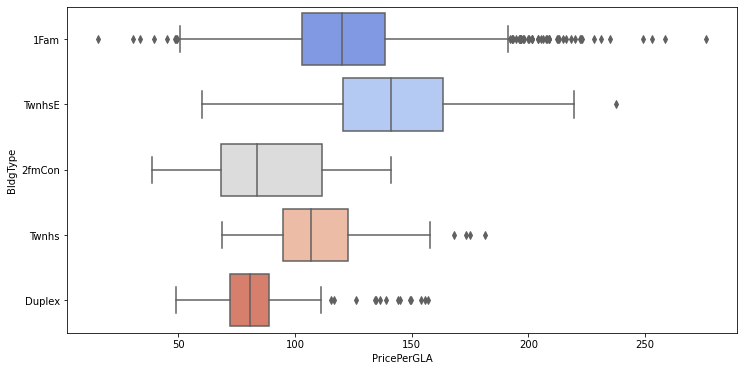

In [87]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BldgType', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

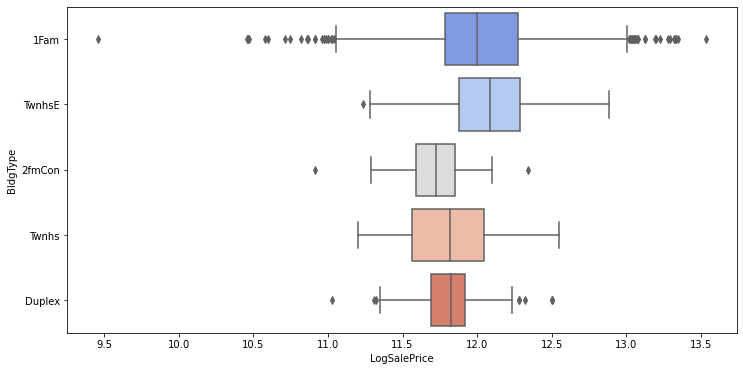

In [88]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BldgType', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [89]:
housing.groupby('BldgType').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BldgType             
TwnhsE     140.946554
1Fam       120.000000
Twnhs      106.791979
2fmCon      83.810469
Duplex      80.554130

In [90]:
housing.groupby('BldgType').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BldgType              
TwnhsE       12.086722
1Fam         12.001505
Duplex       11.827736
Twnhs        11.816666
2fmCon       11.721952

# 16. HouseStyle

In [91]:
sum(housing['HouseStyle'].isnull())

0

In [92]:
housing['HouseStyle'].value_counts()

1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: HouseStyle, dtype: int64

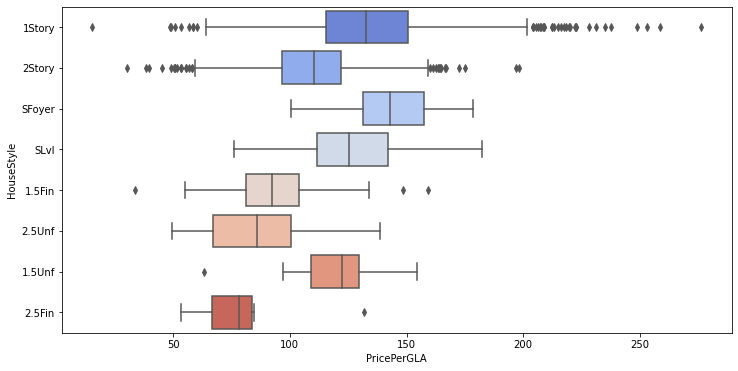

In [93]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HouseStyle', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

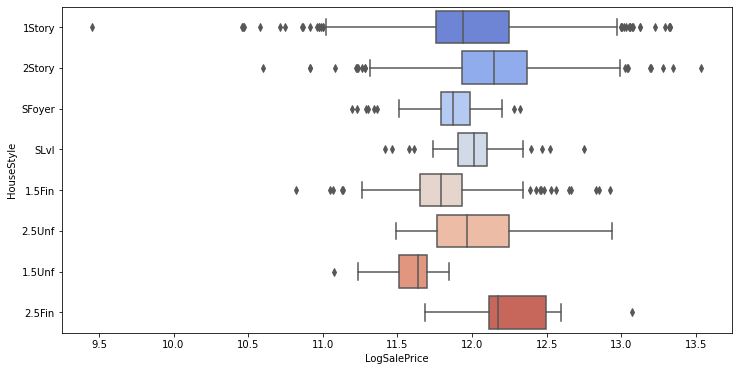

In [94]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HouseStyle', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [95]:
housing.groupby('HouseStyle').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
HouseStyle             
SFoyer       142.729555
1Story       132.809852
SLvl         125.169071
1.5Unf       122.306717
2Story       110.497238
1.5Fin        92.254571
2.5Unf        85.730235
2.5Fin        78.322034

In [96]:
housing.groupby('HouseStyle').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
HouseStyle              
2.5Fin         12.175494
2Story         12.144197
SLvl           12.013701
2.5Unf         11.967055
1Story         11.938193
SFoyer         11.874084
1.5Fin         11.790557
1.5Unf         11.635143

# 17. OverallQual

In [97]:
sum(housing['OverallQual'].isnull())

0

In [98]:
housing['OverallQual'].value_counts()

5     753
6     669
7     525
8     290
4     195
9      80
3      32
10     20
2      13
1       3
Name: OverallQual, dtype: int64

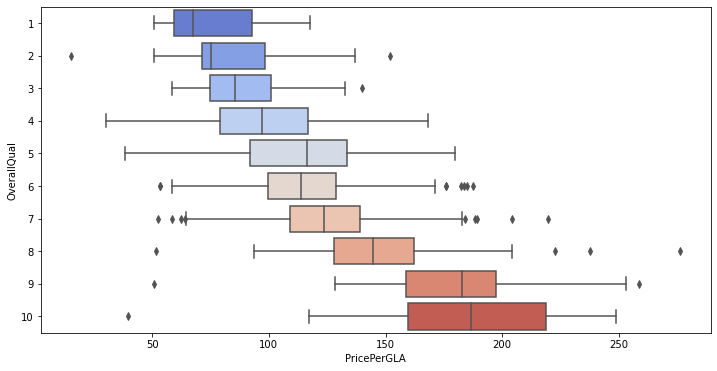

In [99]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'OverallQual', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

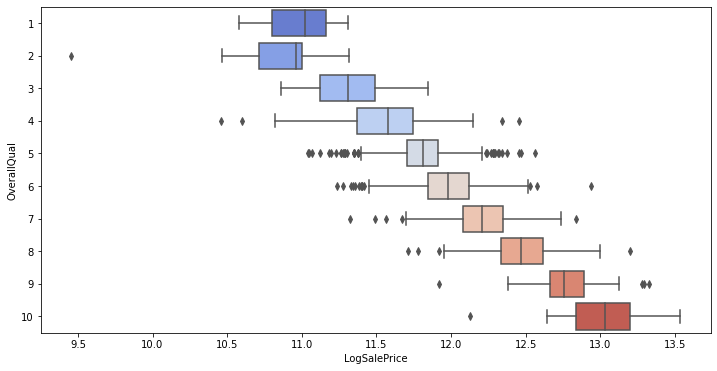

In [100]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'OverallQual', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [101]:
housing.groupby('OverallQual').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
OverallQual             
10            186.811843
9             182.870754
8             144.785776
7             123.726346
5             116.527037
6             113.777778
4              96.975674
3              85.679186
2              75.000000
1              67.477876

In [102]:
housing.groupby('OverallQual').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
OverallQual              
10              13.033517
9               12.755066
8               12.471209
7               12.205573
6               11.982304
5               11.809319
4               11.575900
3               11.310803
1               11.018629
2               10.961712

# 18. OverallCond

In [103]:
sum(housing['OverallCond'].isnull())

0

In [104]:
housing['OverallCond'].value_counts()

5    1402
6     498
7     360
8     140
4      88
9      41
3      39
2       8
1       4
Name: OverallCond, dtype: int64

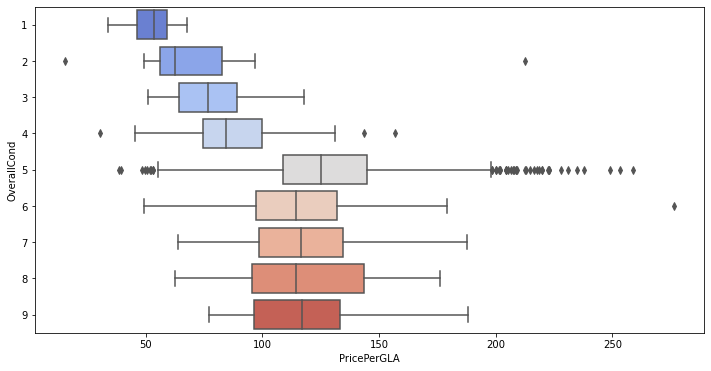

In [105]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'OverallCond', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

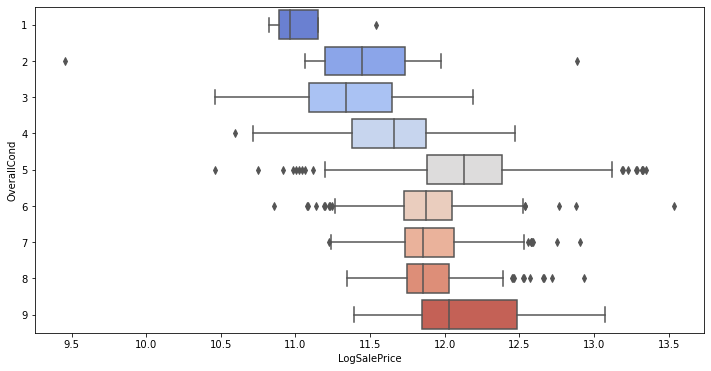

In [106]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'OverallCond', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [107]:
housing.groupby('OverallCond').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
OverallCond             
5             125.153433
9             116.835994
7             116.563656
6             114.417298
8             114.174663
4              84.574438
3              76.438849
2              62.701150
1              53.372393

In [108]:
housing.groupby('OverallCond').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
OverallCond              
5               12.128349
9               12.031719
6               11.872171
7               11.855628
8               11.854726
4               11.663441
2               11.443294
3               11.338572
1               10.966859

# 19. YearBuilt

In [109]:
sum(housing['YearBuilt'].isnull())

0

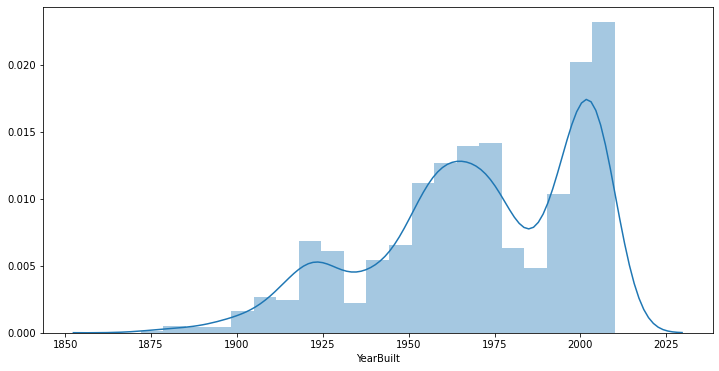

In [110]:
plt.figure(figsize = (12, 6))
sns.distplot(housing['YearBuilt']);

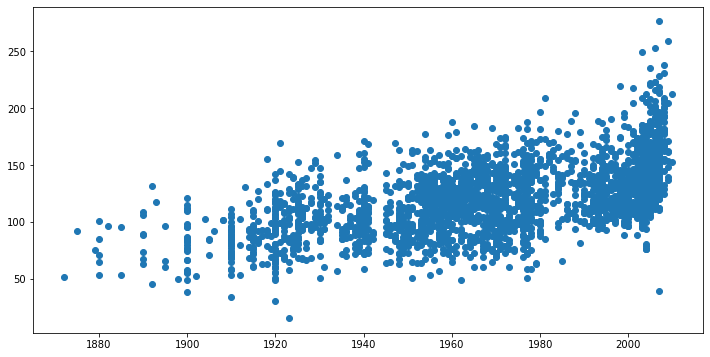

In [111]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['YearBuilt'], housing['PricePerGLA']);

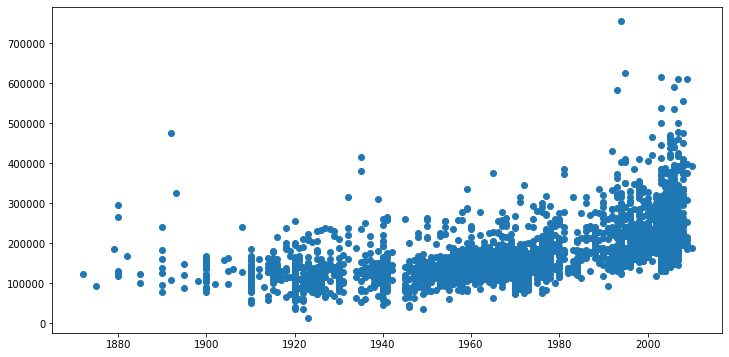

In [112]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['YearBuilt'], housing['SalePrice']);

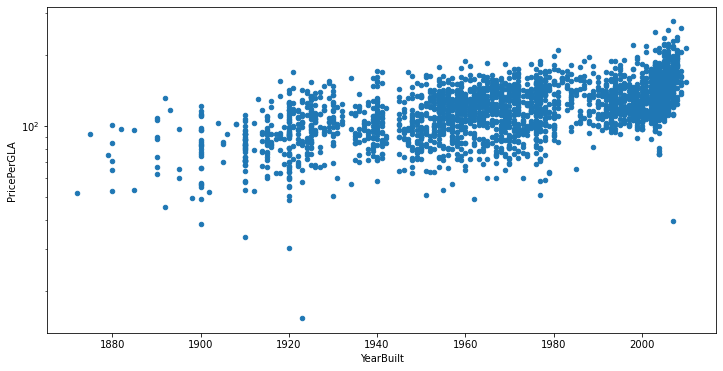

In [113]:
housing.plot(kind = 'scatter', x = 'YearBuilt', y = 'PricePerGLA',
                                               logy = True, figsize = (12, 6));

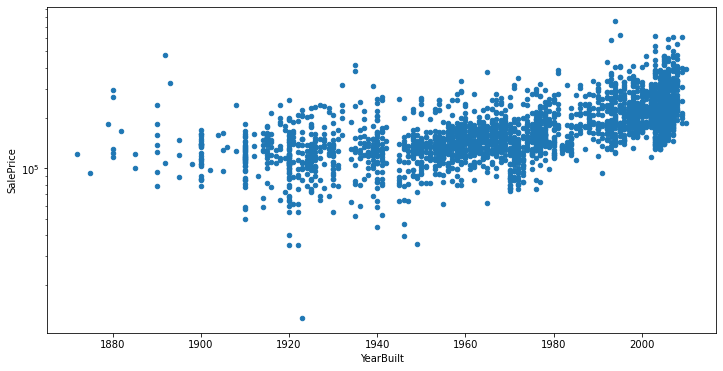

In [114]:
housing.plot(kind = 'scatter', x = 'YearBuilt', y = 'SalePrice',
                                               logy = True, figsize = (12, 6));

# 20. YearRemodAdd

In [115]:
sum(housing['YearRemodAdd'].isnull())

0

In [116]:
housing[housing['YearRemodAdd'] != housing['YearBuilt']].shape[0] / housing.shape[0] # % Remodeled

0.4627906976744186

In [117]:
df1 = housing[housing['YearRemodAdd'] != housing['YearBuilt']].groupby('YearBuilt').median()[['PricePerGLA']]
df2 = housing[housing['YearRemodAdd'] == housing['YearBuilt']].groupby('YearBuilt').median()[['PricePerGLA']]
df = pd.merge(df1, df2, left_index = True, right_index = True)
df.columns = ['PricePerGLARemod', 'PricePerGLANoRemod']
df['RemodDiff'] =  (df['PricePerGLARemod'] - df['PricePerGLANoRemod']) / df['PricePerGLANoRemod']

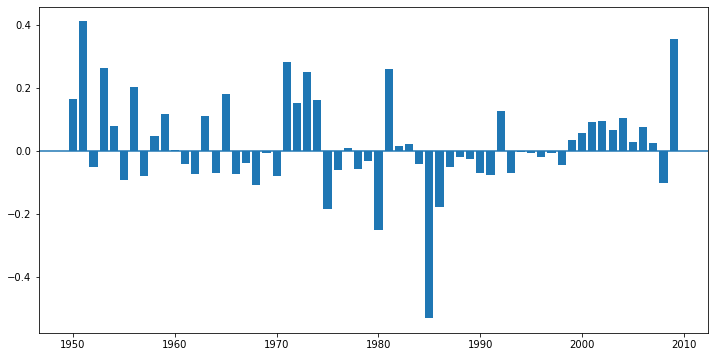

In [118]:
plt.figure(figsize = (12, 6))
plt.bar(df.index, df['RemodDiff'])
plt.axhline(0);

In [119]:
df3 = housing[housing['YearRemodAdd'] != housing['YearBuilt']].groupby('YearBuilt').median()[['SalePrice']]
df4 = housing[housing['YearRemodAdd'] == housing['YearBuilt']].groupby('YearBuilt').median()[['SalePrice']]
df = pd.merge(df3, df4, left_index = True, right_index = True)
df.columns = ['PriceRemod', 'PriceNoRemod']
df['RemodDiff'] =  (df['PriceRemod'] - df['PriceNoRemod']) / df['PriceNoRemod']

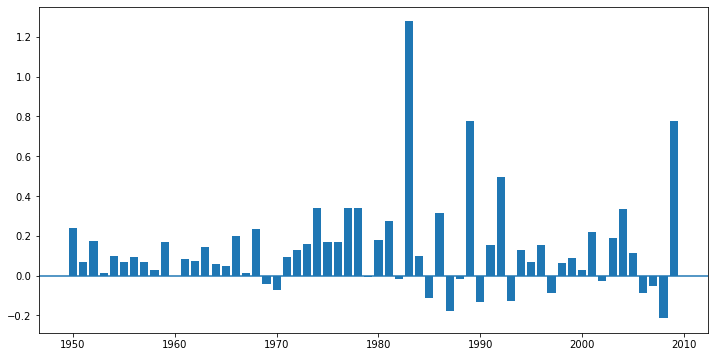

In [120]:
plt.figure(figsize = (12, 6))
plt.bar(df.index, df['RemodDiff'])
plt.axhline(0);

# 21. RoofStyle

In [121]:
sum(housing['RoofStyle'].isnull())

0

In [122]:
housing['RoofStyle'].value_counts()

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

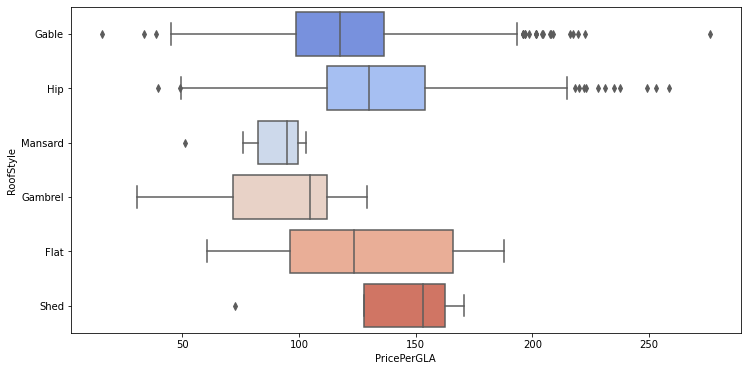

In [123]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'RoofStyle', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

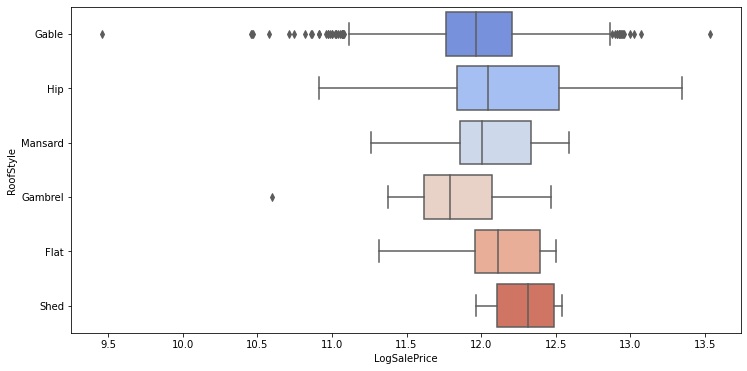

In [124]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'RoofStyle', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [125]:
housing.groupby('RoofStyle').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
RoofStyle             
Shed        153.193790
Hip         130.000000
Flat        123.436110
Gable       117.488184
Gambrel     104.570352
Mansard      94.669072

In [126]:
housing.groupby('RoofStyle').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
RoofStyle              
Shed          12.311608
Flat          12.114412
Hip           12.043554
Mansard       12.002089
Gable         11.964001
Gambrel       11.791804

# 22. RoofMatl

In [127]:
sum(housing['RoofMatl'].isnull())

0

In [128]:
housing['RoofMatl'].value_counts()

CompShg    2544
Tar&Grv      18
WdShake       8
WdShngl       7
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

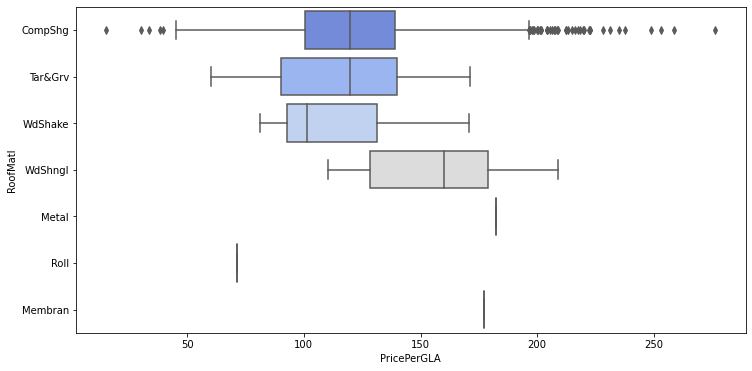

In [129]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'RoofMatl', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

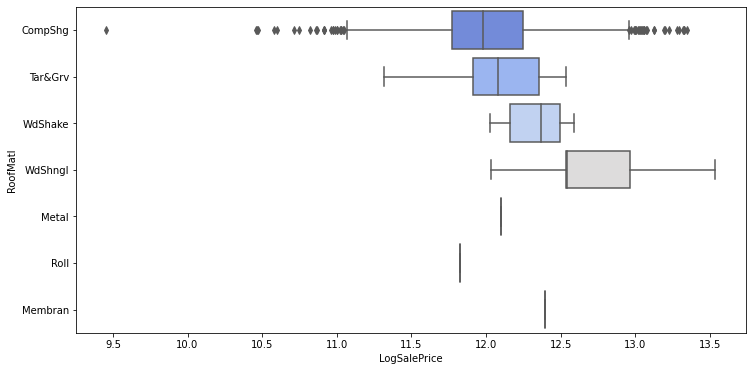

In [130]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'RoofMatl', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [131]:
housing.groupby('RoofMatl').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
RoofMatl             
Metal      182.186235
Membran    177.182685
WdShngl    160.068847
Tar&Grv    119.784705
CompShg    119.599062
WdShake    101.237412
Roll        71.354167

In [132]:
housing.groupby('RoofMatl').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
RoofMatl              
WdShngl      12.542545
Membran      12.394625
WdShake      12.366897
Metal        12.100712
Tar&Grv      12.076930
CompShg      11.976659
Roll         11.827736

# 23. Exterior1st

In [133]:
sum(housing['Exterior1st'].isnull())

0

In [134]:
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

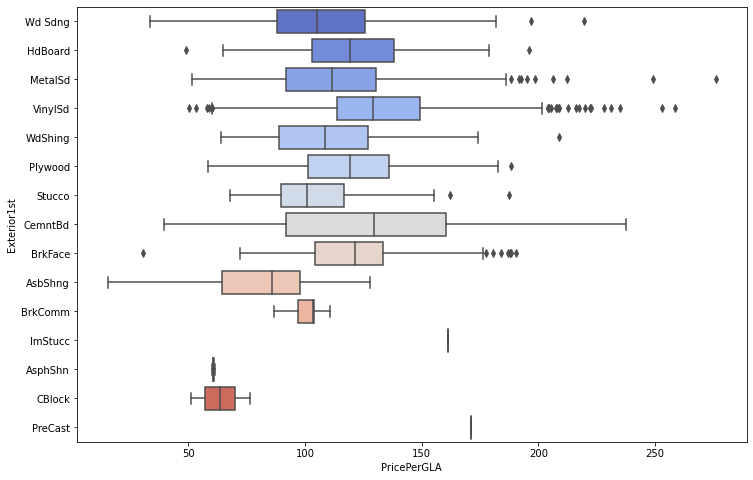

In [135]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = 'Exterior1st', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

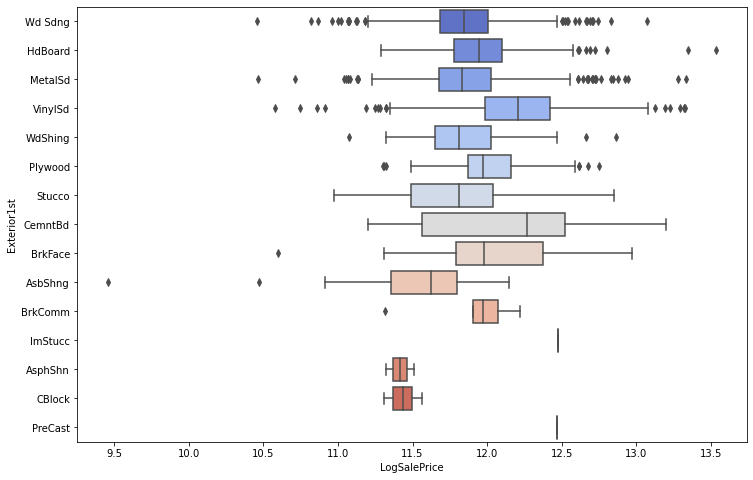

In [136]:
plt.figure(figsize = (12, 8))
sns.boxplot(y = 'Exterior1st', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [137]:
housing.groupby('Exterior1st').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Exterior1st             
PreCast       171.277997
ImStucc       161.330049
CemntBd       129.711538
VinylSd       129.358192
BrkFace       121.644732
HdBoard       119.358531
Plywood       119.313590
MetalSd       111.549852
WdShing       108.433735
Wd Sdng       105.288462
BrkComm       103.489060
Stucco        100.749621
AsbShng        85.791484
CBlock         63.678357
AsphShn        60.693538

In [138]:
housing.groupby('Exterior1st').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Exterior1st              
ImStucc         12.476100
PreCast         12.468437
CemntBd         12.264342
VinylSd         12.206073
BrkFace         11.978229
BrkComm         11.970350
Plywood         11.968766
HdBoard         11.946991
Wd Sdng         11.845103
MetalSd         11.831379
Stucco          11.813030
WdShing         11.808814
AsbShng         11.626214
CBlock          11.435037
AsphShn         11.415981

# 24. Exterior2nd

In [139]:
sum(housing['Exterior2nd'].isnull())

0

In [140]:
housing['Exterior2nd'].replace('Brk Cmn', 'BrkComm', inplace = True)

In [141]:
housing['Exterior2nd'].replace('CmentBd', 'CemntBd', inplace = True)

In [142]:
housing['Exterior2nd'].replace('Wd Shng', 'WdShing', inplace= True)

In [143]:
housing['Exterior2nd'].value_counts() 

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CemntBd     97
WdShing     76
BrkFace     46
Stucco      37
AsbShng     31
BrkComm     21
ImStucc     13
Stone        4
AsphShn      4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

In [144]:
housing.groupby(['Exterior1st', 'Exterior2nd']).agg(['median', 'count'])[['PricePerGLA', 'LogSalePrice']]

PricePerGLA       LogSalePrice      
                             median count       median count
Exterior1st Exterior2nd                                     
AsbShng     AsbShng       85.110797    28    11.612761    28
            CemntBd      107.122507     1    12.144197     1
            Plywood       87.593985     3    11.665647     3
            Stucco        49.041714     1    11.373663     1
            Wd Sdng       97.969188     1    11.848683     1
...                             ...   ...          ...   ...
WdShing     HdBoard      134.088059     2    11.868242     2
            Plywood      106.024804     8    11.962121     8
            Stucco       130.187320     1    11.411446     1
            Wd Sdng      100.916478     2    11.921050     2
            WdShing      108.824376    38    11.789609    38

[80 rows x 4 columns]

# 25. MasVnrType

In [145]:
sum(housing['MasVnrType'].isnull())

14

In [146]:
housing['MasVnrType'].value_counts()

None       1559
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

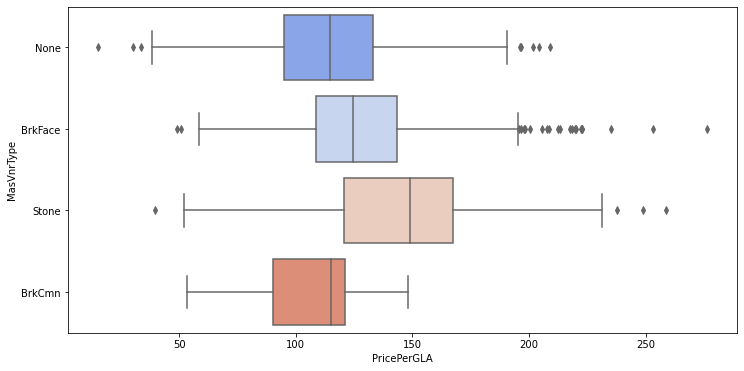

In [147]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MasVnrType', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

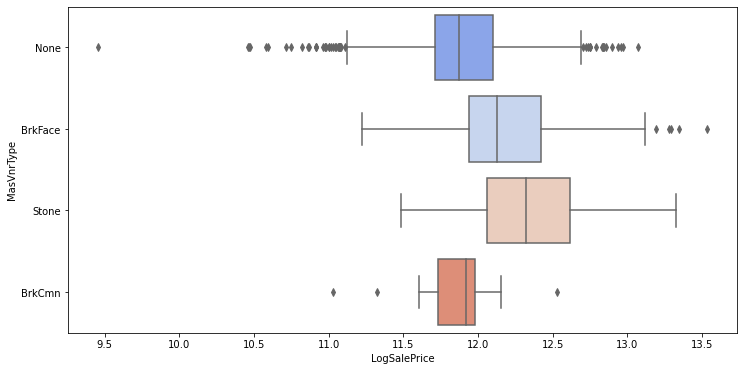

In [148]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MasVnrType', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [149]:
housing.groupby('MasVnrType').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
MasVnrType             
Stone        148.815190
BrkFace      124.635927
BrkCmn       114.903407
None         114.583333

In [150]:
housing.groupby('MasVnrType').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
MasVnrType              
Stone          12.319401
BrkFace        12.129420
BrkCmn         11.918191
None           11.870600

# 26. MasVnrArea

In [151]:
sum(housing['MasVnrArea'].isnull())

14

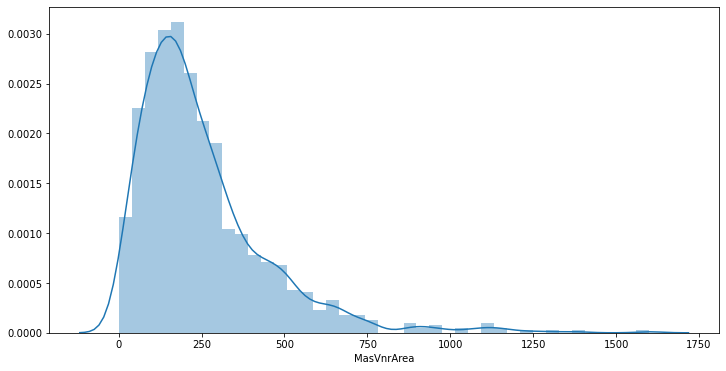

In [152]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0]['MasVnrArea']);

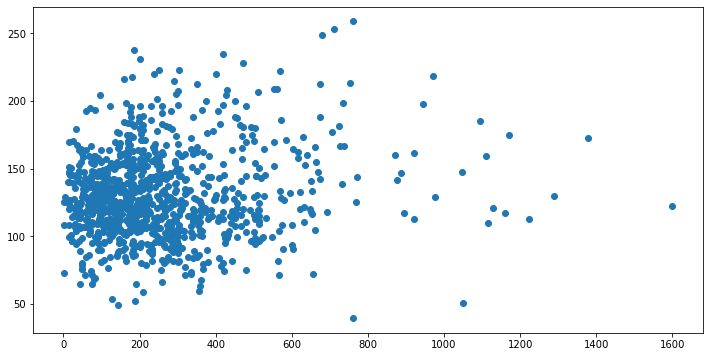

In [153]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0]['MasVnrArea'], 
            housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0]['PricePerGLA']);

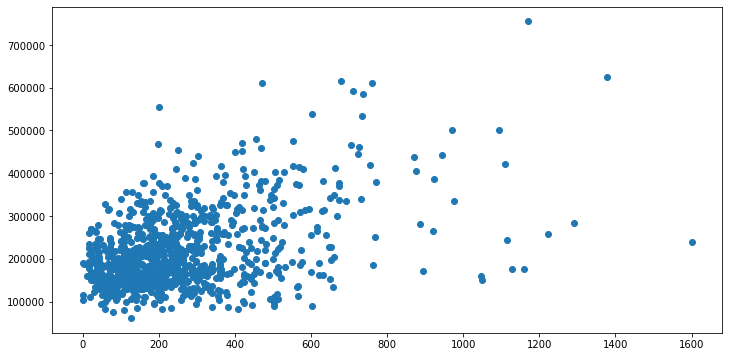

In [154]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0]['MasVnrArea'], 
            housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0]['SalePrice']);

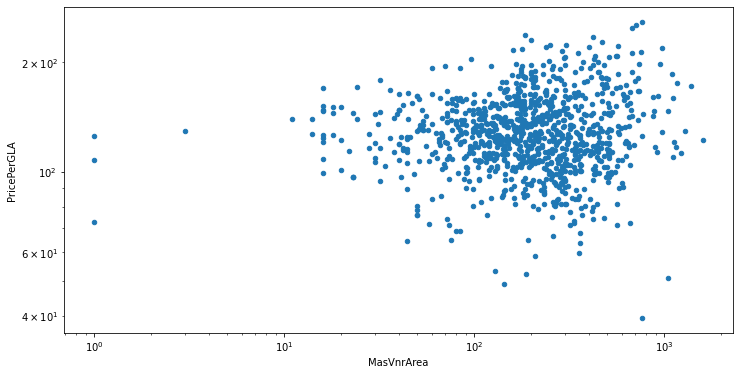

In [155]:
housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0].plot(kind = 'scatter', x = 'MasVnrArea', 
                                                                             y = 'PricePerGLA', logx = True, 
                                                                             logy = True, figsize = (12, 6));

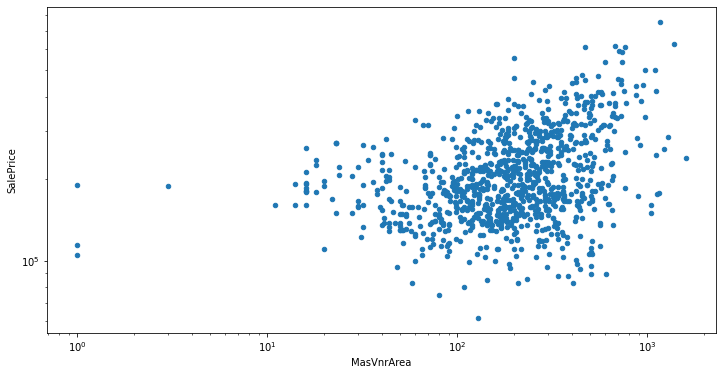

In [156]:
housing[(~housing['MasVnrArea'].isnull()) & housing['MasVnrArea'] != 0].plot(kind = 'scatter', x = 'MasVnrArea', 
                                                                             y = 'SalePrice', logx = True, 
                                                                             logy = True, figsize = (12, 6));

# 27. ExterQual

In [157]:
sum(housing['ExterQual'].isnull())

0

In [158]:
housing['ExterQual'].value_counts()

TA    1636
Gd     841
Ex      73
Fa      30
Name: ExterQual, dtype: int64

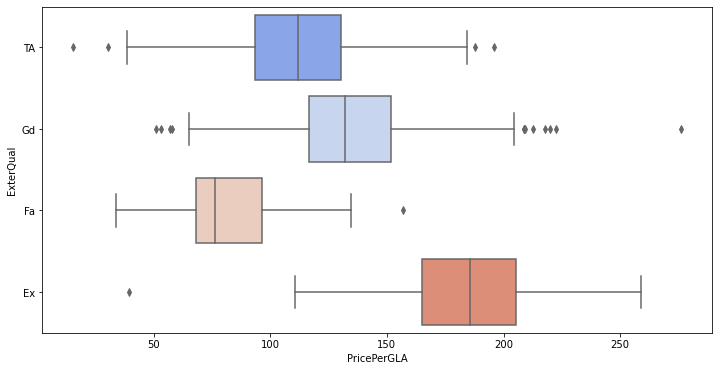

In [159]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'ExterQual', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

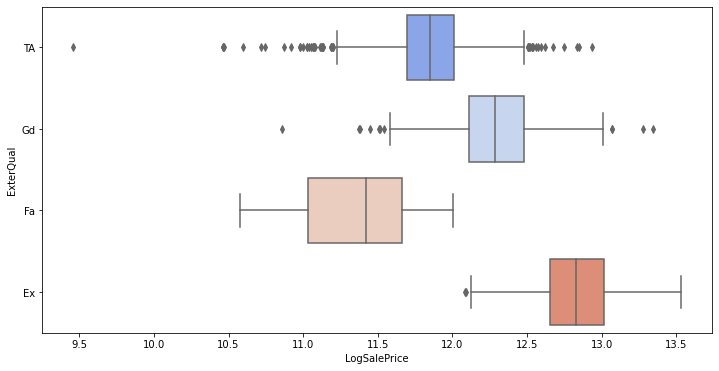

In [160]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'ExterQual', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [161]:
housing.groupby('ExterQual').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
ExterQual             
Ex          185.459941
Gd          132.142857
TA          111.860576
Fa           76.253085

In [162]:
housing.groupby('ExterQual').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
ExterQual              
Ex            12.826649
Gd            12.287653
TA            11.849398
Fa            11.421174

# 28. ExterCond

In [163]:
sum(housing['ExterCond'].isnull())

0

In [164]:
housing['ExterCond'].value_counts()

TA    2232
Gd     279
Fa      56
Ex      11
Po       2
Name: ExterCond, dtype: int64

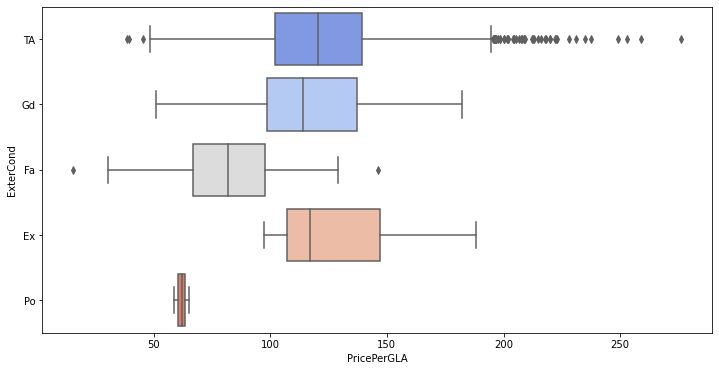

In [165]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'ExterCond', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

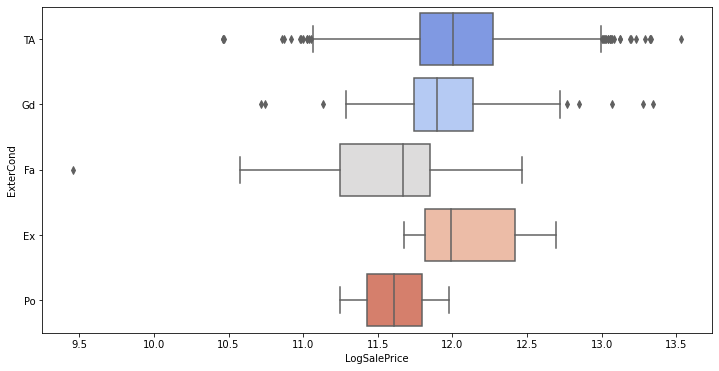

In [166]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'ExterCond', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [167]:
housing.groupby('ExterCond').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
ExterCond             
TA          120.510959
Ex          117.117117
Gd          114.185111
Fa           81.705318
Po           61.977047

In [168]:
housing.groupby('ExterCond').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
ExterCond              
TA            12.001505
Ex            11.989160
Gd            11.898188
Fa            11.667678
Po            11.610853

# 29. Foundation

In [169]:
sum(housing['Foundation'].isnull())

0

In [170]:
housing['Foundation'].value_counts()

CBlock    1140
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: Foundation, dtype: int64

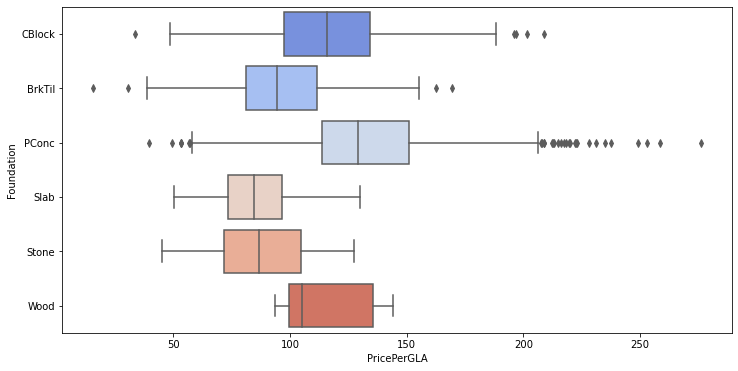

In [171]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Foundation', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

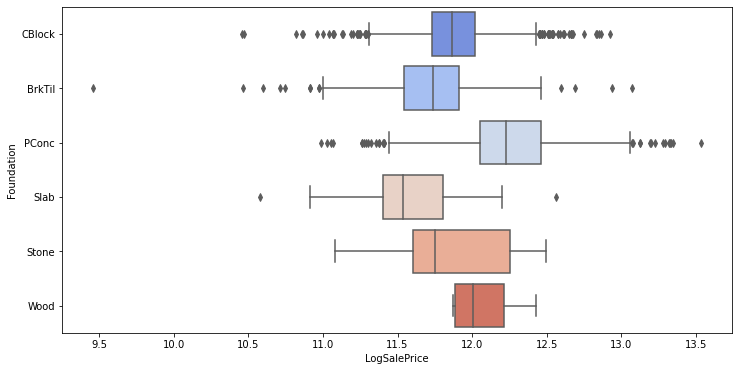

In [172]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Foundation', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [173]:
housing.groupby('Foundation').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Foundation             
PConc        129.185268
CBlock       115.677048
Wood         104.992658
BrkTil        94.281439
Stone         86.600335
Slab          84.634174

In [174]:
housing.groupby('Foundation').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Foundation              
PConc          12.225875
Wood           12.007622
CBlock         11.861819
Stone          11.753088
BrkTil         11.735669
Slab           11.536139

# 30. BsmtQual

In [175]:
sum(housing['BsmtQual'].isnull())

69

In [176]:
housing['BsmtQual'].fillna('NA', inplace = True)

In [177]:
housing['BsmtQual'].value_counts()

TA    1166
Gd    1077
Ex     188
Fa      78
NA      69
Po       2
Name: BsmtQual, dtype: int64

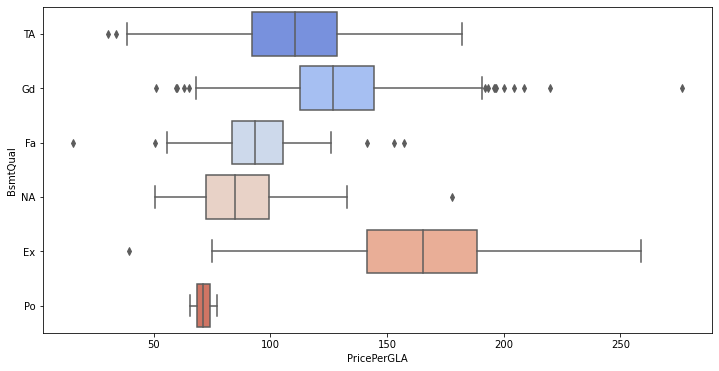

In [178]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtQual', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

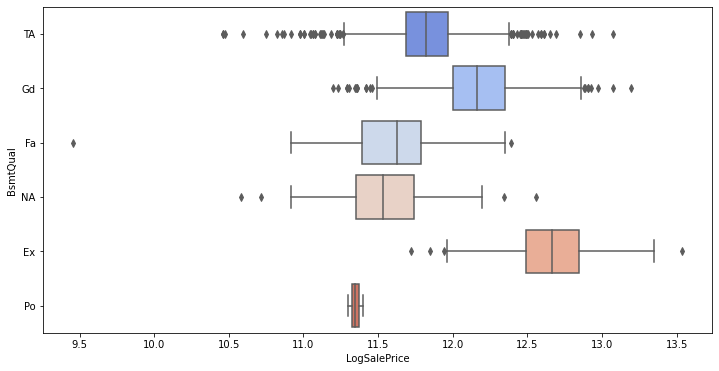

In [179]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtQual', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [180]:
housing.groupby('BsmtQual').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtQual             
Ex         165.490026
Gd         126.652893
TA         110.530896
Fa          93.562001
NA          84.835631
Po          71.257080

In [181]:
housing.groupby('BsmtQual').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtQual              
Ex           12.664288
Gd           12.160029
TA           11.824080
Fa           11.626254
NA           11.530765
Po           11.348680

# 31. BsmtCond

In [182]:
sum(housing['BsmtCond'].isnull())

69

In [183]:
housing['BsmtCond'].fillna('NA', inplace = True)

In [184]:
housing['BsmtCond'].value_counts()

TA    2316
Gd     101
Fa      88
NA      69
Po       3
Ex       3
Name: BsmtCond, dtype: int64

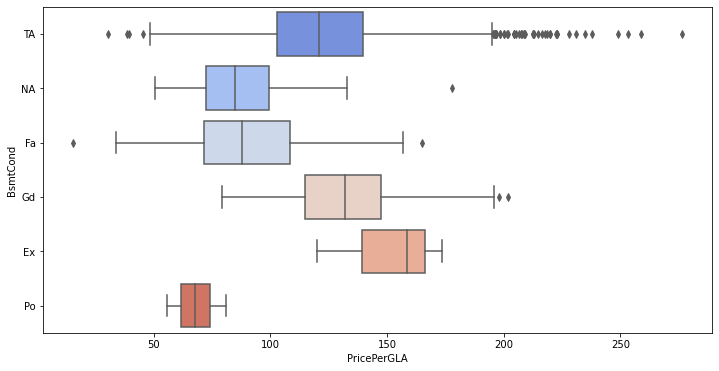

In [185]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtCond', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

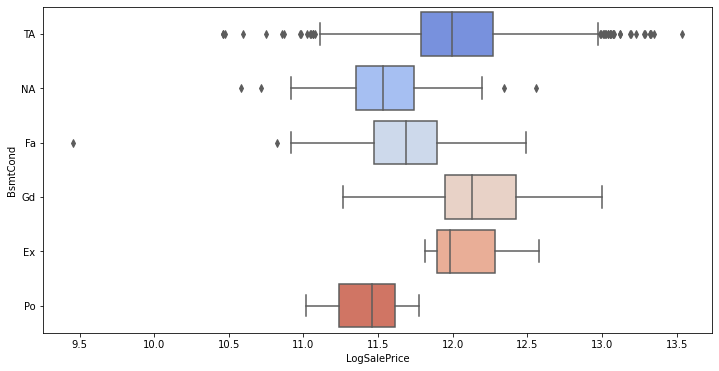

In [186]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtCond', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [187]:
housing.groupby('BsmtCond').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtCond             
Ex         158.572844
Gd         131.988829
TA         120.791406
Fa          87.583685
NA          84.835631
Po          67.477876

In [188]:
housing.groupby('BsmtCond').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtCond              
Gd           12.128111
TA           11.996892
Ex           11.982929
Fa           11.684774
NA           11.530765
Po           11.456884

# 32. BsmtExposure

In [189]:
sum(housing['BsmtExposure'].isnull())

71

In [190]:
housing['BsmtExposure'].fillna('NA', inplace = True)

In [191]:
housing['BsmtExposure'].value_counts()

No    1708
Av     344
Gd     242
Mn     215
NA      71
Name: BsmtExposure, dtype: int64

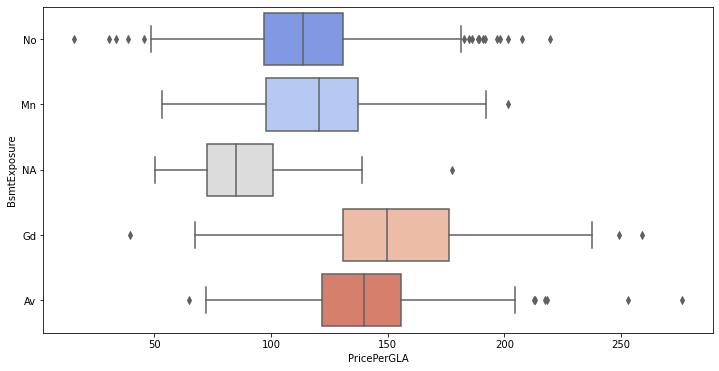

In [192]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtExposure', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

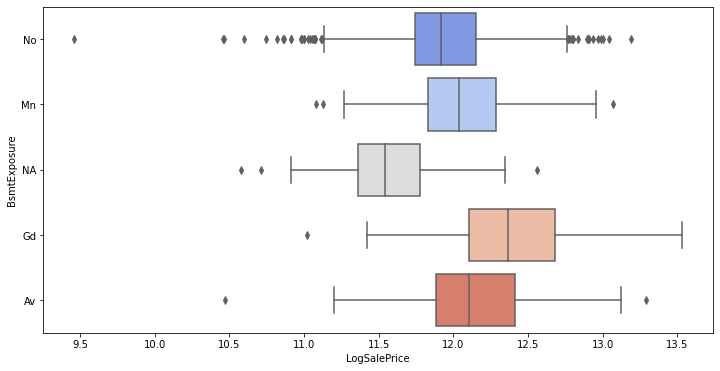

In [193]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtExposure', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [194]:
housing.groupby('BsmtExposure').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtExposure             
Gd             149.512935
Av             139.691378
Mn             120.711563
No             113.872739
NA              85.015940

In [195]:
housing.groupby('BsmtExposure').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtExposure              
Gd               12.367341
Av               12.102099
Mn               12.037654
No               11.918391
NA               11.541513

# 33. BsmtFinType1

In [196]:
sum(housing['BsmtFinType1'].isnull())

69

In [197]:
housing['BsmtFinType1'].fillna('NA', inplace = True)

In [198]:
housing['BsmtFinType1'].value_counts()

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
NA      69
Name: BsmtFinType1, dtype: int64

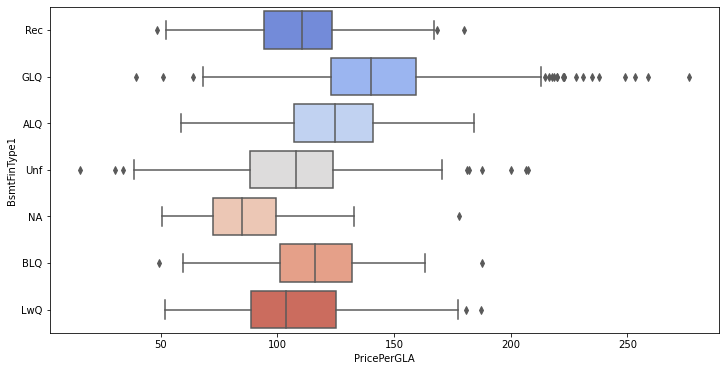

In [199]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtFinType1', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

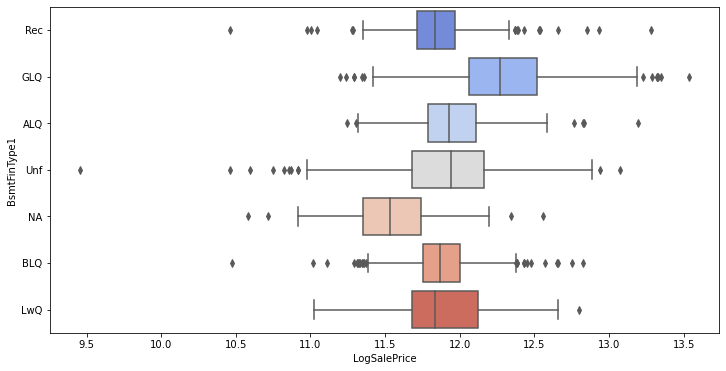

In [200]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtFinType1', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [201]:
housing.groupby('BsmtFinType1').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtFinType1             
GLQ            139.906701
ALQ            124.775225
BLQ            115.931941
Rec            110.522599
Unf            107.953501
LwQ            103.571429
NA              84.835631

In [202]:
housing.groupby('BsmtFinType1').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtFinType1              
GLQ              12.271392
Unf              11.943001
ALQ              11.928341
BLQ              11.870600
LwQ              11.837903
Rec              11.835009
NA               11.530765

# 34. BsmtFinSF1

In [203]:
sum(housing['BsmtFinSF1'].isnull())

1

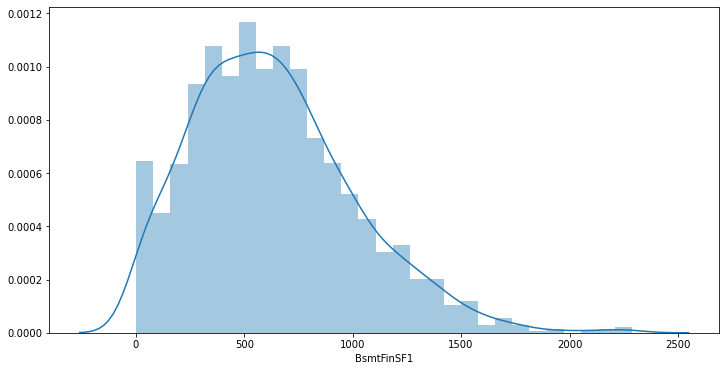

In [204]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0]['BsmtFinSF1']);

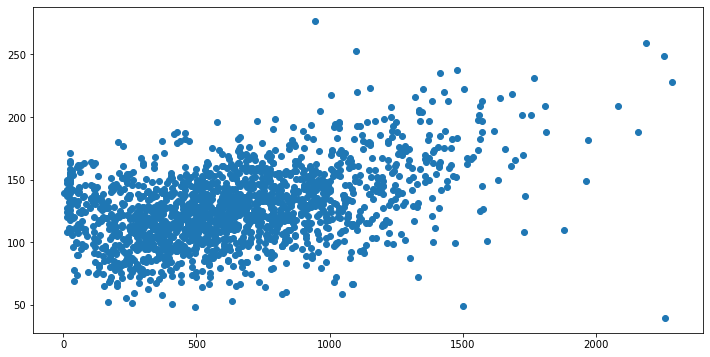

In [205]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0]['BsmtFinSF1'], 
            housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0]['PricePerGLA']);

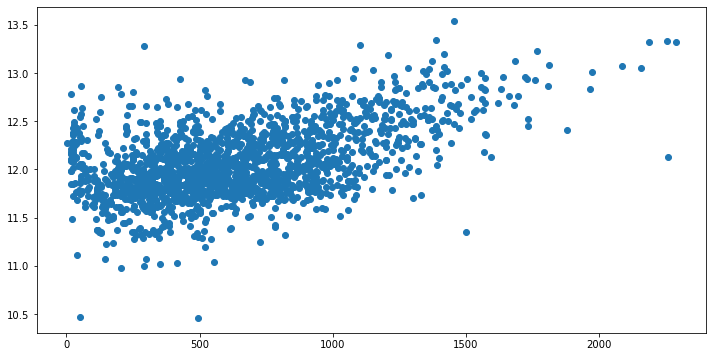

In [206]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0]['BsmtFinSF1'], 
            housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0]['LogSalePrice']);

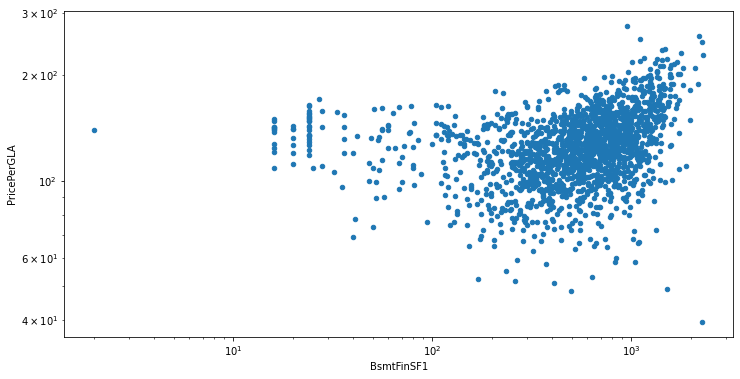

In [207]:
housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0].plot(kind = 'scatter', x = 'BsmtFinSF1', 
                                                                             y = 'PricePerGLA', logx = True, 
                                                                             logy = True, figsize = (12, 6));

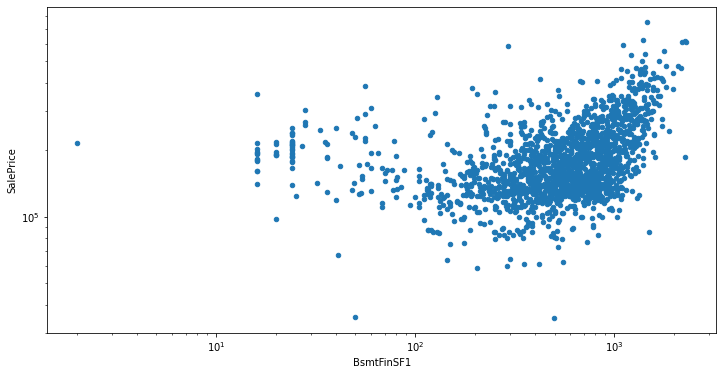

In [208]:
housing[(~housing['BsmtFinSF1'].isnull()) & housing['BsmtFinSF1'] != 0].plot(kind = 'scatter', x = 'BsmtFinSF1', 
                                                                             y = 'SalePrice', logx = True, 
                                                                             logy = True, figsize = (12, 6));

# 35. BsmtFinType2

In [209]:
sum(housing['BsmtFinType2'].isnull())

70

In [210]:
housing['BsmtFinType2'].value_counts()

Unf    2180
Rec      97
LwQ      84
BLQ      64
ALQ      53
GLQ      32
Name: BsmtFinType2, dtype: int64

In [211]:
housing.groupby(['BsmtFinType1', 'BsmtFinType2']).median()[['PricePerGLA', 'LogSalePrice']]

PricePerGLA  LogSalePrice
BsmtFinType1 BsmtFinType2                           
ALQ          BLQ            131.523901     11.944687
             GLQ            130.417738     11.823751
             LwQ            120.377918     12.053794
             Rec            113.930913     11.955996
             Unf            125.079770     11.918391
BLQ          ALQ            141.923339     11.771369
             BLQ            154.929577     11.870600
             GLQ            134.126984     12.354493
             LwQ            118.374558     11.845103
             Rec            120.583889     11.887784
             Unf            113.473942     11.856490
GLQ          ALQ            133.088092     12.318301
             BLQ            143.977192     12.216023
             LwQ            143.274854     12.078239
             Rec            131.419940     12.052339
             Unf            140.021751     12.278393
LwQ          ALQ            120.018549     11.990508
             BLQ            123.638693     11.835009
             GLQ            130.869223     12.280087
             Rec            128.162303     11.795824
             Unf             92.779311     11.802605
Rec          ALQ            136.000000     11.883109
             BLQ             93.827160     11.775290
             GLQ            149.572650     11.904968
             LwQ            113.190967     11.810968
             Unf            107.320615     11.842229
Unf          Unf            107.953501     11.943001

# 36. BsmtFinSF2

In [212]:
sum(housing['BsmtFinSF2'].isnull())

1

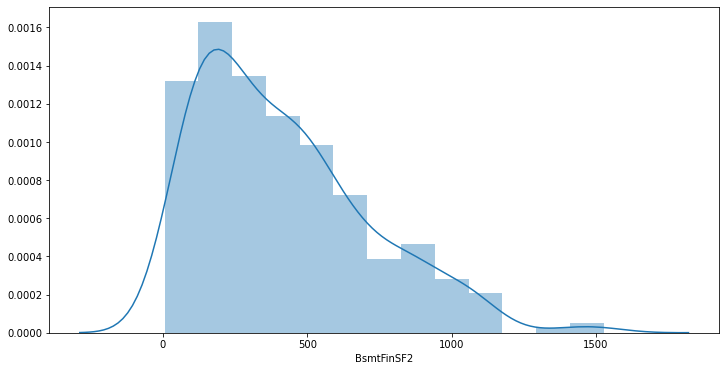

In [213]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0]['BsmtFinSF2']);

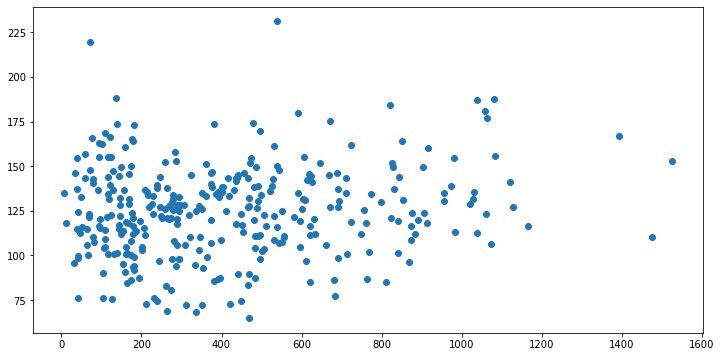

In [214]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0]['BsmtFinSF2'], 
            housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0]['PricePerGLA']);

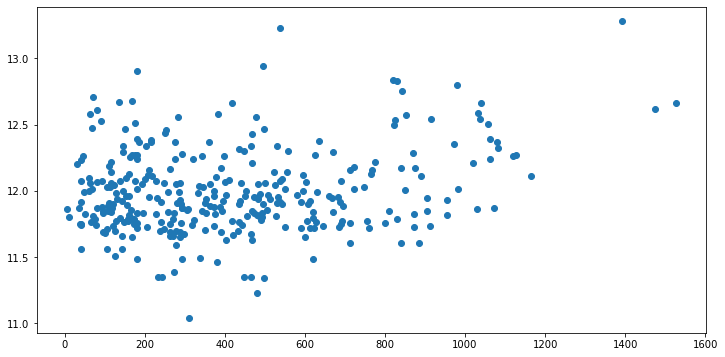

In [215]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0]['BsmtFinSF2'], 
            housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0]['LogSalePrice']);

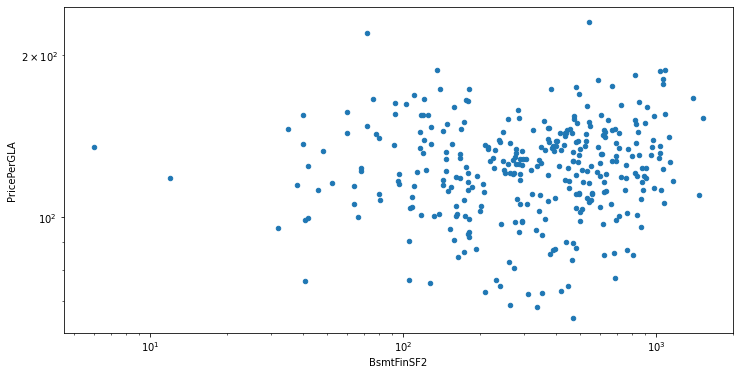

In [216]:
housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0].plot(kind = 'scatter', x = 'BsmtFinSF2', 
                                                                             y = 'PricePerGLA', logx = True, 
                                                                             logy = True, figsize = (12, 6));

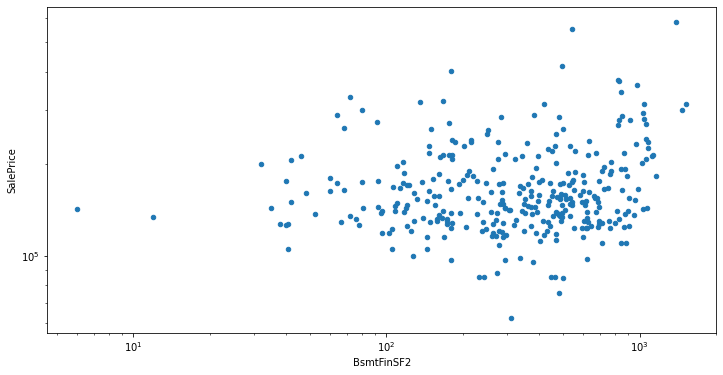

In [217]:
housing[(~housing['BsmtFinSF2'].isnull()) & housing['BsmtFinSF2'] != 0].plot(kind = 'scatter', x = 'BsmtFinSF2', 
                                                                             y = 'SalePrice', logx = True, 
                                                                             logy = True, figsize = (12, 6));

# 37. BsmtUnfSF

In [218]:
sum(housing['BsmtUnfSF'].isnull())

1

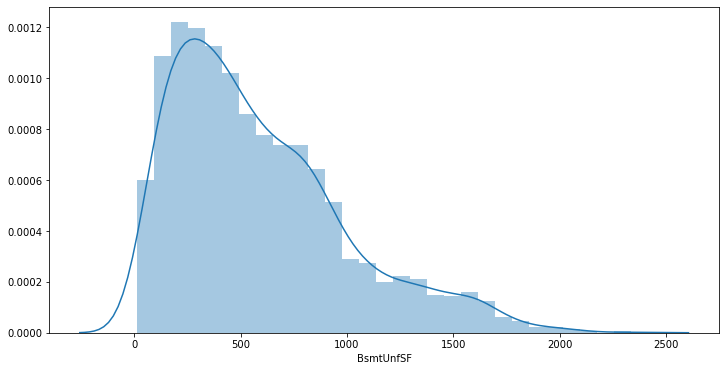

In [219]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0]['BsmtUnfSF']);

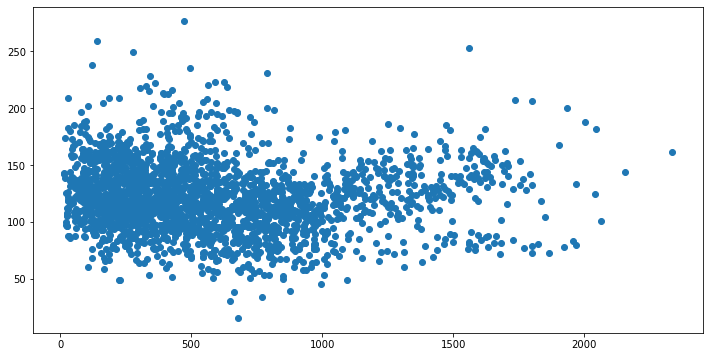

In [220]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0]['BsmtUnfSF'], 
            housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0]['PricePerGLA']);

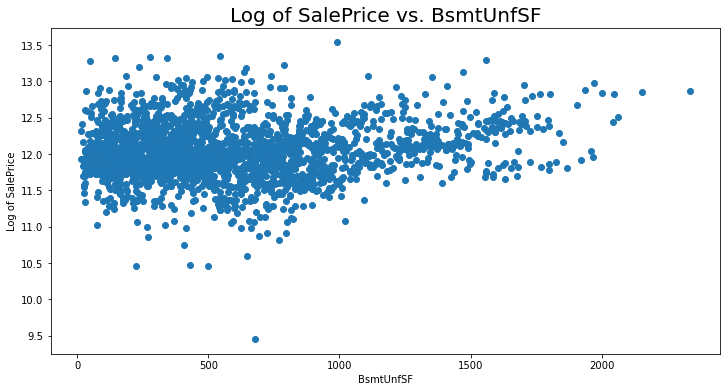

In [7]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0]['BsmtUnfSF'], 
            housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0]['LogSalePrice'])
plt.xlabel('BsmtUnfSF')
plt.ylabel('Log of SalePrice')
plt.title('Log of SalePrice vs. BsmtUnfSF', size = 20);

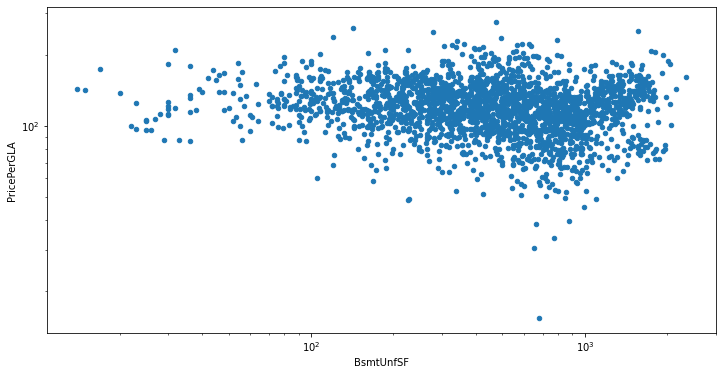

In [222]:
housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0].plot(kind = 'scatter', x = 'BsmtUnfSF', 
                                                                             y = 'PricePerGLA', logx = True, 
                                                                             logy = True, figsize = (12, 6));

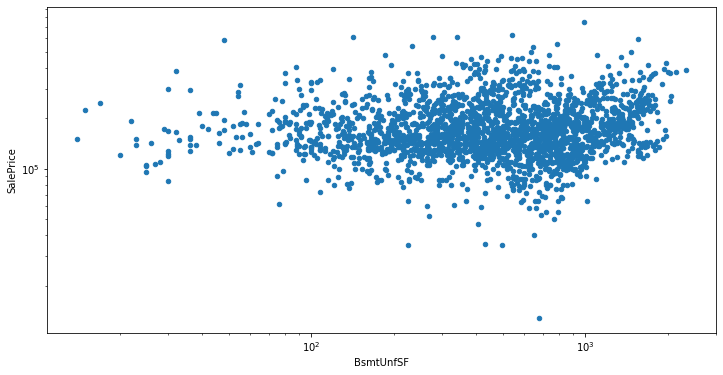

In [223]:
housing[(~housing['BsmtUnfSF'].isnull()) & housing['BsmtUnfSF'] != 0].plot(kind = 'scatter', x = 'BsmtUnfSF', 
                                                                             y = 'SalePrice', logx = True, 
                                                                             logy = True, figsize = (12, 6));

# 38. TotalBsmtSF

In [224]:
sum(housing['TotalBsmtSF'].isnull())

1

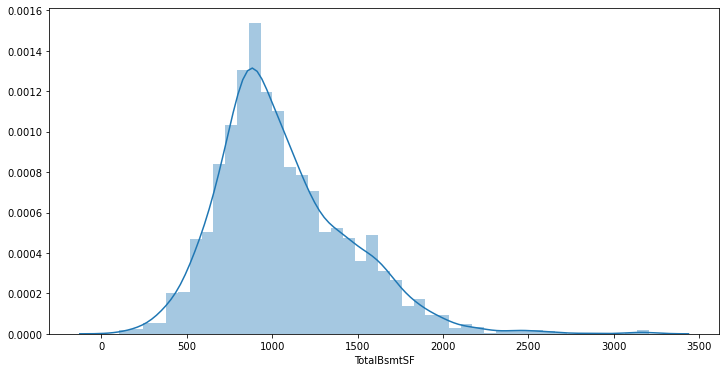

In [225]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0]['TotalBsmtSF']);

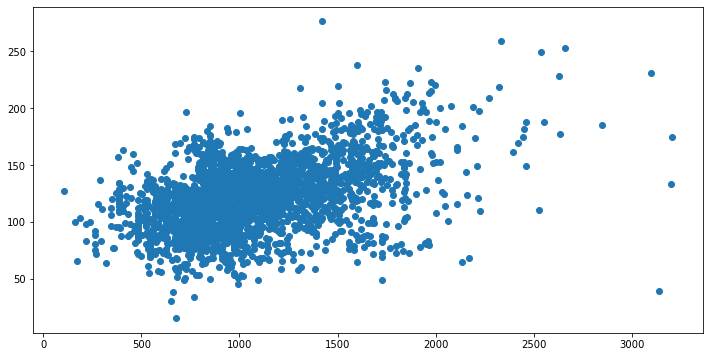

In [226]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0]['TotalBsmtSF'], 
            housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0]['PricePerGLA']);

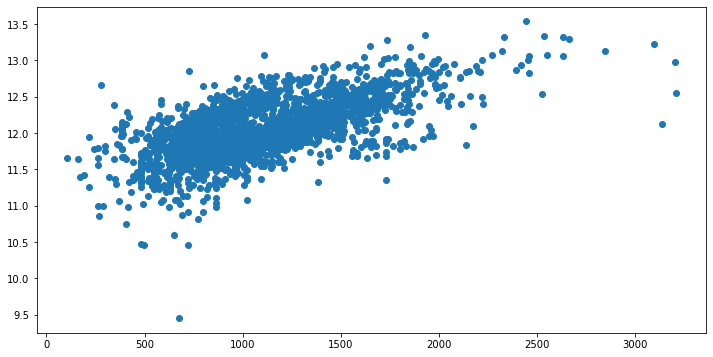

In [227]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0]['TotalBsmtSF'], 
            housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0]['LogSalePrice']);

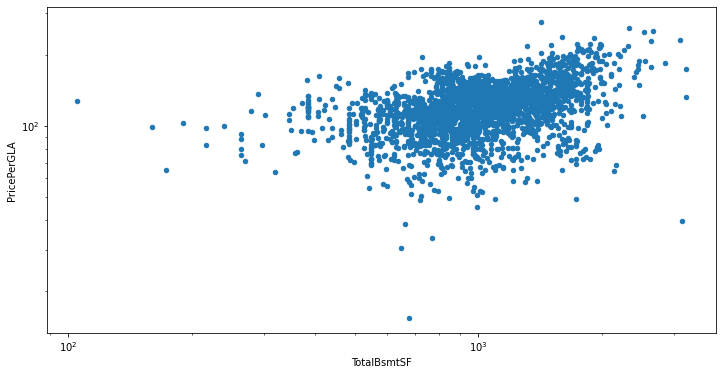

In [228]:
housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0].plot(kind = 'scatter', x = 'TotalBsmtSF', 
                                                                             y = 'PricePerGLA', logx = True, 
                                                                             logy = True, figsize = (12, 6));

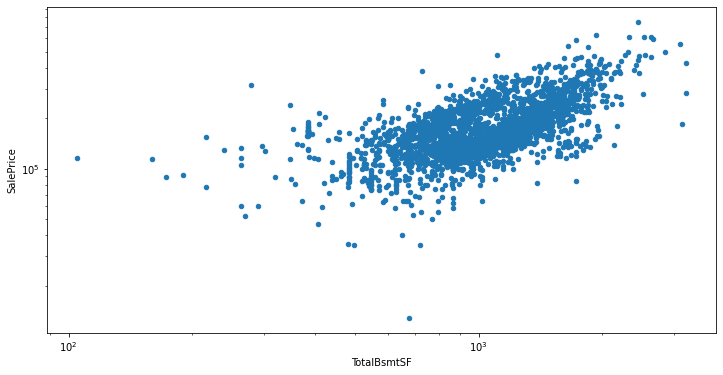

In [229]:
housing[(~housing['TotalBsmtSF'].isnull()) & housing['TotalBsmtSF'] != 0].plot(kind = 'scatter', x = 'TotalBsmtSF', 
                                                                             y = 'SalePrice', logx = True, 
                                                                             logy = True, figsize = (12, 6));

# 39. Heating

In [230]:
sum(housing['Heating'].isnull())

0

In [231]:
housing['Heating'].value_counts()

GasA     2540
GasW       25
Grav        7
Wall        5
OthW        2
Floor       1
Name: Heating, dtype: int64

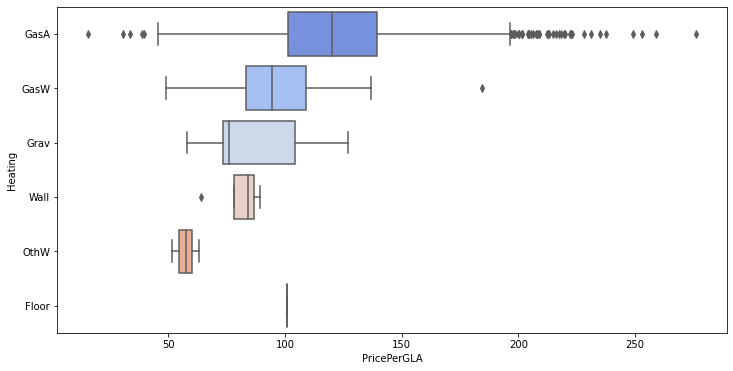

In [232]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Heating', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

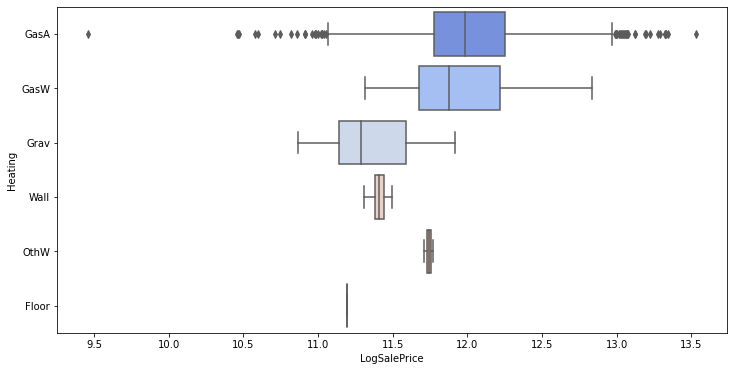

In [233]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Heating', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [234]:
housing.groupby('Heating').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Heating             
GasA      119.937651
Floor     100.694444
GasW       94.488189
Wall       84.134615
Grav       75.757576
OthW       57.331966

In [235]:
housing.groupby('Heating').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Heating              
GasA        11.982929
GasW        11.877569
OthW        11.741606
Wall        11.407565
Grav        11.289782
Floor       11.191342

# 40. HeatingQC

In [236]:
sum(housing['HeatingQC'].isnull())

0

In [237]:
housing['HeatingQC'].value_counts()

Ex    1293
TA     768
Gd     434
Fa      84
Po       1
Name: HeatingQC, dtype: int64

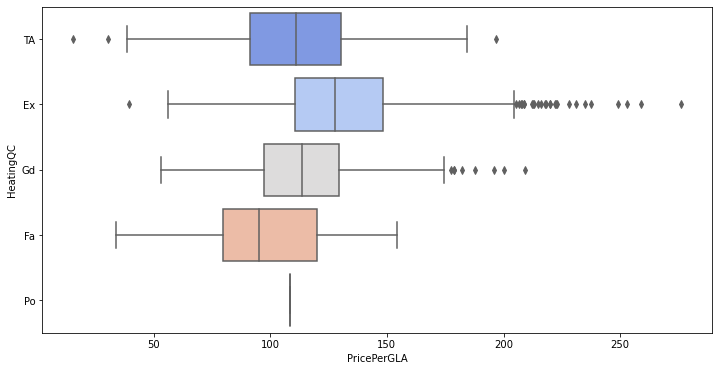

In [238]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HeatingQC', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

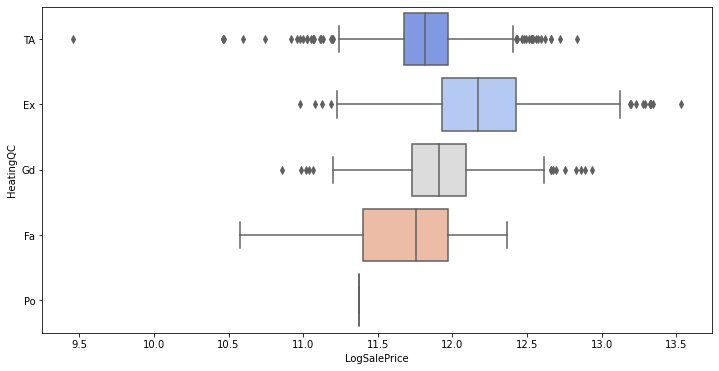

In [239]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HeatingQC', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [240]:
housing.groupby('HeatingQC').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
HeatingQC             
Ex          127.753304
Gd          113.670424
TA          110.849310
Po          108.343711
Fa           95.215142

In [241]:
housing.groupby('HeatingQC').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
HeatingQC              
Ex            12.173033
Gd            11.909508
TA            11.813030
Fa            11.755872
Po            11.373663

# 41. CentralAir

In [242]:
sum(housing['CentralAir'].isnull())

0

In [243]:
housing['CentralAir'].value_counts()

Y    2417
N     163
Name: CentralAir, dtype: int64

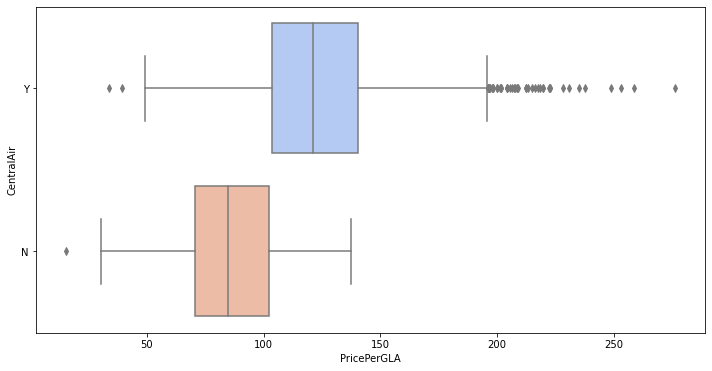

In [244]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'CentralAir', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

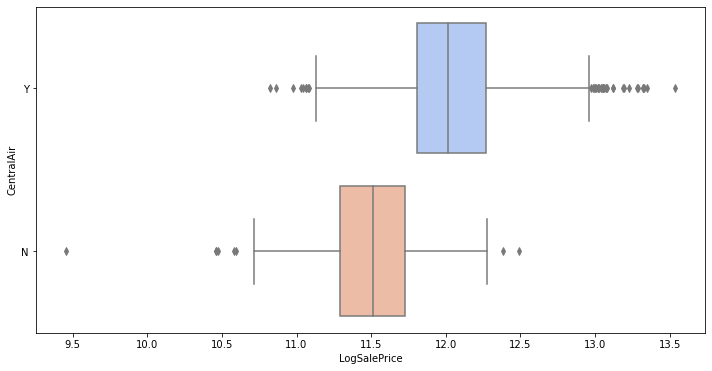

In [245]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'CentralAir', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [246]:
housing.groupby('CentralAir').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
CentralAir             
Y            121.268657
N             84.835631

In [247]:
housing.groupby('CentralAir').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
CentralAir              
Y              12.013095
N              11.508917

# 42. Electrical

In [248]:
sum(housing['Electrical'].isnull())

1

In [249]:
housing['Electrical'].value_counts()

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

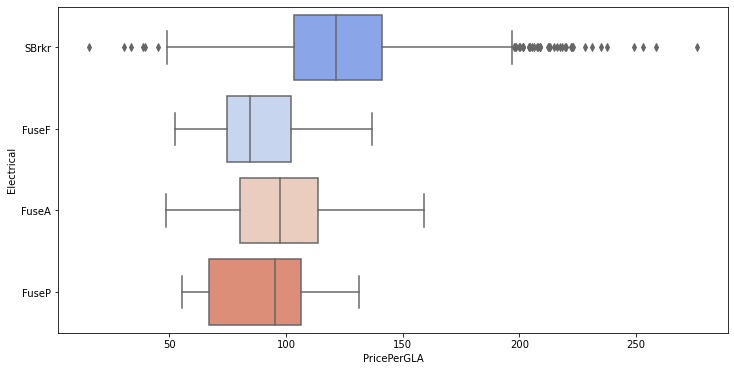

In [250]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Electrical', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

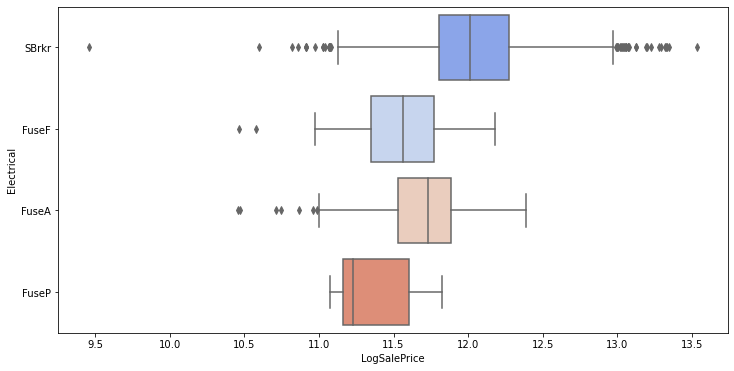

In [251]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Electrical', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [252]:
housing.groupby('Electrical').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Electrical             
SBrkr        121.527778
FuseA         97.273512
FuseP         95.104895
FuseF         84.541063

In [253]:
housing.groupby('Electrical').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Electrical              
SBrkr          12.013701
FuseA          11.728037
FuseF          11.561716
FuseP          11.225243

# 43. 1stFlrSF

In [254]:
sum(housing['1stFlrSF'].isnull())

0

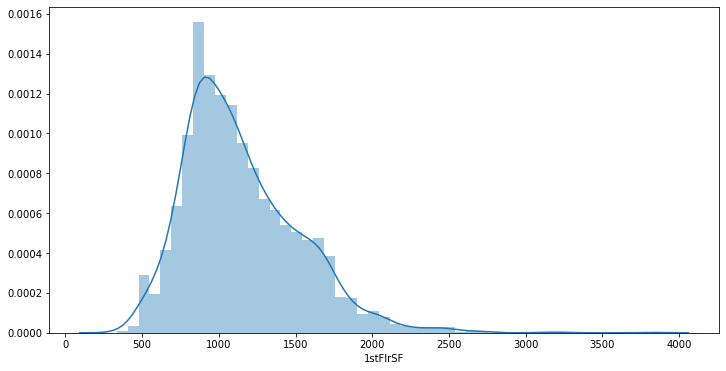

In [255]:
plt.figure(figsize = (12, 6))
sns.distplot(housing['1stFlrSF']);

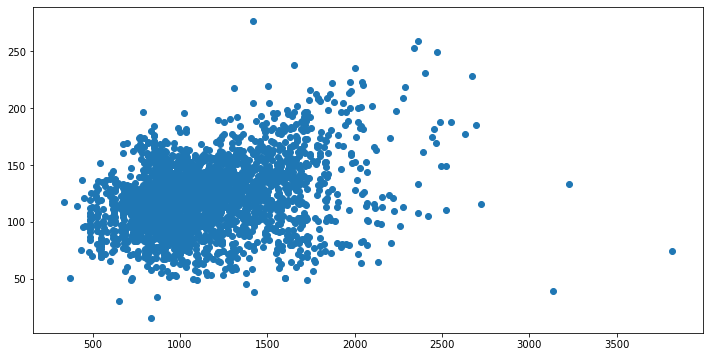

In [256]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['1stFlrSF'], housing['PricePerGLA']);

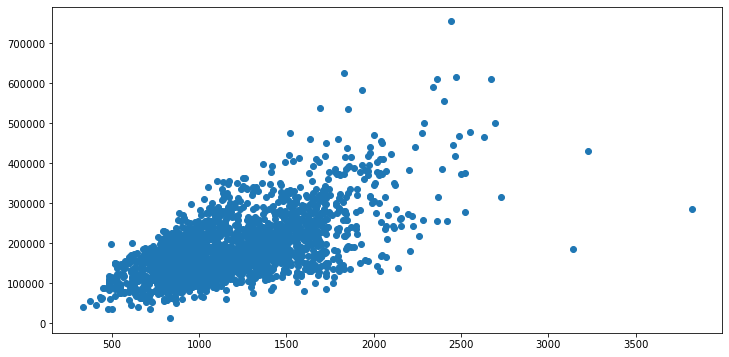

In [257]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['1stFlrSF'], housing['SalePrice']);

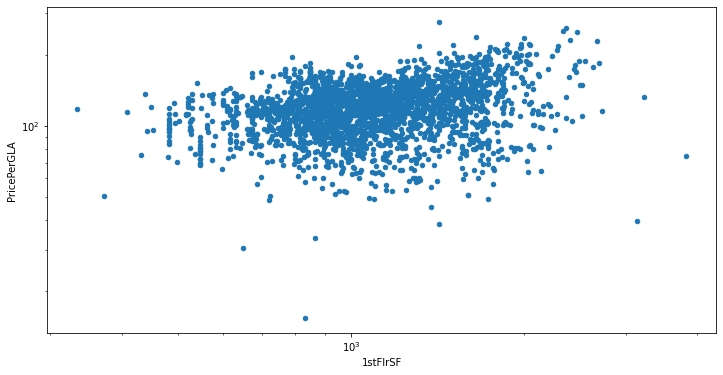

In [258]:
housing.plot(kind = 'scatter', x = '1stFlrSF', y = 'PricePerGLA', logx = True, logy = True, figsize = (12, 6));

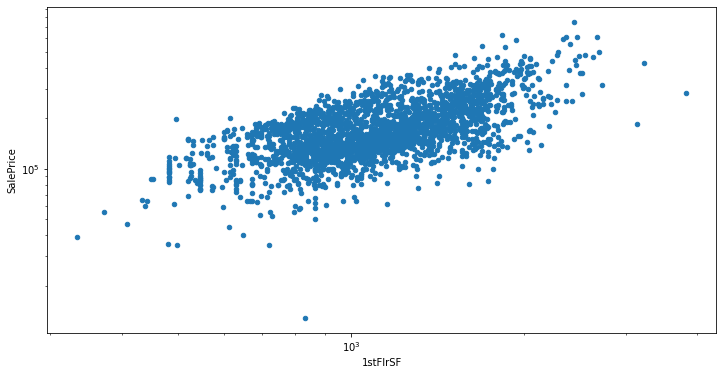

In [259]:
housing.plot(kind = 'scatter', x = '1stFlrSF', y = 'SalePrice', logx = True, logy = True, figsize = (12, 6));

# 44. 2ndFlrSF

In [260]:
sum(housing['2ndFlrSF'].isnull())

0

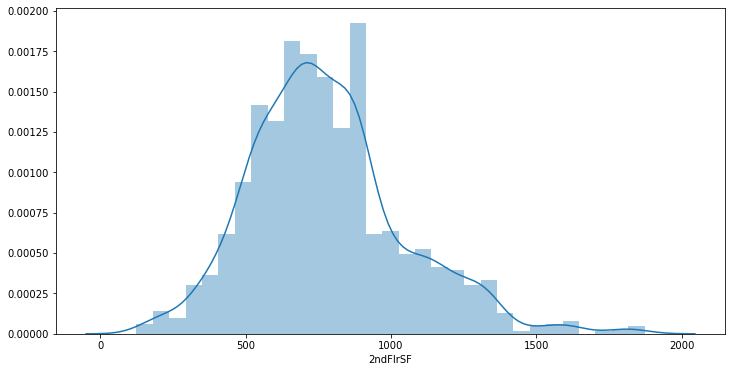

In [261]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['2ndFlrSF'] != 0]['2ndFlrSF']);

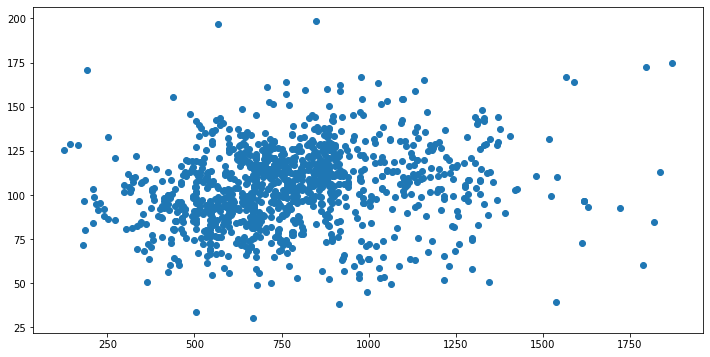

In [262]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['2ndFlrSF'] != 0]['2ndFlrSF'], housing[housing['2ndFlrSF'] != 0]['PricePerGLA']);

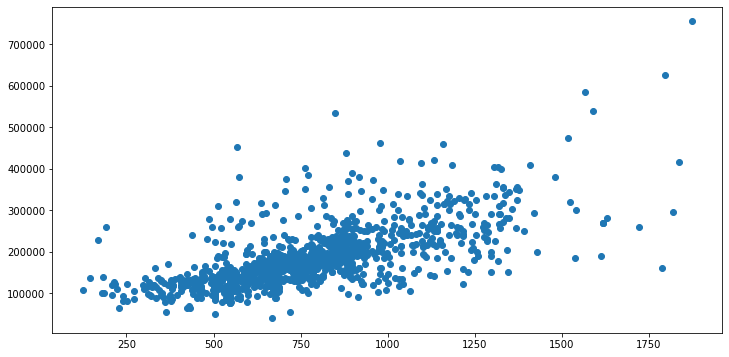

In [263]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['2ndFlrSF'] != 0]['2ndFlrSF'], housing[housing['2ndFlrSF'] != 0]['SalePrice']);

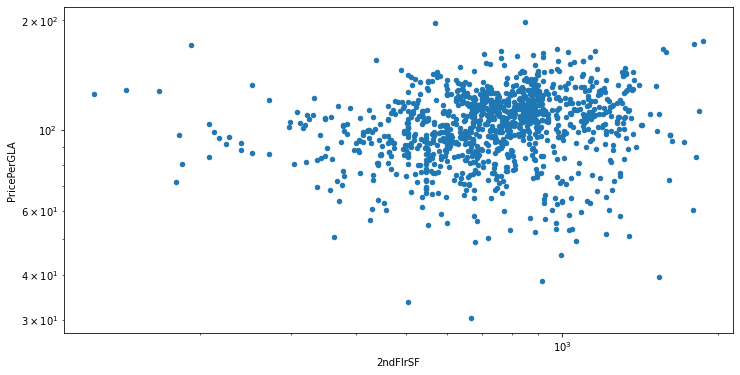

In [264]:
housing[housing['2ndFlrSF'] != 0].plot(kind = 'scatter', x = '2ndFlrSF', y = 'PricePerGLA', 
                                       logx = True, logy = True, figsize = (12, 6));

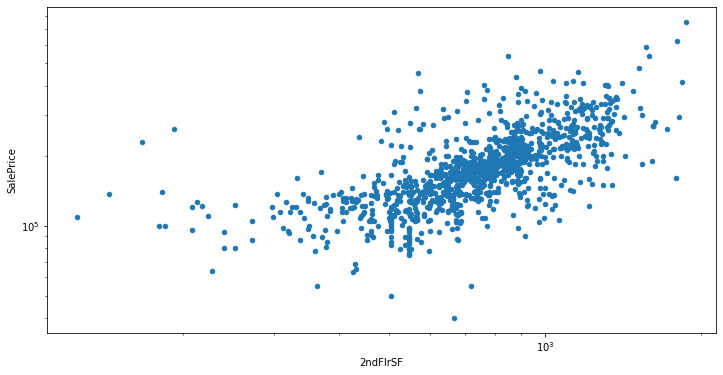

In [265]:
housing[housing['2ndFlrSF'] != 0].plot(kind = 'scatter', x = '2ndFlrSF', y = 'SalePrice', 
                                       logx = True, logy = True, figsize = (12, 6));

# 45. LowQualFinSF

In [266]:
sum(housing['LowQualFinSF'].isnull())

0

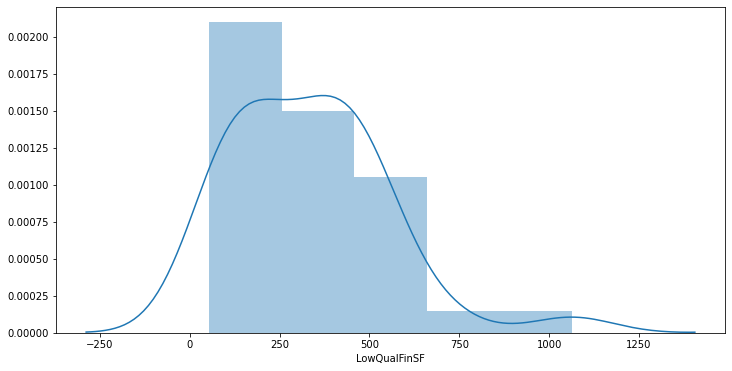

In [267]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['LowQualFinSF'] != 0]['LowQualFinSF']);

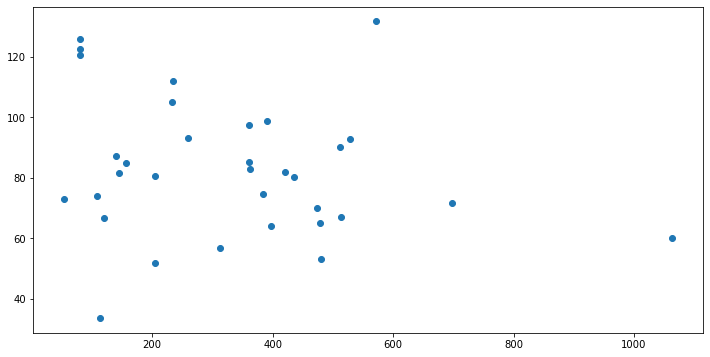

In [268]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['LowQualFinSF'] != 0]['LowQualFinSF'], housing[housing['LowQualFinSF'] != 0]['PricePerGLA']);

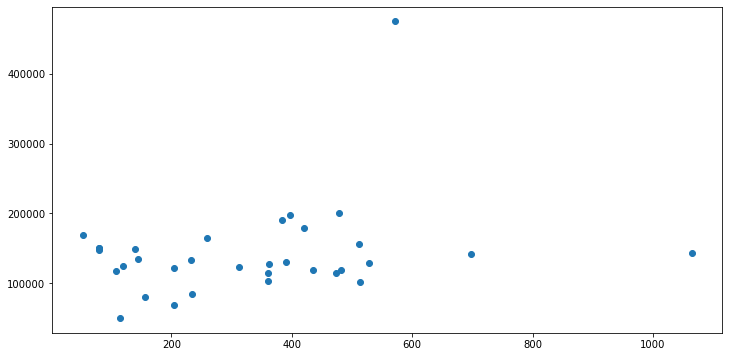

In [269]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['LowQualFinSF'] != 0]['LowQualFinSF'], housing[housing['LowQualFinSF'] != 0]['SalePrice']);

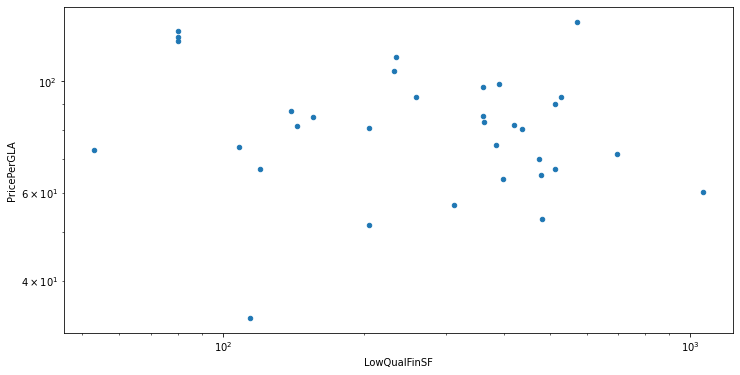

In [270]:
housing[housing['LowQualFinSF'] != 0].plot(kind = 'scatter', x = 'LowQualFinSF', y = 'PricePerGLA', 
                                           logx = True, logy = True, figsize = (12, 6));

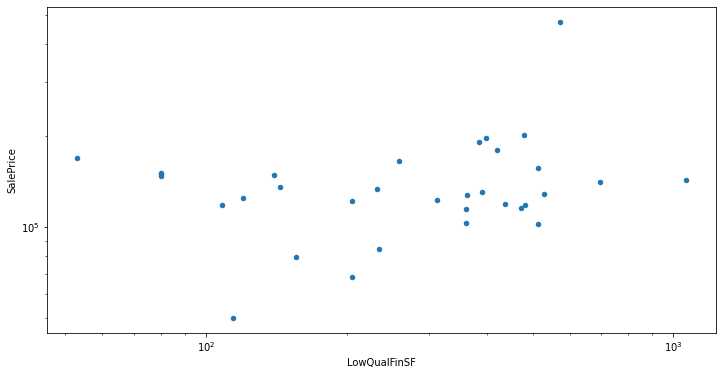

In [271]:
housing[housing['LowQualFinSF'] != 0].plot(kind = 'scatter', x = 'LowQualFinSF', y = 'SalePrice', 
                                           logx = True, logy = True, figsize = (12, 6));

# 46. GrLivArea

In [272]:
sum(housing['GrLivArea'].isnull())

0

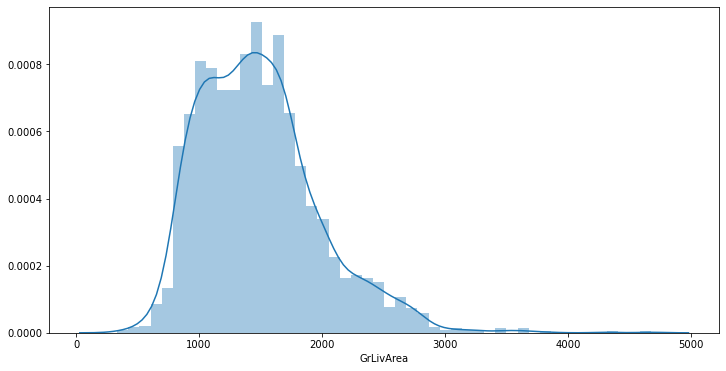

In [273]:
plt.figure(figsize = (12, 6))
sns.distplot(housing['GrLivArea']);

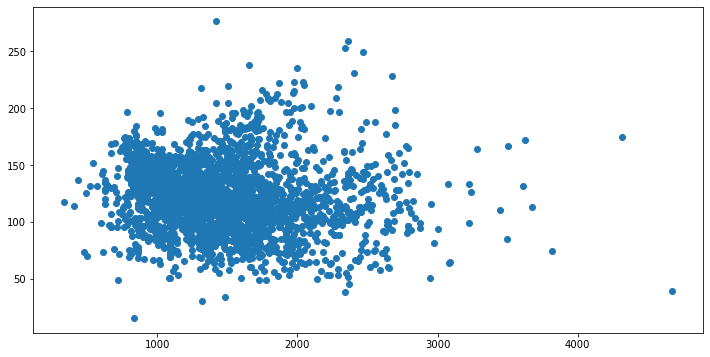

In [274]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['GrLivArea'] != 0]['GrLivArea'], housing[housing['GrLivArea'] != 0]['PricePerGLA']);

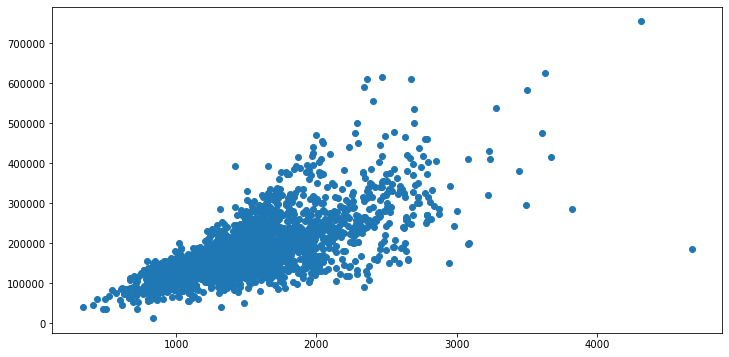

In [275]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['GrLivArea'] != 0]['GrLivArea'], housing[housing['GrLivArea'] != 0]['SalePrice']);

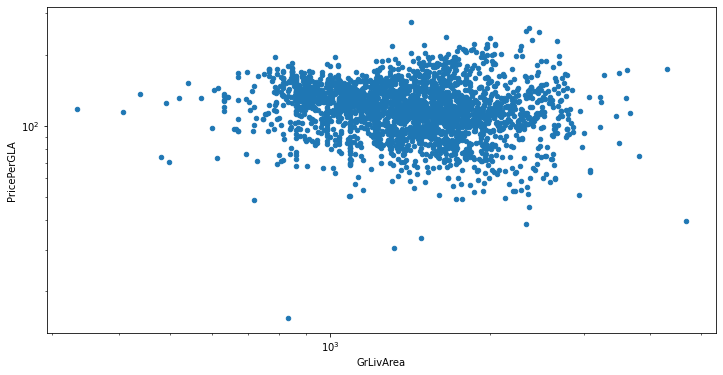

In [276]:
housing[housing['GrLivArea'] != 0].plot(kind = 'scatter', x = 'GrLivArea', y = 'PricePerGLA', 
                                           logx = True, logy = True, figsize = (12, 6));

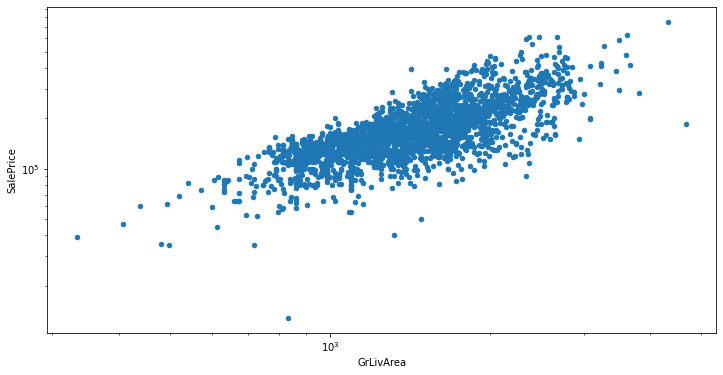

In [277]:
housing[housing['GrLivArea'] != 0].plot(kind = 'scatter', x = 'GrLivArea', y = 'SalePrice', 
                                           logx = True, logy = True, figsize = (12, 6));

# 47. BsmtFullBath

In [278]:
sum(housing['BsmtFullBath'].isnull())

2

In [279]:
housing['BsmtFullBath'].value_counts()

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64

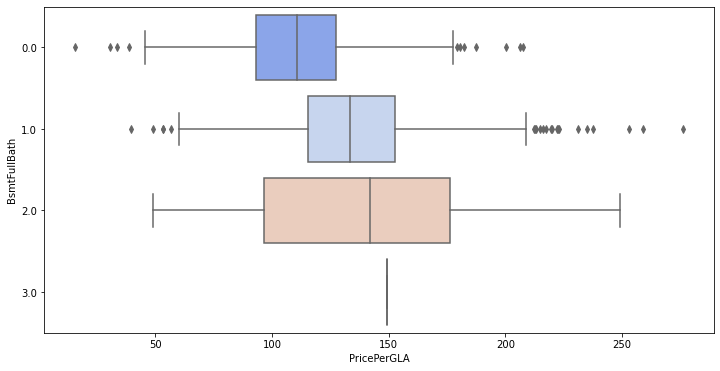

In [280]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtFullBath', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

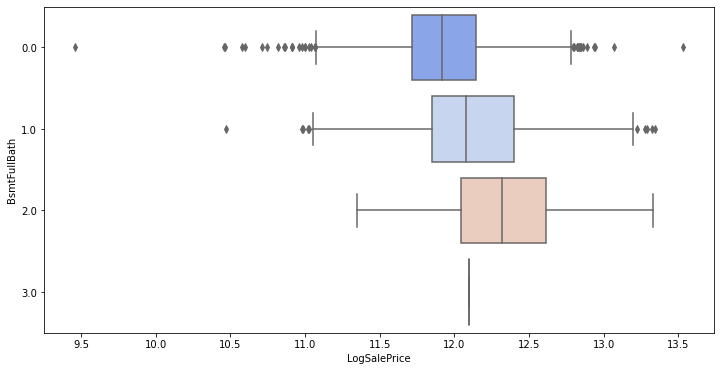

In [281]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtFullBath', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [282]:
housing.groupby('BsmtFullBath').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtFullBath             
3.0            149.166667
2.0            141.814721
1.0            133.216477
0.0            110.709117

In [283]:
housing.groupby('BsmtFullBath').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtFullBath              
2.0              12.321631
3.0              12.095141
1.0              12.081076
0.0              11.917724

# 48. BsmtHalfBath

In [284]:
sum(housing['BsmtHalfBath'].isnull())

2

In [285]:
housing['BsmtHalfBath'].value_counts()

0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64

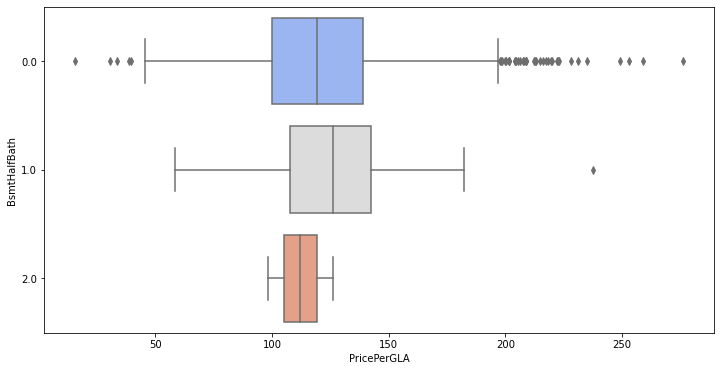

In [286]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtHalfBath', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

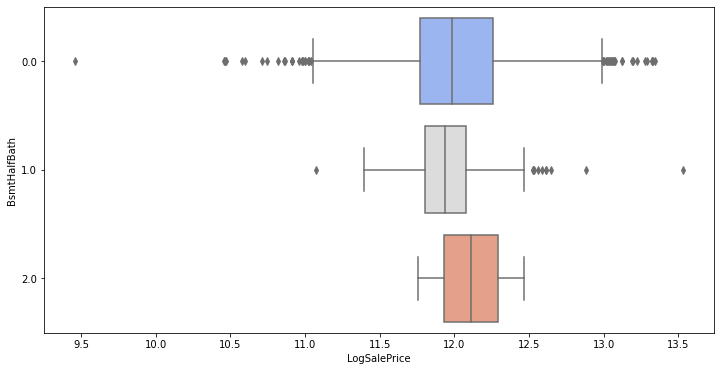

In [287]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BsmtHalfBath', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [288]:
housing.groupby('BsmtHalfBath').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BsmtHalfBath             
1.0            126.260184
0.0            119.331345
2.0            112.124835

In [289]:
housing.groupby('BsmtHalfBath').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BsmtHalfBath              
2.0              12.112154
0.0              11.982929
1.0              11.938193

# 49. FullBath

In [290]:
sum(housing['FullBath'].isnull())

0

In [291]:
housing['FullBath'].value_counts()

2    1327
1    1196
3      45
0       8
4       4
Name: FullBath, dtype: int64

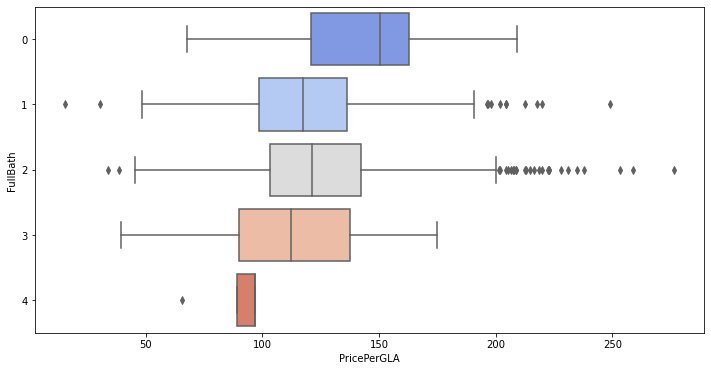

In [292]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'FullBath', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

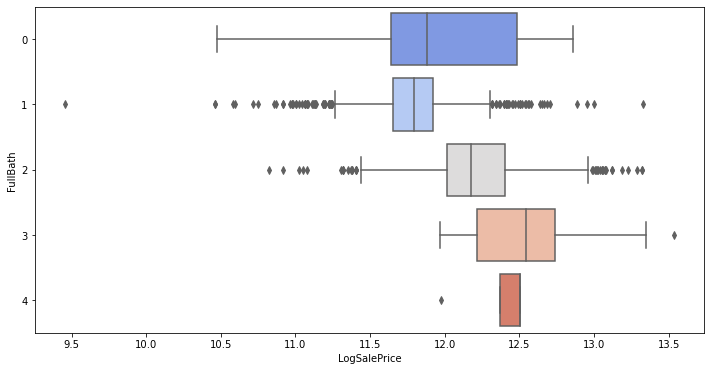

In [293]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'FullBath', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [294]:
housing.groupby('FullBath').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
FullBath             
0          150.307158
2          121.082621
1          117.475638
3          112.374405
4           96.698959

In [295]:
housing.groupby('FullBath').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
FullBath              
3            12.542188
4            12.504324
2            12.178187
0            11.881029
1            11.794338

# 50. HalfBath

In [296]:
sum(housing['HalfBath'].isnull())

0

In [297]:
housing['HalfBath'].value_counts()

0    1622
1     940
2      18
Name: HalfBath, dtype: int64

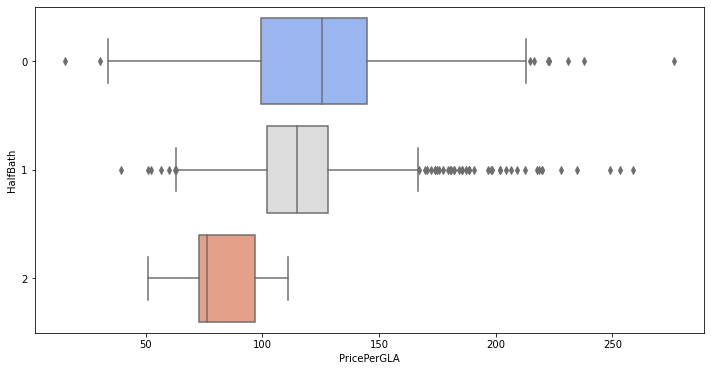

In [298]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HalfBath', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

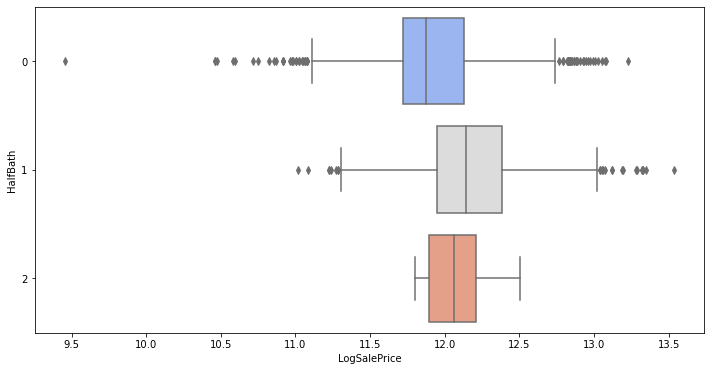

In [299]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'HalfBath', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [300]:
housing.groupby('HalfBath').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
HalfBath             
0          125.537836
1          114.718824
2           76.068142

In [301]:
housing.groupby('HalfBath').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
HalfBath              
1            12.142866
2            12.060980
0            11.877569

# 51. BedroomAbvGr

In [302]:
sum(housing['BedroomAbvGr'].isnull())

0

In [303]:
housing['BedroomAbvGr'].value_counts()

3    1409
2     656
4     349
1      99
5      40
6      20
0       7
Name: BedroomAbvGr, dtype: int64

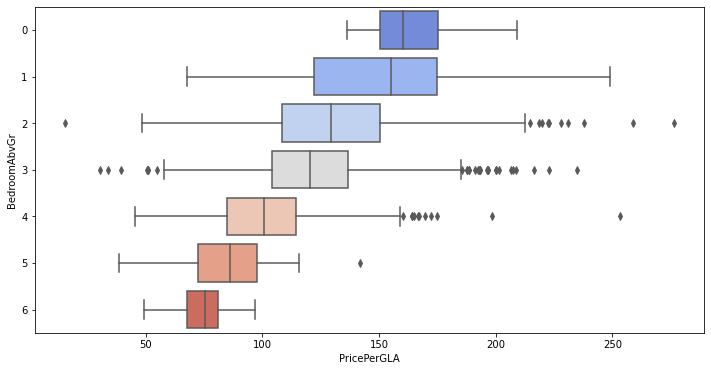

In [304]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BedroomAbvGr', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

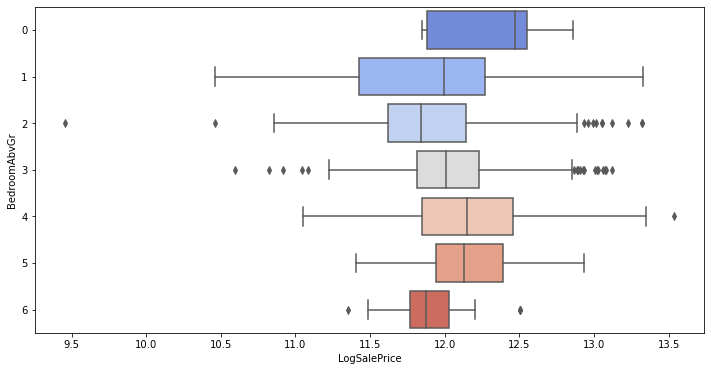

In [305]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'BedroomAbvGr', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [306]:
housing.groupby('BedroomAbvGr').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
BedroomAbvGr             
0              160.068847
1              155.070755
2              129.294490
3              120.408163
4              100.524476
5               86.093185
6               75.307839

In [307]:
housing.groupby('BedroomAbvGr').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
BedroomAbvGr              
0                12.468437
4                12.149502
5                12.132113
3                12.010666
1                11.995352
6                11.877380
2                11.840427

# 52. KitchenAbvGr

In [308]:
sum(housing['KitchenAbvGr'].isnull())

0

In [309]:
housing['KitchenAbvGr'].value_counts()

1    2473
2     104
0       2
3       1
Name: KitchenAbvGr, dtype: int64

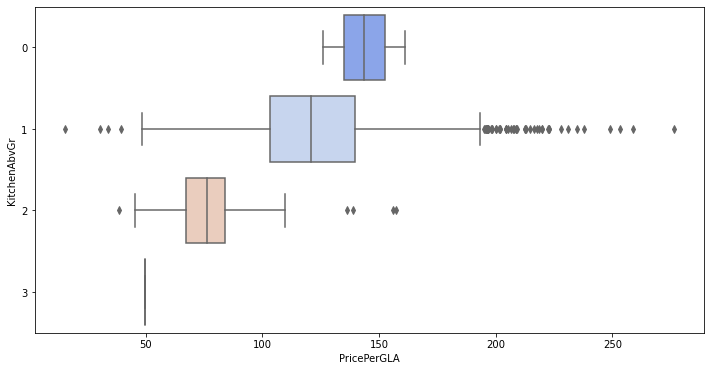

In [310]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'KitchenAbvGr', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

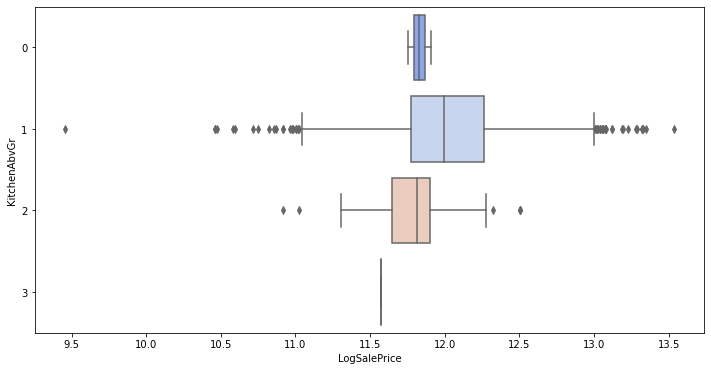

In [311]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'KitchenAbvGr', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [312]:
housing.groupby('KitchenAbvGr').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
KitchenAbvGr             
0              143.604093
1              120.879121
2               76.068142
3               49.579046

In [313]:
housing.groupby('KitchenAbvGr').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
KitchenAbvGr              
1                11.995352
0                11.830420
2                11.813030
3                11.571194

# 53. KitchenQual

In [314]:
sum(housing['KitchenQual'].isnull())

0

In [315]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

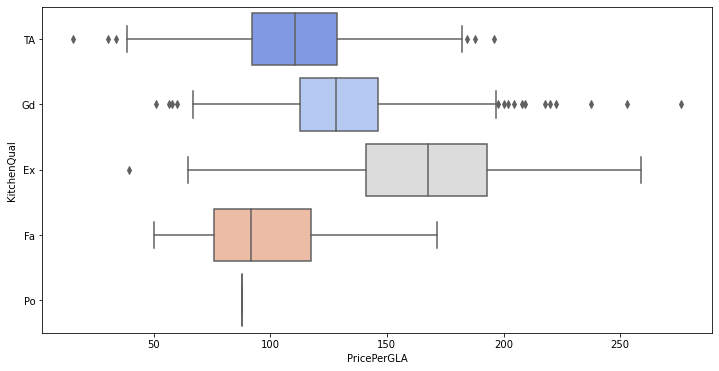

In [316]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'KitchenQual', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

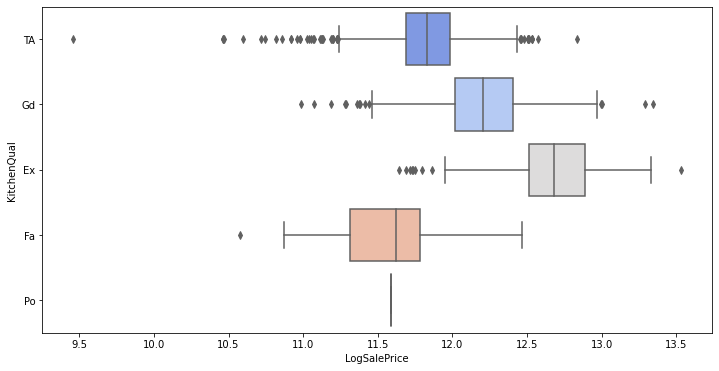

In [317]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'KitchenQual', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [318]:
housing.groupby('KitchenQual').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
KitchenQual             
Ex            167.774914
Gd            128.184391
TA            110.785755
Fa             91.854545
Po             87.826797

In [319]:
housing.groupby('KitchenQual').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
KitchenQual              
Ex              12.682288
Gd              12.206073
TA              11.831379
Fa              11.621780
Po              11.585246

# 54. TotRmsAbvGrd

In [320]:
sum(housing['TotRmsAbvGrd'].isnull())

0

In [321]:
housing['TotRmsAbvGrd'].value_counts()

6     740
7     579
5     534
8     290
4     186
9     125
10     65
3      25
11     21
12     13
13      1
2       1
Name: TotRmsAbvGrd, dtype: int64

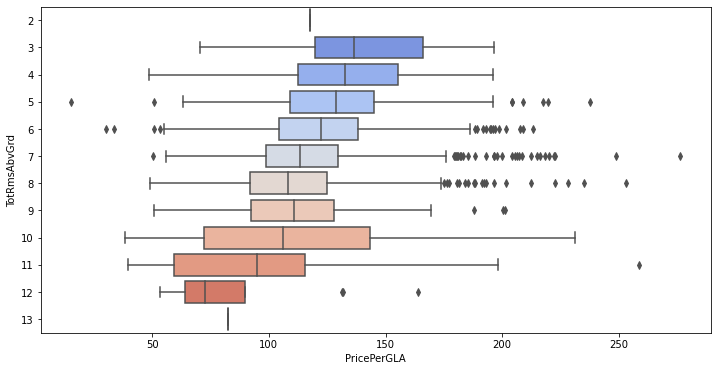

In [322]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'TotRmsAbvGrd', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

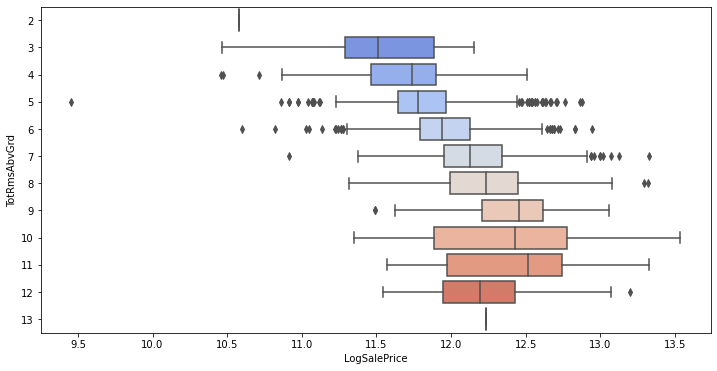

In [323]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'TotRmsAbvGrd', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [324]:
housing.groupby('TotRmsAbvGrd').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
TotRmsAbvGrd             
3              136.507937
4              132.666288
5              128.987529
6              122.386731
2              117.664671
7              113.194444
9              110.837438
8              108.232866
10             105.991516
11              94.707521
13              82.661290
12              72.519084

In [325]:
housing.groupby('TotRmsAbvGrd').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
TotRmsAbvGrd              
11               12.513557
9                12.452542
10               12.429216
8                12.230765
13               12.230765
12               12.190959
7                12.128111
6                11.938193
5                11.776250
4                11.740053
3                11.512925
2                10.578980

# 55. Functional

In [326]:
sum(housing['Functional'].isnull())

0

In [327]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

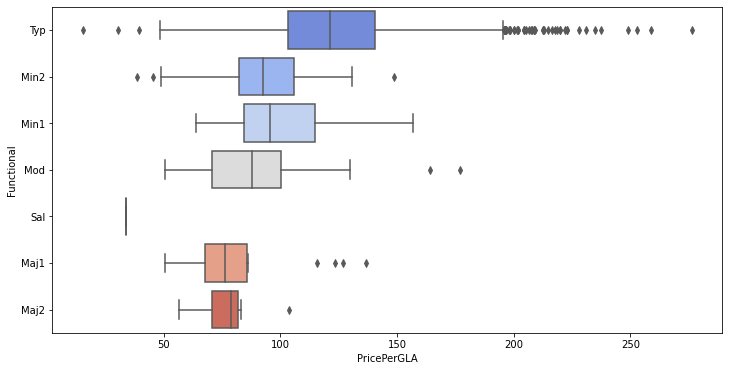

In [328]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Functional', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

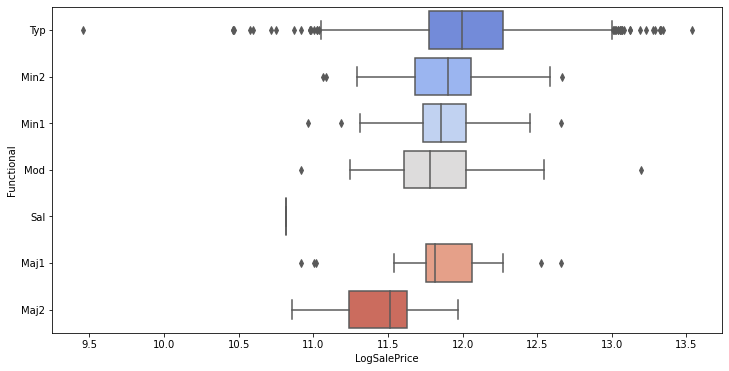

In [329]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Functional', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [330]:
housing.groupby('Functional').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Functional             
Typ          121.394231
Min1          95.588235
Min2          92.401861
Mod           88.020412
Maj2          79.022989
Maj1          76.090144
Sal           33.692722

In [331]:
housing.groupby('Functional').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Functional              
Typ            11.993807
Min2           11.903276
Min1           11.856515
Maj1           11.818487
Mod            11.779121
Maj2           11.512925
Sal            10.819778

# 56. Fireplaces

In [332]:
sum(housing['Fireplaces'].isnull())

0

In [333]:
housing['Fireplaces'].value_counts()

0    1241
1    1132
2     195
3      11
4       1
Name: Fireplaces, dtype: int64

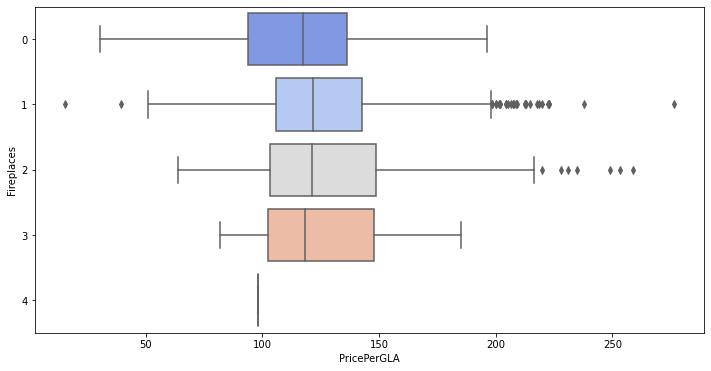

In [334]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Fireplaces', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

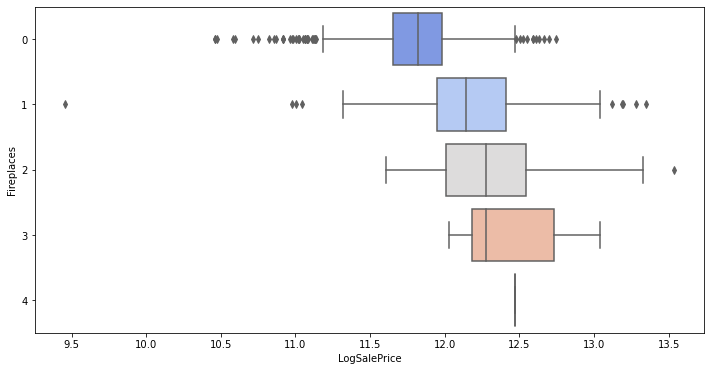

In [335]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Fireplaces', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [336]:
housing.groupby('Fireplaces').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Fireplaces             
1            121.468002
2            121.268657
3            118.188252
0            117.219388
4             98.261527

In [337]:
housing.groupby('Fireplaces').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Fireplaces              
4              12.468437
2              12.278393
3              12.273731
1              12.144197
0              11.818570

# 57. FireplaceQu

In [338]:
sum(housing['FireplaceQu'].isnull())

1241

In [339]:
housing['FireplaceQu'].fillna('NA', inplace = True)

In [340]:
housing['FireplaceQu'].value_counts()

NA    1241
Gd     619
TA     572
Fa      70
Po      43
Ex      35
Name: FireplaceQu, dtype: int64

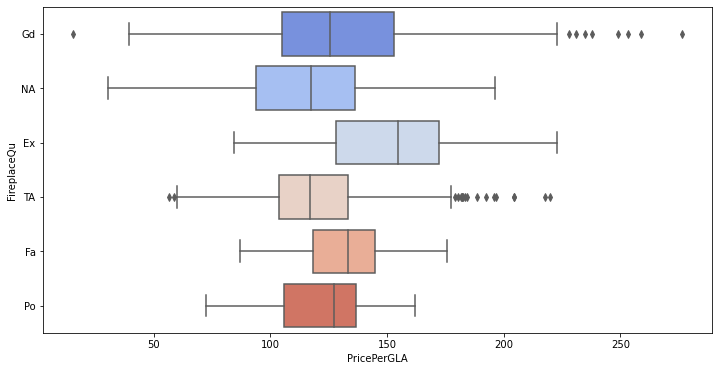

In [341]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'FireplaceQu', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

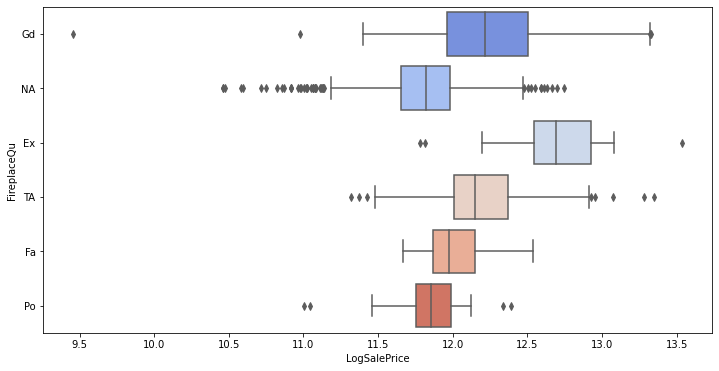

In [342]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'FireplaceQu', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [343]:
housing.groupby('FireplaceQu').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
FireplaceQu             
Ex            154.459392
Fa            133.057853
Po            127.289377
Gd            125.524109
NA            117.219388
TA            116.989037

In [344]:
housing.groupby('FireplaceQu').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
FireplaceQu              
Ex              12.691580
Gd              12.213495
TA              12.149502
Fa              11.971930
Po              11.856515
NA              11.818570

# 58. GarageType

In [345]:
sum(housing['GarageType'].isnull())

127

In [346]:
housing['GarageType'].fillna('NA', inplace= True)

In [347]:
housing['GarageType'].value_counts()

Attchd     1527
Detchd      716
BuiltIn     153
NA          127
Basment      27
2Types       21
CarPort       9
Name: GarageType, dtype: int64

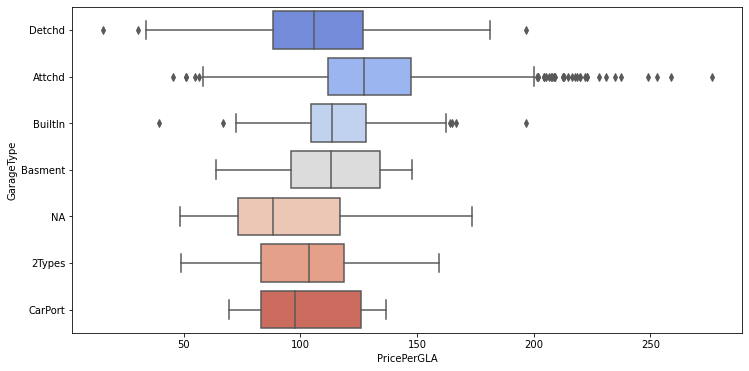

In [348]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageType', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

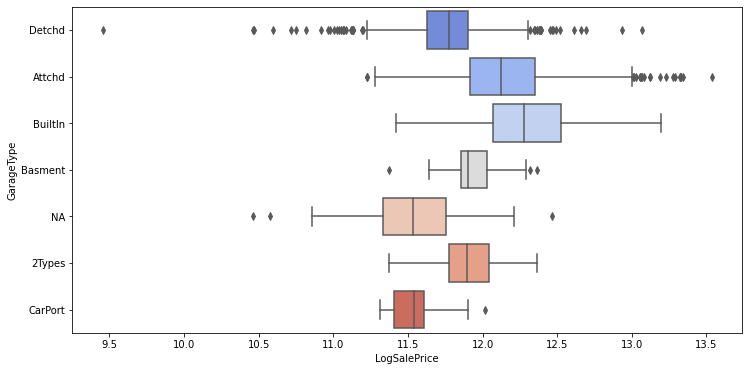

In [349]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageType', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [350]:
housing.groupby('GarageType').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
GarageType             
Attchd       127.416520
BuiltIn      113.463569
Basment      113.309353
Detchd       105.892784
2Types       103.575832
CarPort       97.502973
NA            88.114754

In [351]:
housing.groupby('GarageType').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
GarageType              
BuiltIn        12.278393
Attchd         12.122691
Basment        11.904968
2Types         11.894781
Detchd         11.775290
CarPort        11.542484
NA             11.532728

# 59. GarageYrBlt

In [352]:
sum(housing['GarageYrBlt'].isnull())

129

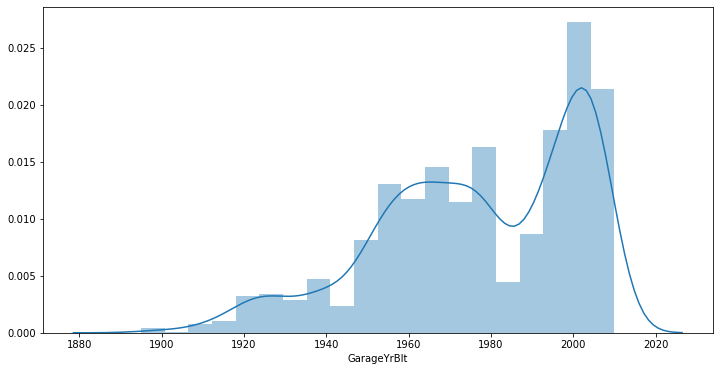

In [353]:
plt.figure(figsize = (12, 6))
sns.distplot(housing['GarageYrBlt']);

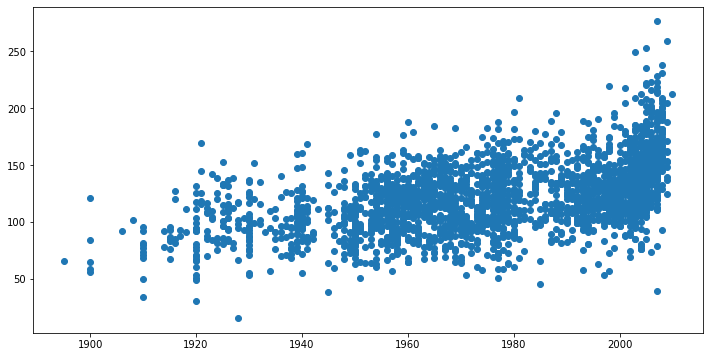

In [354]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['GarageYrBlt'], housing['PricePerGLA']);

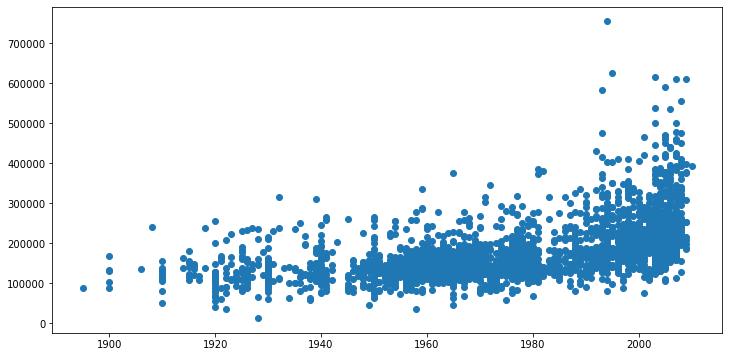

In [355]:
plt.figure(figsize = (12, 6))
plt.scatter(housing['GarageYrBlt'], housing['SalePrice']);

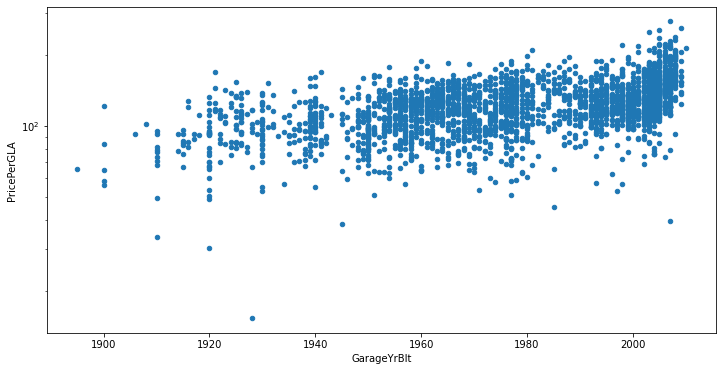

In [356]:
housing.plot(kind = 'scatter', x = 'GarageYrBlt', y = 'PricePerGLA',
                                               logy = True, figsize = (12, 6));

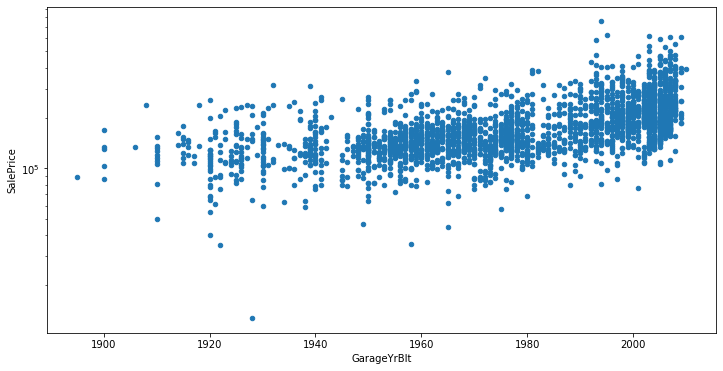

In [357]:
housing.plot(kind = 'scatter', x = 'GarageYrBlt', y = 'SalePrice',
                                               logy = True, figsize = (12, 6));

# 60. GarageFinish

In [358]:
sum(housing['GarageFinish'].isnull())

129

In [359]:
housing['GarageFinish'].fillna('NA', inplace = True)

In [360]:
housing['GarageFinish'].value_counts()

Unf    1112
RFn     718
Fin     621
NA      129
Name: GarageFinish, dtype: int64

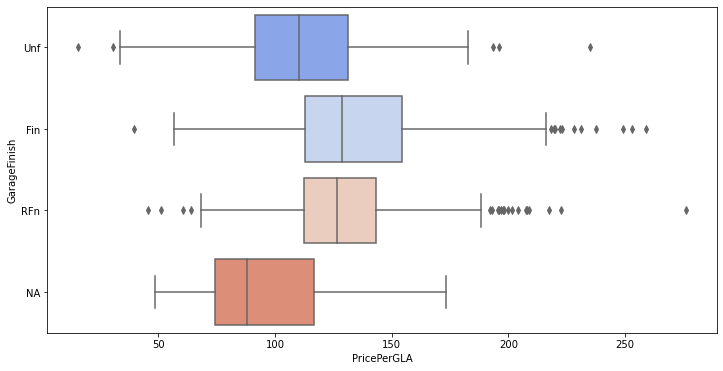

In [361]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageFinish', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

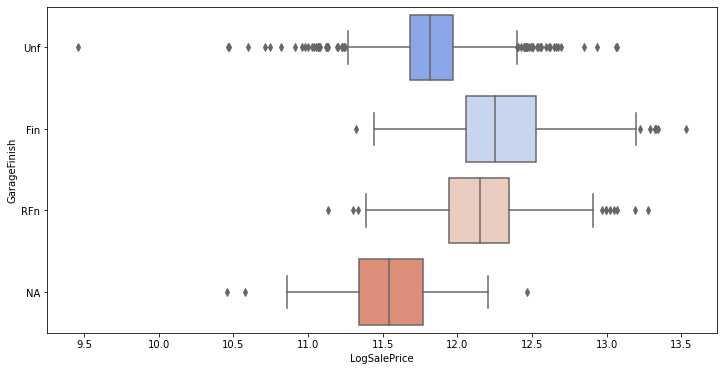

In [362]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageFinish', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [363]:
housing.groupby('GarageFinish').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
GarageFinish             
Fin            128.717077
RFn            126.445904
Unf            110.036819
NA              87.962963

In [364]:
housing.groupby('GarageFinish').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
GarageFinish              
Fin              12.249611
RFn              12.149502
Unf              11.819343
NA               11.542484

# 61. GarageCars

In [365]:
sum(housing['GarageCars'].isnull())

1

In [366]:
housing['GarageCars'].fillna(0, inplace = True)

In [367]:
housing['GarageCars'].value_counts()

2.0    1439
1.0     713
3.0     285
0.0     128
4.0      14
5.0       1
Name: GarageCars, dtype: int64

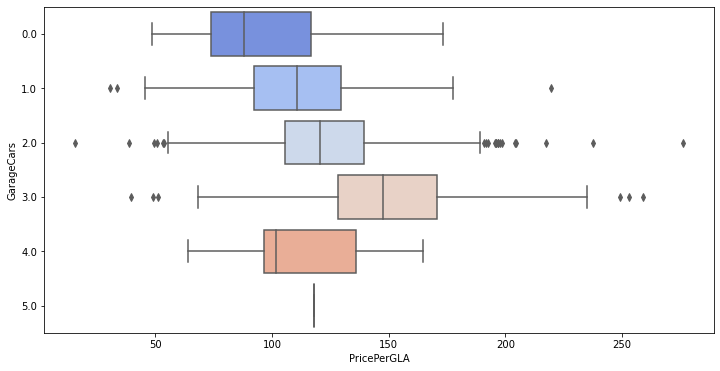

In [368]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageCars', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

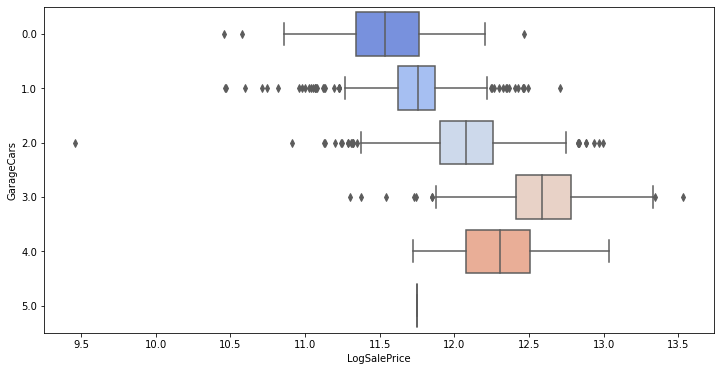

In [369]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageCars', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [370]:
housing.groupby('GarageCars').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
GarageCars             
3.0          147.637795
2.0          120.713306
5.0          118.003731
1.0          110.652353
4.0          101.871289
0.0           88.038859

In [371]:
housing.groupby('GarageCars').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
GarageCars              
3.0            12.588610
4.0            12.306941
2.0            12.081076
1.0            11.759786
5.0            11.747998
0.0            11.537606

# 62. GarageArea

In [372]:
sum(housing['GarageArea'].isnull())

1

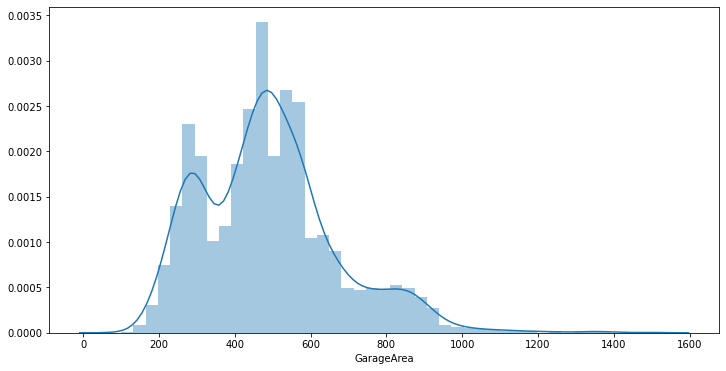

In [373]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['GarageArea'] > 0]['GarageArea']);

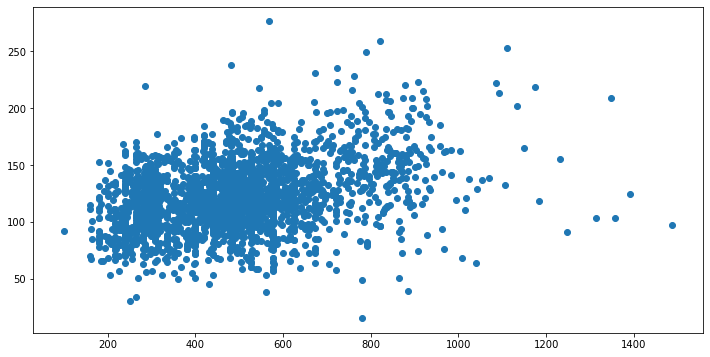

In [374]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['GarageArea'] > 0]['GarageArea'], housing[housing['GarageArea'] > 0]['PricePerGLA']);

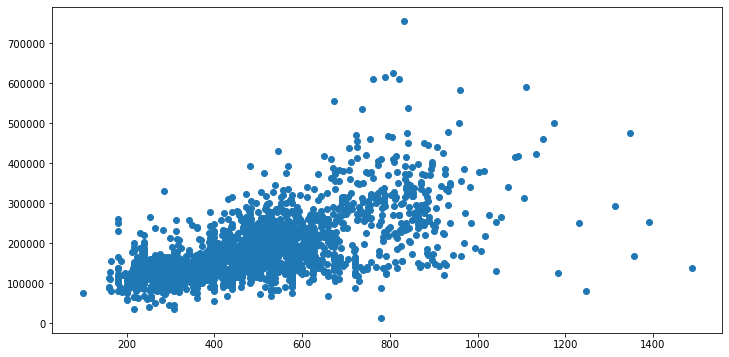

In [375]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['GarageArea'] > 0]['GarageArea'], housing[housing['GarageArea'] > 0]['SalePrice']);

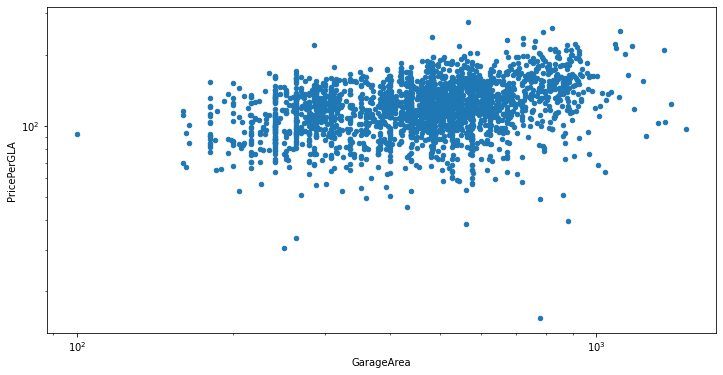

In [376]:
housing[housing['GarageArea'] > 0].plot(kind = 'scatter', x = 'GarageArea', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

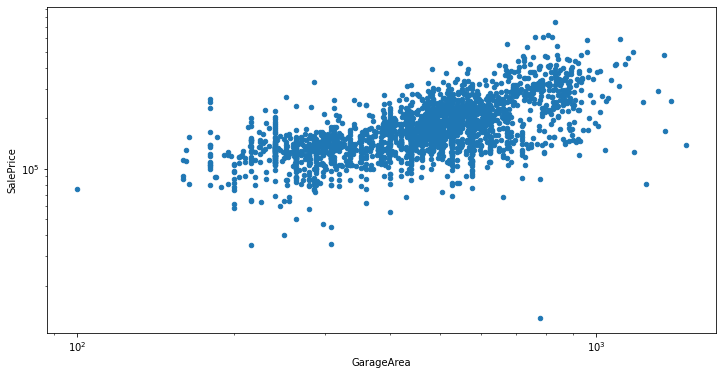

In [377]:
housing[housing['GarageArea'] > 0].plot(kind = 'scatter', x = 'GarageArea', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 63. GarageQual

In [378]:
sum(housing['GarageQual'].isnull())

129

In [379]:
housing['GarageQual'].fillna('NA', inplace = True)

In [380]:
housing['GarageQual'].value_counts()

TA    2312
NA     129
Fa     110
Gd      22
Po       4
Ex       3
Name: GarageQual, dtype: int64

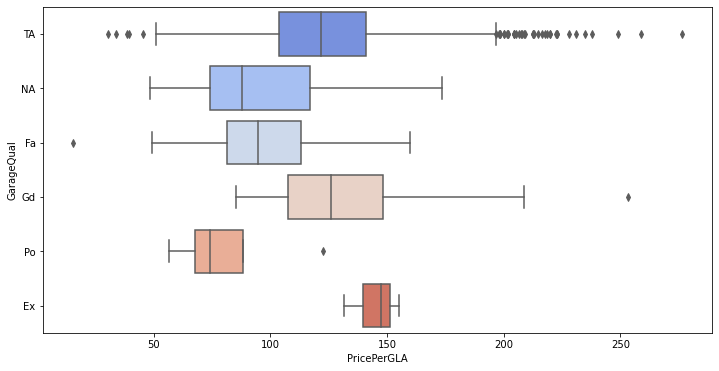

In [381]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageQual', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

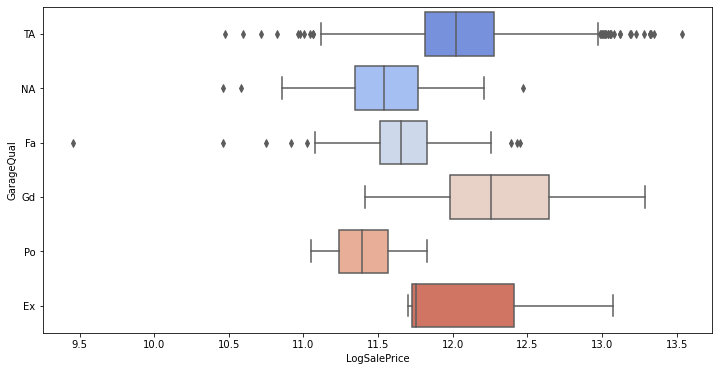

In [382]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageQual', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [383]:
housing.groupby('GarageQual').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
GarageQual             
Ex           147.569444
Gd           125.970283
TA           121.663150
Fa            94.694528
NA            87.962963
Po            74.089579

In [384]:
housing.groupby('GarageQual').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
GarageQual              
Gd             12.256165
TA             12.019743
Ex             11.755872
Fa             11.652687
NA             11.542484
Po             11.389134

# 64. GarageCond

In [385]:
sum(housing['GarageCond'].isnull())

129

In [386]:
housing['GarageCond'].fillna('NA', inplace = True)

In [387]:
housing['GarageCond'].value_counts()

TA    2356
NA     129
Fa      67
Gd      14
Po      11
Ex       3
Name: GarageCond, dtype: int64

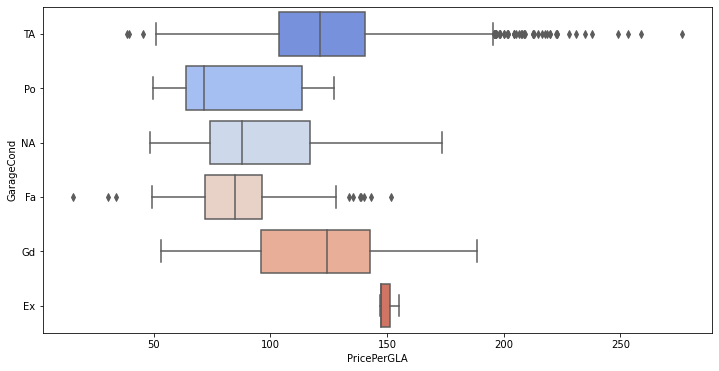

In [388]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageCond', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

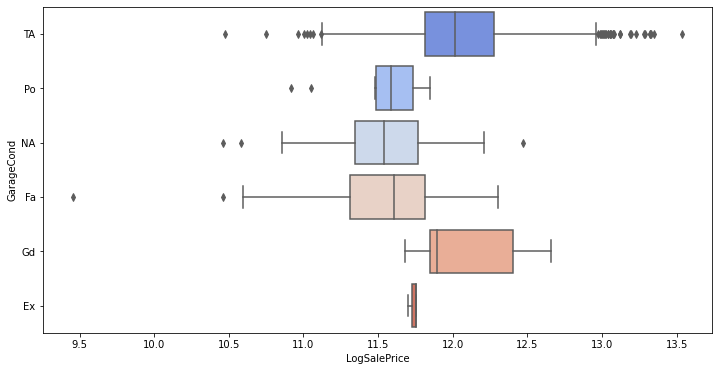

In [389]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'GarageCond', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [390]:
housing.groupby('GarageCond').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
GarageCond             
Ex           147.569444
Gd           124.168904
TA           121.271185
NA            87.962963
Fa            84.918478
Po            71.523179

In [391]:
housing.groupby('GarageCond').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
GarageCond              
TA             12.017028
Gd             11.894728
Ex             11.751942
Fa             11.608236
Po             11.589887
NA             11.542484

# 65. PavedDrive

In [392]:
sum(housing['PavedDrive'].isnull())

0

In [393]:
housing['PavedDrive'].value_counts()

Y    2336
N     184
P      60
Name: PavedDrive, dtype: int64

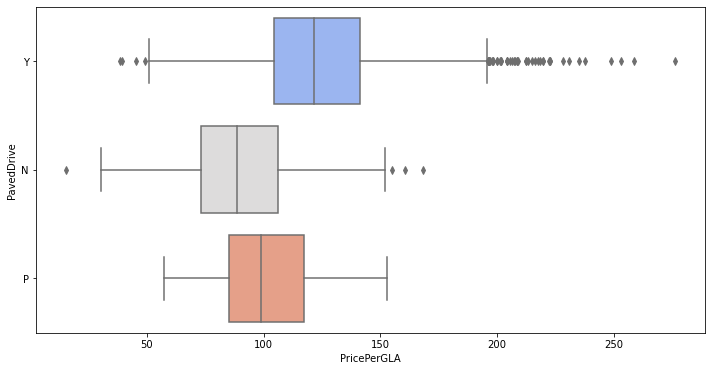

In [394]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'PavedDrive', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

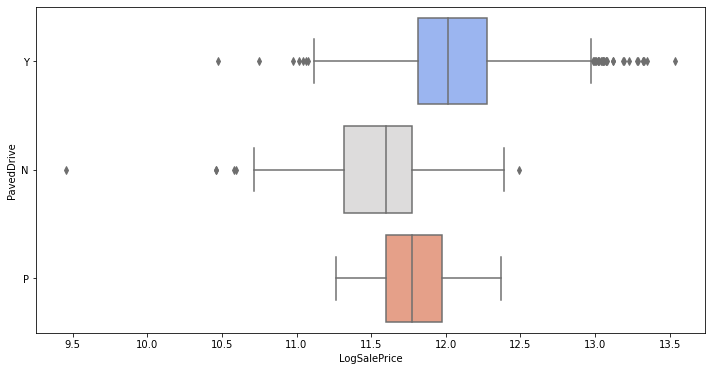

In [395]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'PavedDrive', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [396]:
housing.groupby('PavedDrive').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
PavedDrive             
Y            121.799548
P             99.000250
N             88.794802

In [397]:
housing.groupby('PavedDrive').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
PavedDrive              
Y              12.016726
P              11.773363
N              11.601391

# 66. WoodDeckSF

In [398]:
sum(housing['WoodDeckSF'].isnull())

0

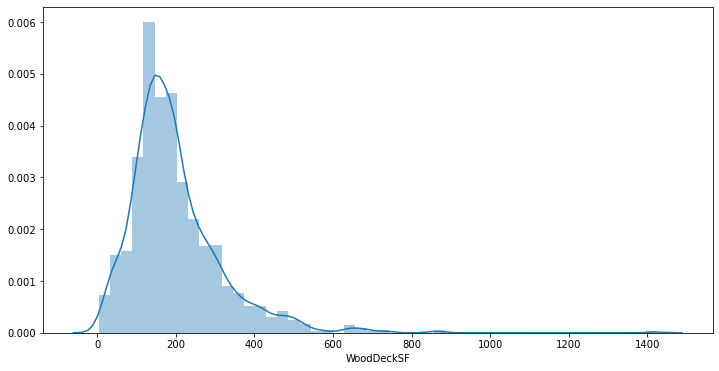

In [399]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['WoodDeckSF'] > 0]['WoodDeckSF']);

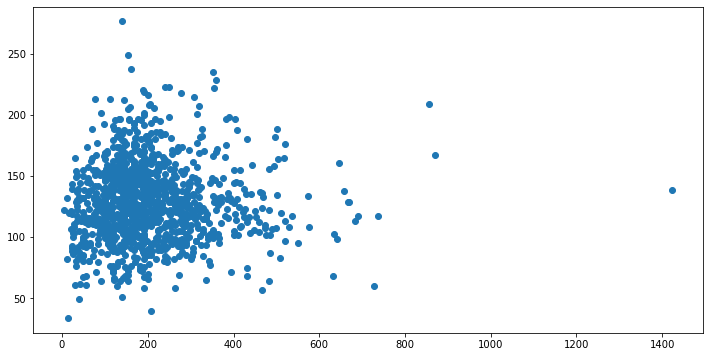

In [400]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['WoodDeckSF'] > 0]['WoodDeckSF'], housing[housing['WoodDeckSF'] > 0]['PricePerGLA']);

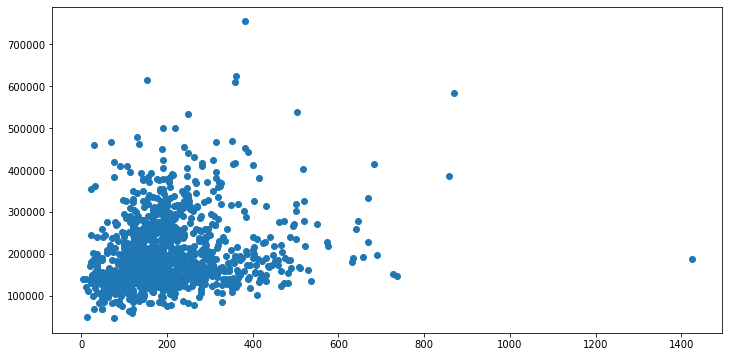

In [401]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['WoodDeckSF'] > 0]['WoodDeckSF'], housing[housing['WoodDeckSF'] > 0]['SalePrice']);

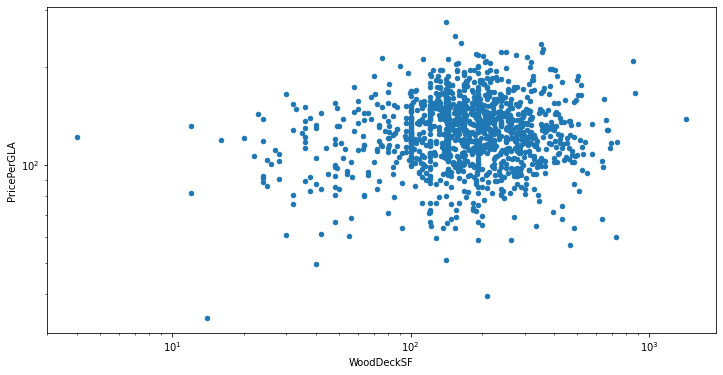

In [402]:
housing[housing['WoodDeckSF'] > 0].plot(kind = 'scatter', x = 'WoodDeckSF', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

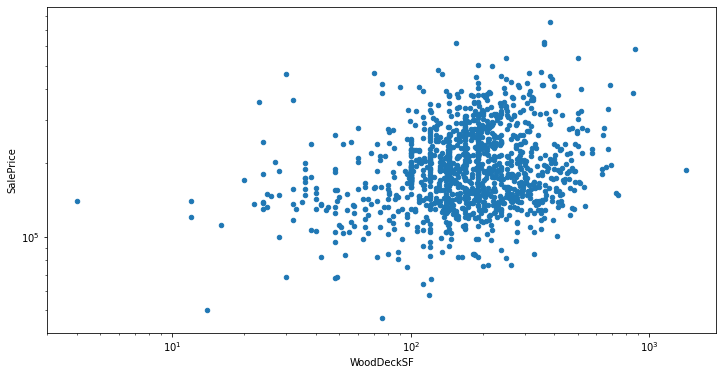

In [403]:
housing[housing['WoodDeckSF'] > 0].plot(kind = 'scatter', x = 'WoodDeckSF', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 67. OpenPorchSF 

In [404]:
sum(housing['OpenPorchSF'].isnull())

0

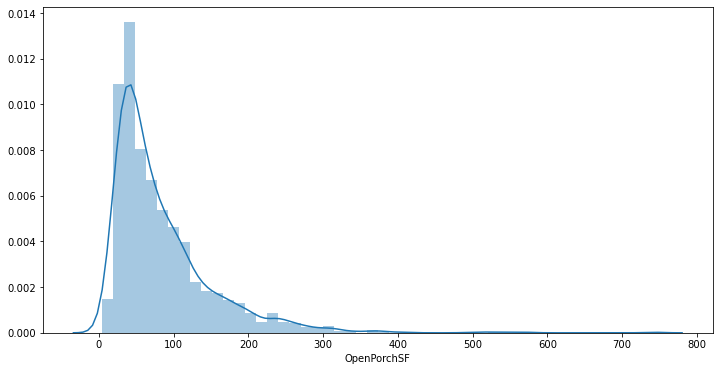

In [405]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['OpenPorchSF'] > 0]['OpenPorchSF']);

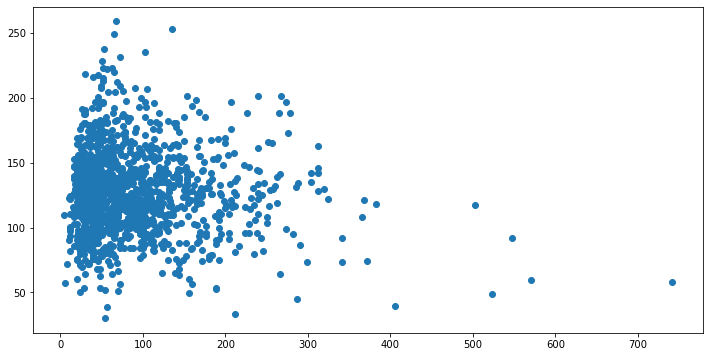

In [406]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['OpenPorchSF'] > 0]['OpenPorchSF'], housing[housing['OpenPorchSF'] > 0]['PricePerGLA']);

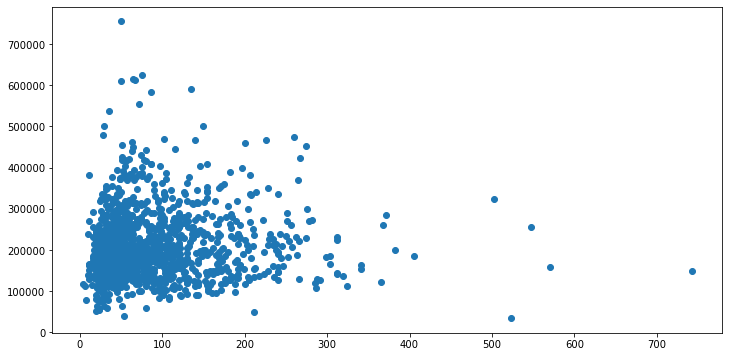

In [407]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['OpenPorchSF'] > 0]['OpenPorchSF'], housing[housing['OpenPorchSF'] > 0]['SalePrice']);

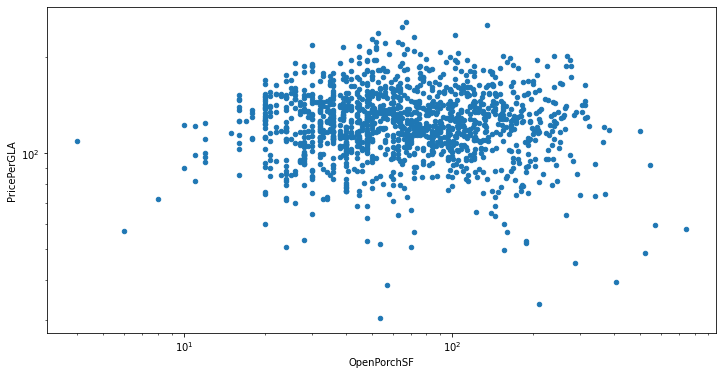

In [408]:
housing[housing['OpenPorchSF'] > 0].plot(kind = 'scatter', x = 'OpenPorchSF', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

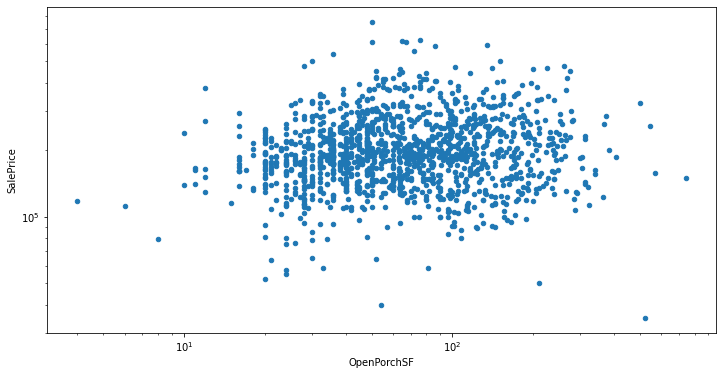

In [409]:
housing[housing['OpenPorchSF'] > 0].plot(kind = 'scatter', x = 'OpenPorchSF', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 68. EnclosedPorch

In [410]:
sum(housing['EnclosedPorch'].isnull())

0

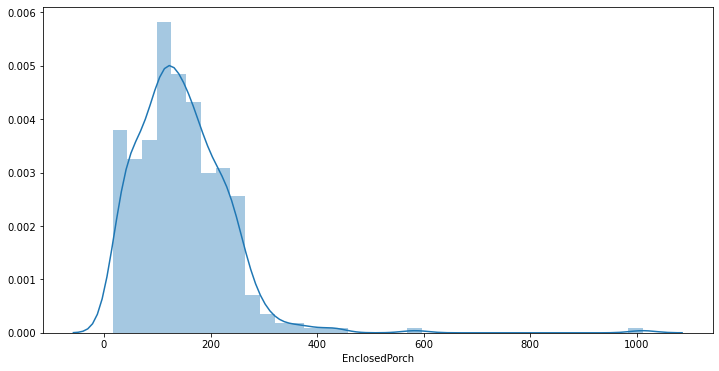

In [411]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['EnclosedPorch'] > 0]['EnclosedPorch']);

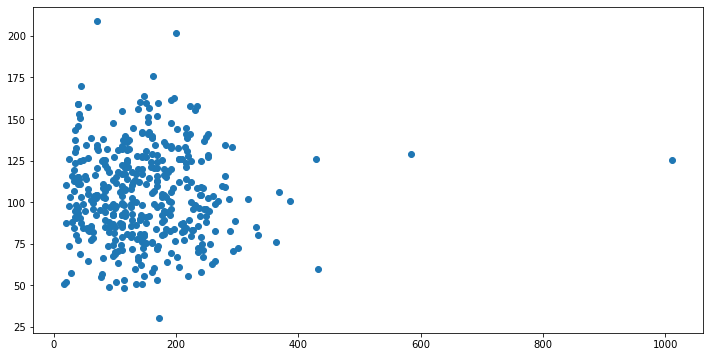

In [412]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['EnclosedPorch'] > 0]['EnclosedPorch'], housing[housing['EnclosedPorch'] > 0]['PricePerGLA']);

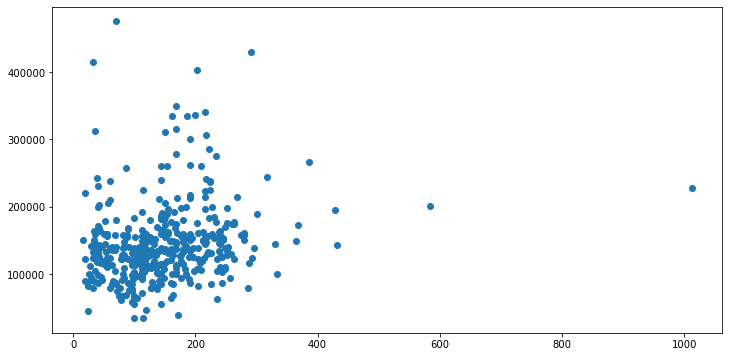

In [413]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['EnclosedPorch'] > 0]['EnclosedPorch'], housing[housing['EnclosedPorch'] > 0]['SalePrice']);

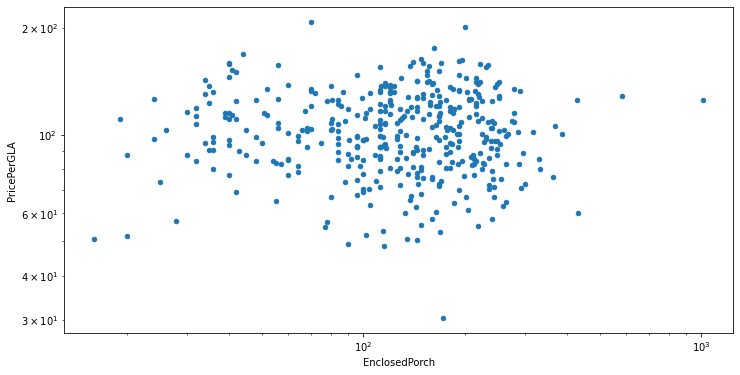

In [414]:
housing[housing['EnclosedPorch'] > 0].plot(kind = 'scatter', x = 'EnclosedPorch', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

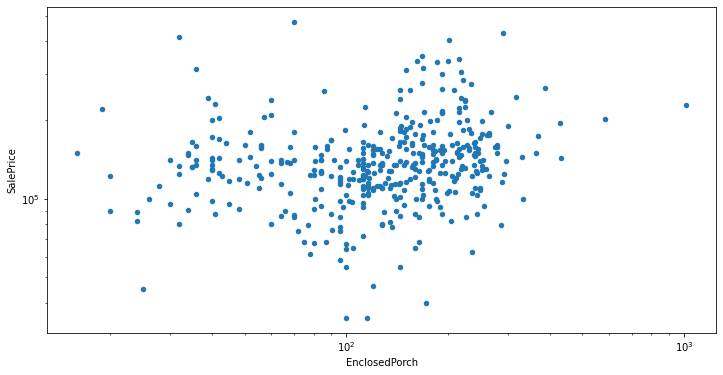

In [415]:
housing[housing['EnclosedPorch'] > 0].plot(kind = 'scatter', x = 'EnclosedPorch', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 69. 3SsnPorch

In [416]:
sum(housing['3SsnPorch'].isnull())

0

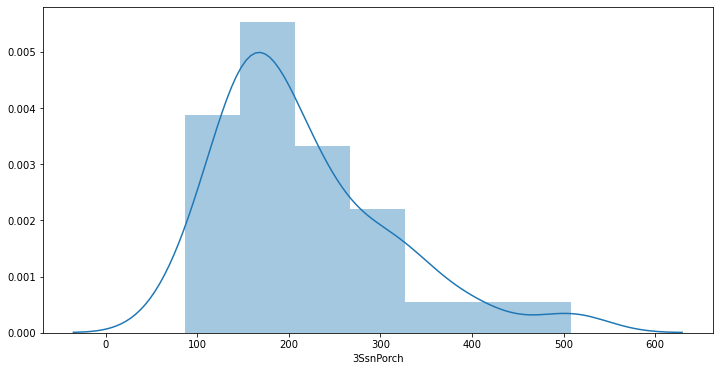

In [417]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['3SsnPorch'] > 0]['3SsnPorch']);

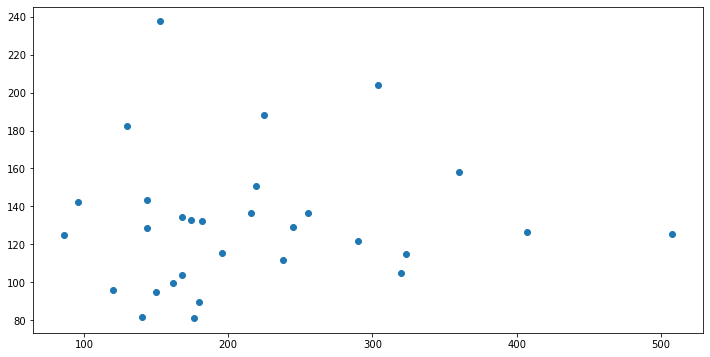

In [418]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['3SsnPorch'] > 0]['3SsnPorch'], housing[housing['3SsnPorch'] > 0]['PricePerGLA']);

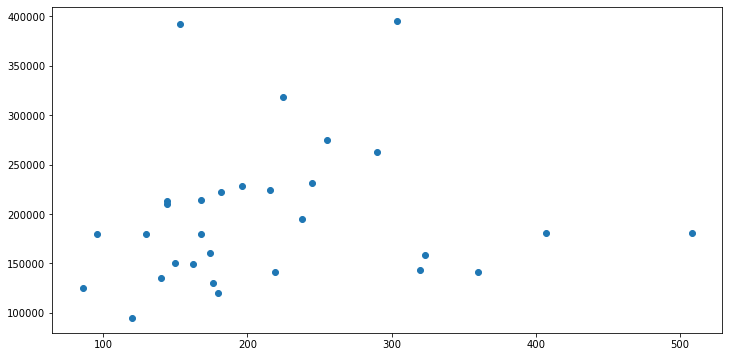

In [419]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['3SsnPorch'] > 0]['3SsnPorch'], housing[housing['3SsnPorch'] > 0]['SalePrice']);

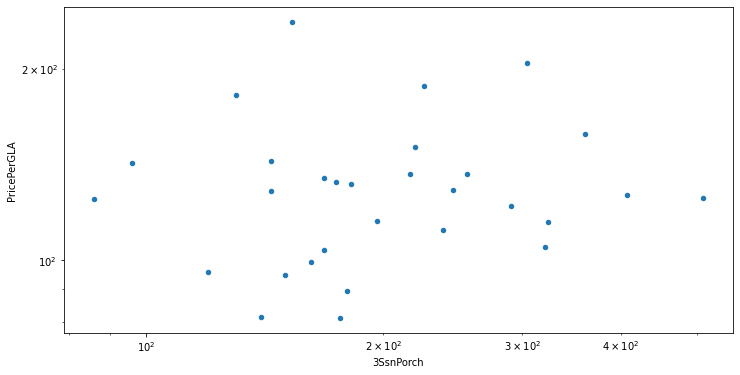

In [420]:
housing[housing['3SsnPorch'] > 0].plot(kind = 'scatter', x = '3SsnPorch', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

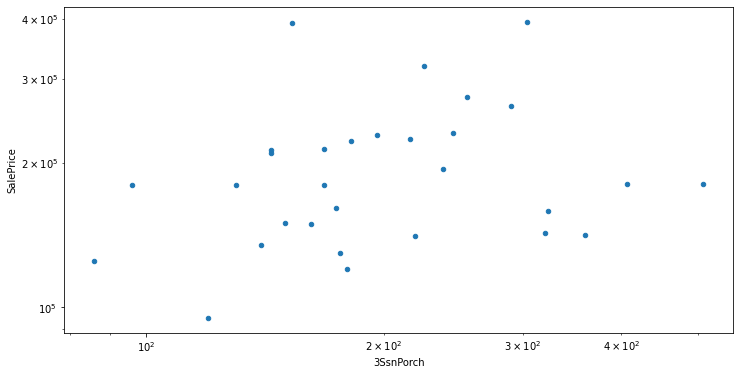

In [421]:
housing[housing['3SsnPorch'] > 0].plot(kind = 'scatter', x = '3SsnPorch', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 70. ScreenPorch

In [422]:
sum(housing['ScreenPorch'].isnull())

0

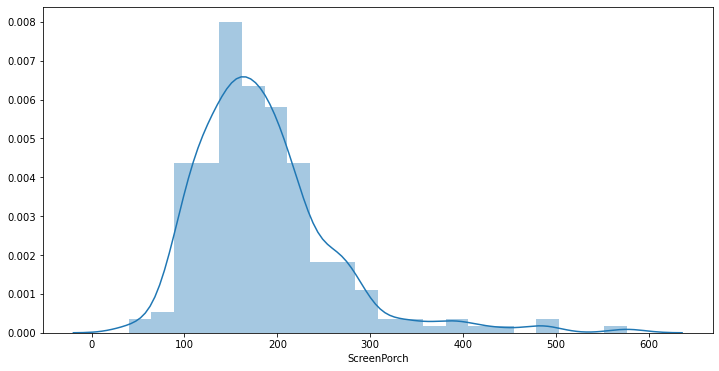

In [423]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['ScreenPorch'] > 0]['ScreenPorch']);

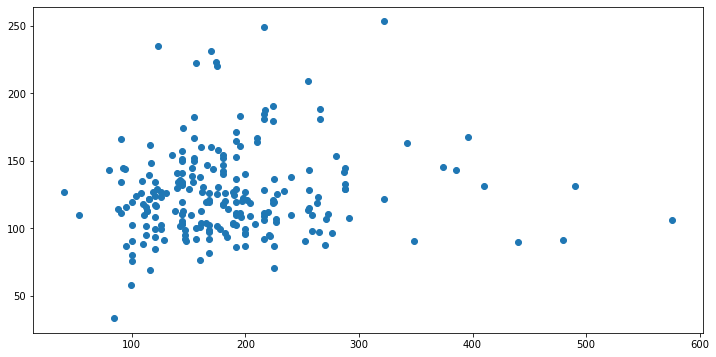

In [424]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['ScreenPorch'] > 0]['ScreenPorch'], housing[housing['ScreenPorch'] > 0]['PricePerGLA']);

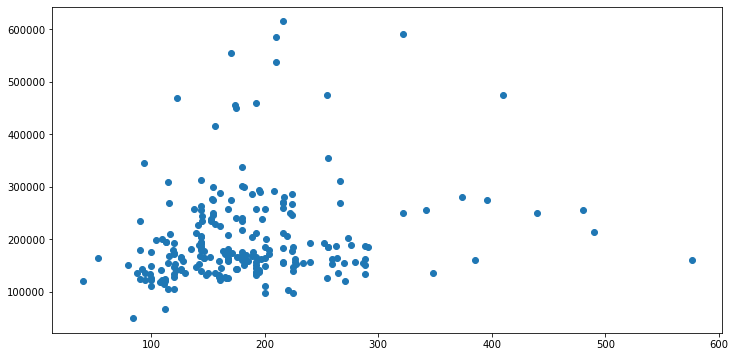

In [425]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['ScreenPorch'] > 0]['ScreenPorch'], housing[housing['ScreenPorch'] > 0]['SalePrice']);

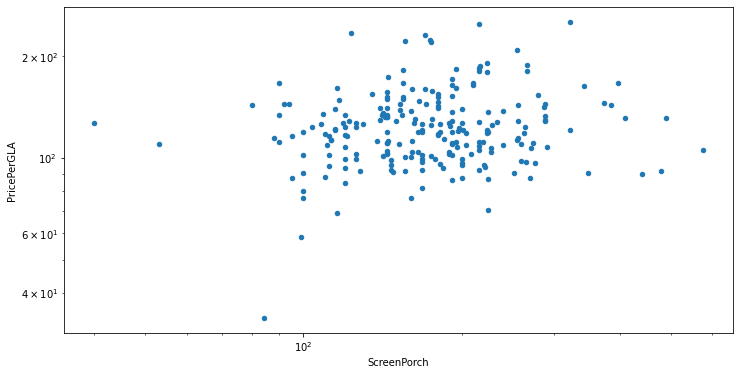

In [426]:
housing[housing['ScreenPorch'] > 0].plot(kind = 'scatter', x = 'ScreenPorch', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

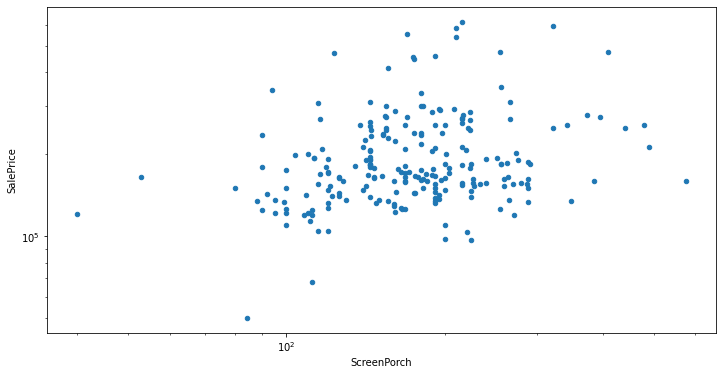

In [427]:
housing[housing['ScreenPorch'] > 0].plot(kind = 'scatter', x = 'ScreenPorch', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 71. PoolArea

In [428]:
sum(housing['PoolArea'].isnull())

0

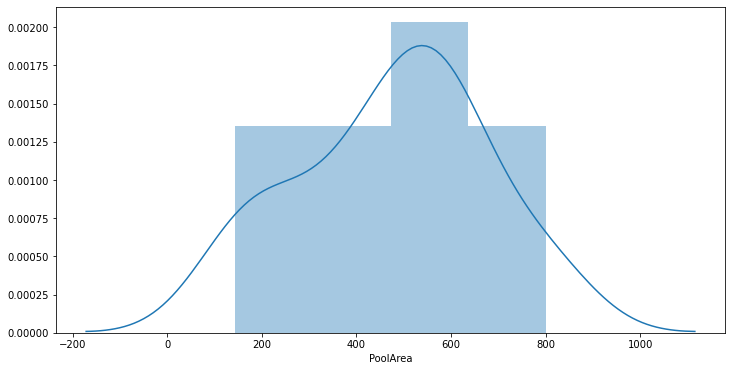

In [429]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['PoolArea'] > 0]['PoolArea']);

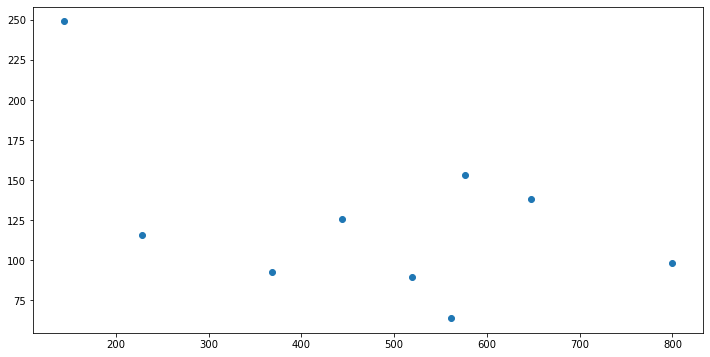

In [430]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['PoolArea'] > 0]['PoolArea'], housing[housing['PoolArea'] > 0]['PricePerGLA']);

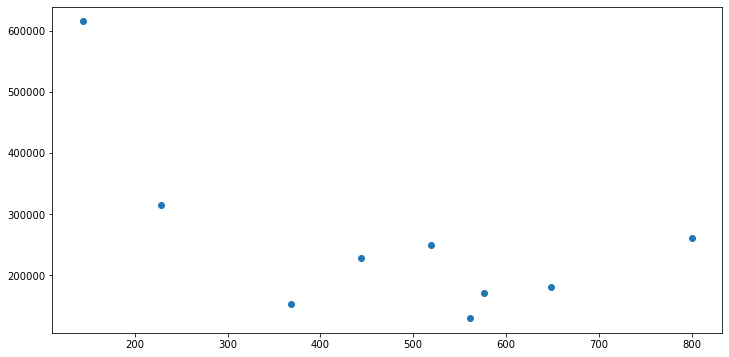

In [431]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['PoolArea'] > 0]['PoolArea'], housing[housing['PoolArea'] > 0]['SalePrice']);

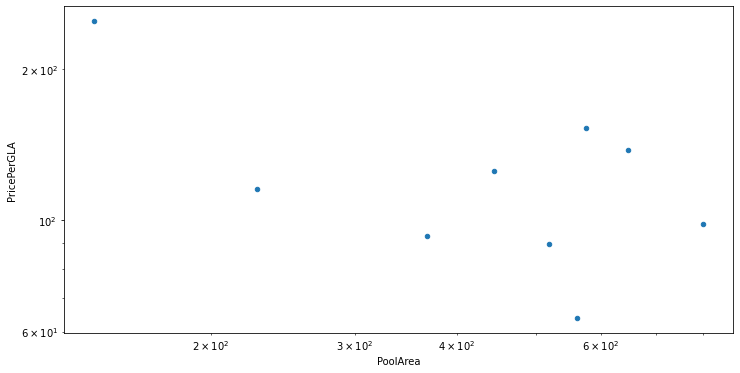

In [432]:
housing[housing['PoolArea'] > 0].plot(kind = 'scatter', x = 'PoolArea', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

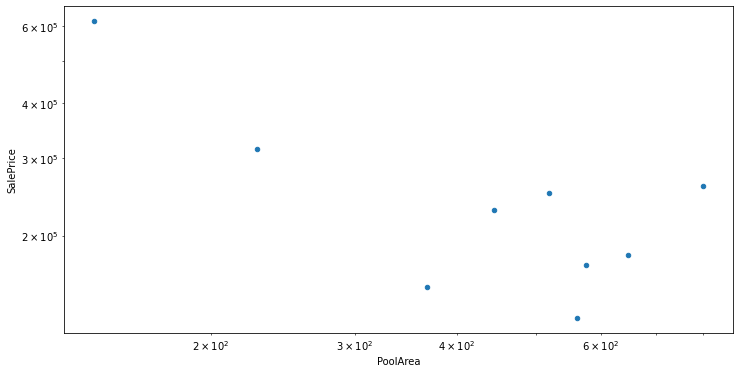

In [433]:
housing[housing['PoolArea'] > 0].plot(kind = 'scatter', x = 'PoolArea', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 72. PoolQC

In [434]:
sum(housing['PoolQC'].isnull())

2571

In [435]:
housing['PoolQC'].fillna('NA', inplace = True)

In [436]:
housing['PoolQC'].value_counts()

NA    2571
TA       3
Gd       2
Fa       2
Ex       2
Name: PoolQC, dtype: int64

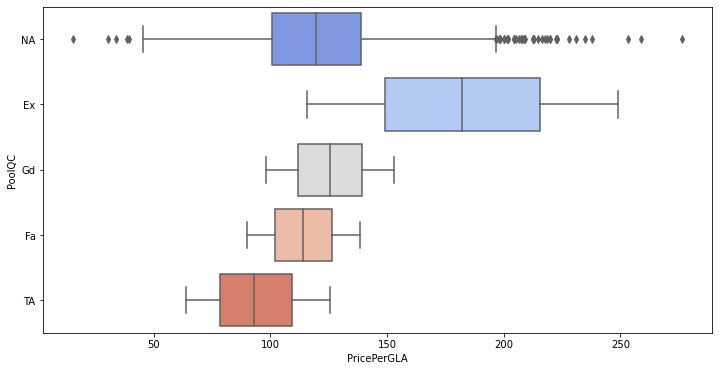

In [437]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'PoolQC', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

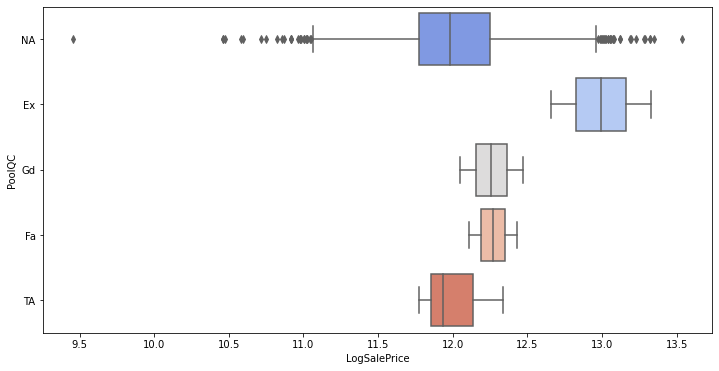

In [438]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'PoolQC', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [439]:
housing.groupby('PoolQC').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
PoolQC             
Ex       182.270890
Gd       125.606613
NA       119.658120
Fa       114.036171
TA        92.896175

In [440]:
housing.groupby('PoolQC').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
PoolQC              
Ex         12.994853
Fa         12.267734
Gd         12.258928
NA         11.982273
TA         11.938193

# 73. Fence

In [441]:
sum(housing['Fence'].isnull())

2055

In [442]:
housing['Fence'].fillna('NA', inplace= True)

In [443]:
housing['Fence'].value_counts()

NA       2055
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

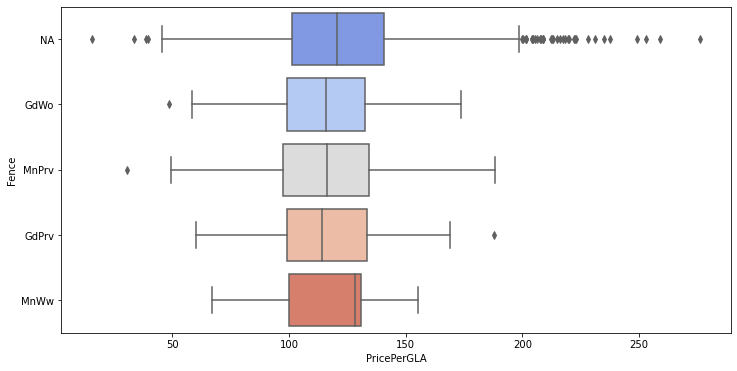

In [444]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Fence', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

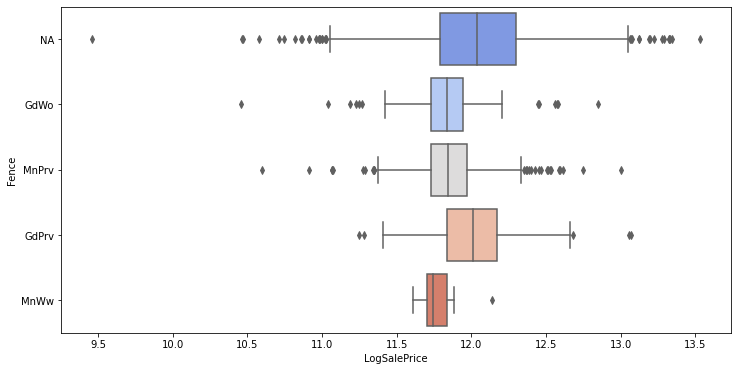

In [445]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'Fence', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [446]:
housing.groupby('Fence').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
Fence             
MnWw    128.089047
NA      120.523303
MnPrv   116.049383
GdWo    115.955473
GdPrv   113.888889

In [447]:
housing.groupby('Fence').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
Fence              
NA        12.037654
GdPrv     12.013095
MnPrv     11.842229
GdWo      11.838626
MnWw      11.745570

# 74. MiscFeature

In [448]:
sum(housing['MiscFeature'].isnull())

2483

In [449]:
housing['MiscFeature'].fillna('NA', inplace= True)

In [450]:
housing['MiscFeature'].value_counts()

NA      2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

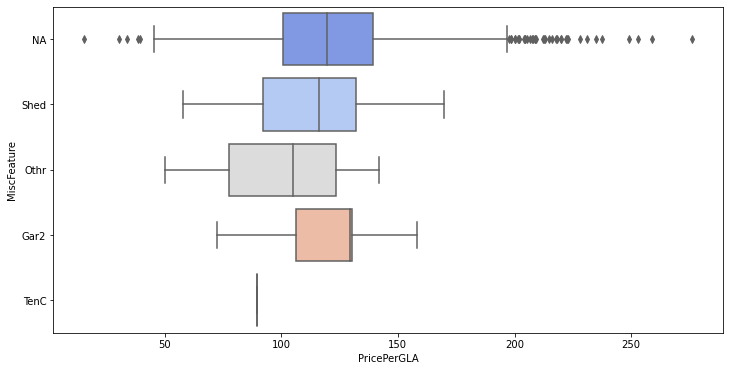

In [451]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MiscFeature', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

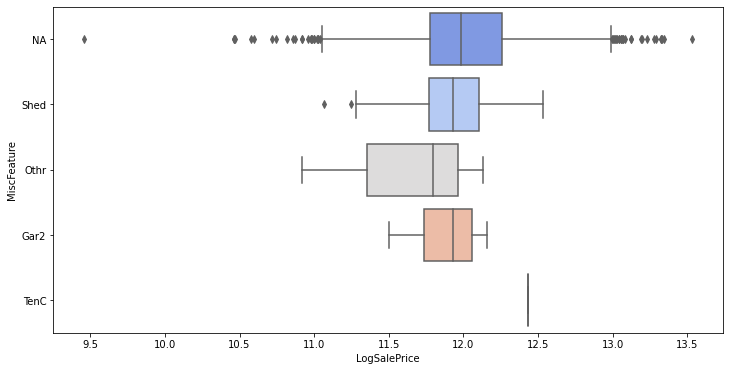

In [452]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MiscFeature', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [453]:
housing.groupby('MiscFeature').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
MiscFeature             
Gar2          129.420617
NA            119.771863
Shed          116.027583
Othr          104.889590
TenC           89.798851

In [454]:
housing.groupby('MiscFeature').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
MiscFeature              
TenC            12.429216
NA              11.982929
Shed            11.933278
Gar2            11.928341
Othr            11.798104

# 75. MiscVal

In [455]:
sum(housing['MiscVal'].isnull())

0

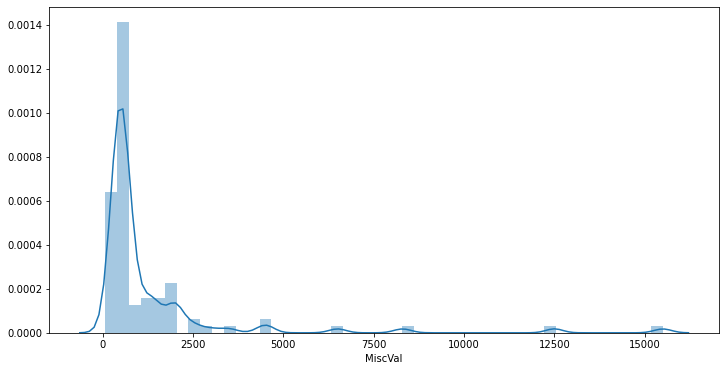

In [456]:
plt.figure(figsize = (12, 6))
sns.distplot(housing[housing['MiscVal'] > 0]['MiscVal']);

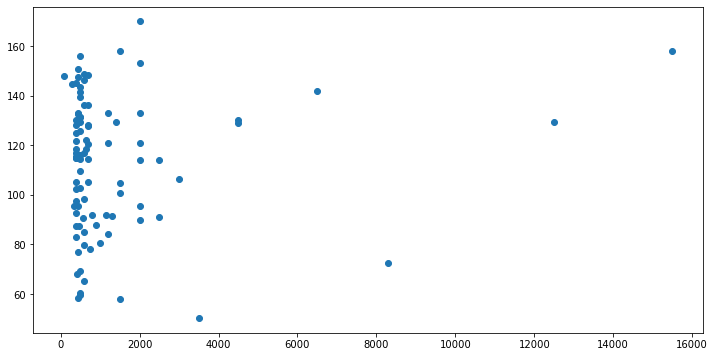

In [457]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['MiscVal'] > 0]['MiscVal'], housing[housing['MiscVal'] > 0]['PricePerGLA']);

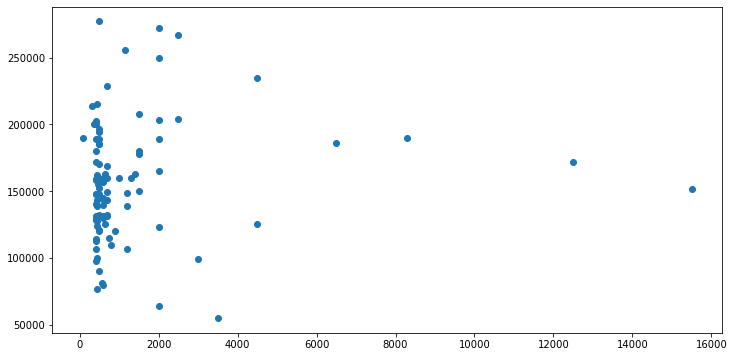

In [458]:
plt.figure(figsize = (12, 6))
plt.scatter(housing[housing['MiscVal'] > 0]['MiscVal'], housing[housing['MiscVal'] > 0]['SalePrice']);

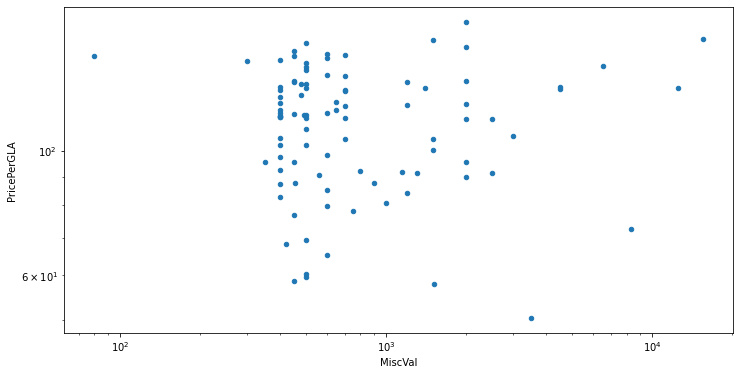

In [459]:
housing[housing['MiscVal'] > 0].plot(kind = 'scatter', x = 'MiscVal', y = 'PricePerGLA',
                                               logx = True, logy = True, figsize = (12, 6));

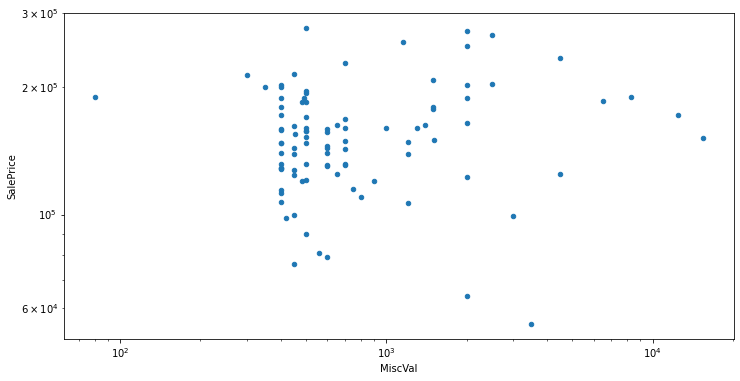

In [460]:
housing[housing['MiscVal'] > 0].plot(kind = 'scatter', x = 'MiscVal', y = 'SalePrice',
                                               logx = True, logy = True, figsize = (12, 6));

# 76. MoSold

In [461]:
sum(housing['MoSold'].isnull())

0

In [462]:
housing['MoSold'].value_counts()

6     459
7     400
5     363
4     252
3     209
8     193
10    148
9     131
2     121
11    117
1     101
12     86
Name: MoSold, dtype: int64

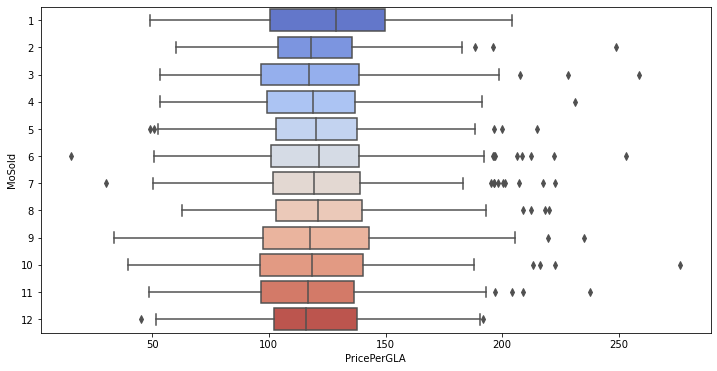

In [463]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MoSold', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

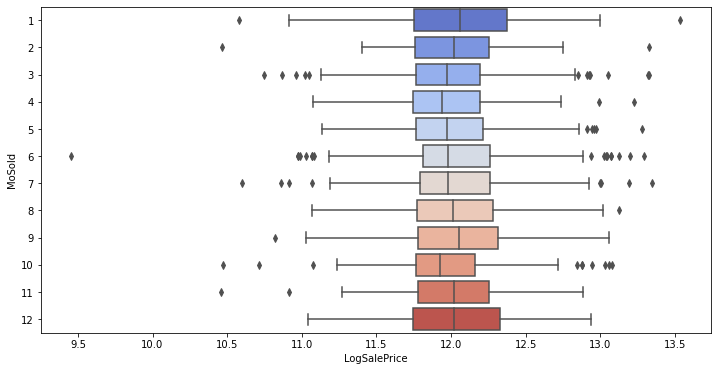

In [464]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'MoSold', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [465]:
housing.groupby('MoSold').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
MoSold             
1        128.621089
6        121.536218
8        121.023513
5        120.157819
7        119.476688
4        118.928373
10       118.455675
2        118.269231
9        117.588274
3        117.267165
11       116.910230
12       116.042253

In [466]:
housing.groupby('MoSold').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
MoSold              
1          12.058153
9          12.055250
2          12.019743
11         12.019743
12         12.019725
8          12.013701
6          11.982617
7          11.978022
3          11.970350
5          11.970350
4          11.941408
10         11.925013

# 77. YrSold

In [467]:
sum(housing['YrSold'].isnull())

0

In [468]:
housing['YrSold'].value_counts()

2007    600
2009    585
2008    564
2006    516
2010    315
Name: YrSold, dtype: int64

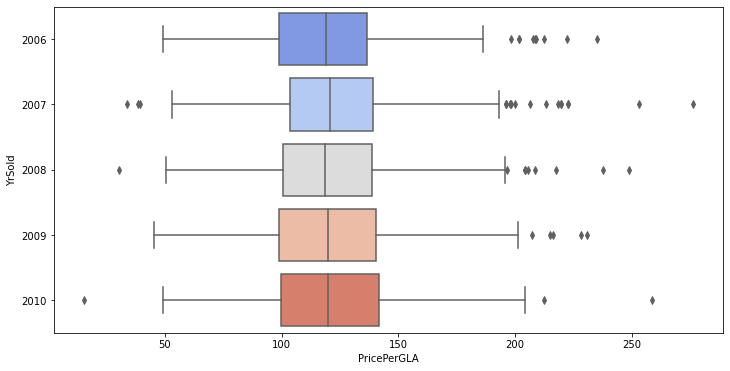

In [469]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'YrSold', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

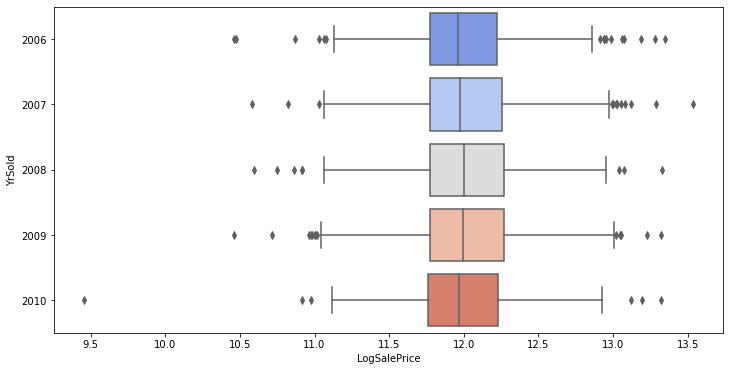

In [470]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'YrSold', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [471]:
housing.groupby('YrSold').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
YrSold             
2007     120.748889
2010     119.962512
2009     119.688809
2006     118.984955
2008     118.584372

In [472]:
housing.groupby('YrSold').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
YrSold              
2008       11.999663
2009       11.995352
2007       11.976655
2010       11.969717
2006       11.964001

# 78. SaleType

In [473]:
sum(housing['SaleType'].isnull())

0

In [474]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

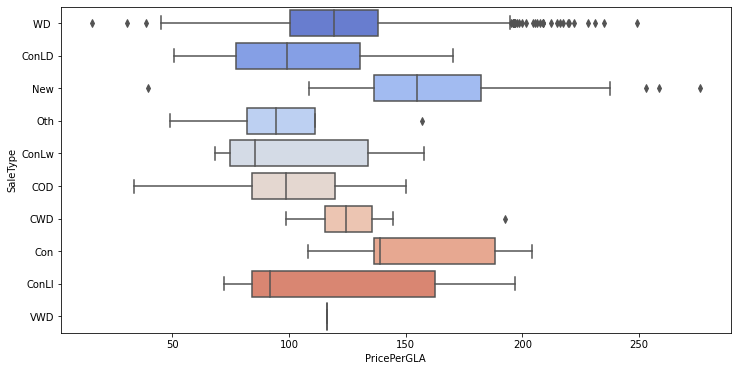

In [475]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'SaleType', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

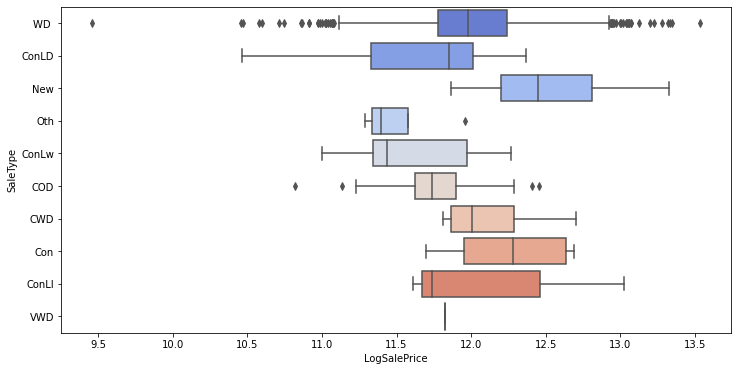

In [476]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'SaleType', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [477]:
housing.groupby('SaleType').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
SaleType             
New        155.029155
Con        139.107951
CWD        124.522569
WD         119.230769
VWD        116.496599
ConLD       98.962835
COD         98.914106
Oth         94.455554
ConLI       91.973244
ConLw       85.357826

In [478]:
housing.groupby('SaleType').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
SaleType              
New          12.449019
Con          12.279323
CWD          12.004568
WD           11.976659
ConLD        11.849398
VWD          11.827736
COD          11.738049
ConLI        11.736069
ConLw        11.434599
Oth          11.397473

# 79. SaleCondition

In [479]:
sum(housing['SaleCondition'].isnull())

0

In [480]:
housing['SaleCondition'].value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

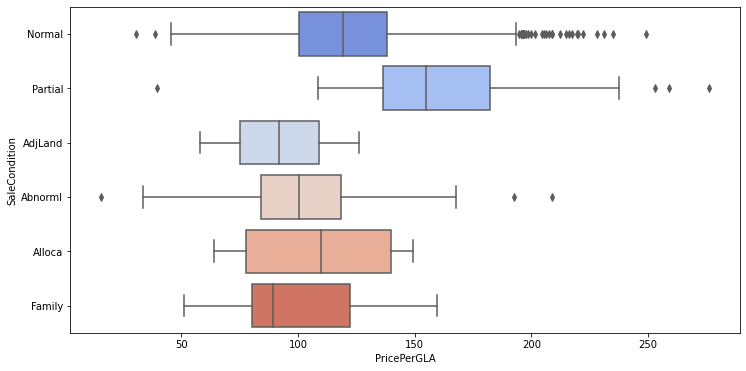

In [481]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'SaleCondition', x = 'PricePerGLA', data = housing, palette = 'coolwarm', orient = 'h');

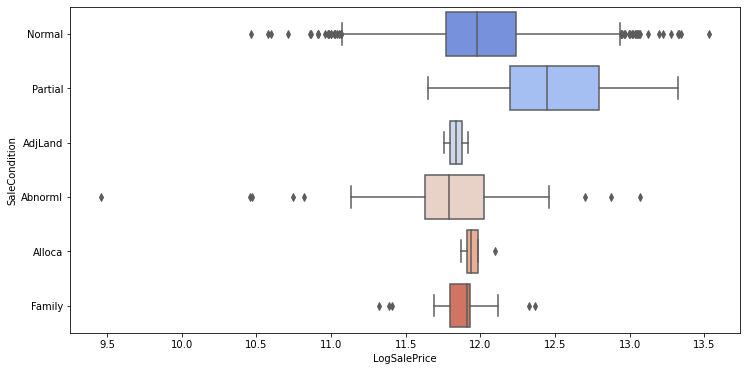

In [482]:
plt.figure(figsize = (12, 6))
sns.boxplot(y = 'SaleCondition', x = 'LogSalePrice', data = housing, palette = 'coolwarm', orient = 'h');

In [483]:
housing.groupby('SaleCondition').median()[['PricePerGLA']].sort_values(by = 'PricePerGLA', ascending = False)

PricePerGLA
SaleCondition             
Partial         154.839750
Normal          119.295076
Alloca          109.629916
Abnorml         100.312256
AdjLand          91.929256
Family           89.381720

In [484]:
housing.groupby('SaleCondition').median()[['LogSalePrice']].sort_values(by = 'LogSalePrice', ascending = False)

LogSalePrice
SaleCondition              
Partial           12.445661
Normal            11.976659
Alloca            11.935232
Family            11.911702
AdjLand           11.837131
Abnorml           11.790557